**<center><h1>Basic data analysing for FENICS 1 and FENICS 2</h1></center>**
<center><p>Script to analyse FENICS1 and FENICS2 data.</p></center>

**Dependencies / Modules**

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import FenicsATL as FATL

from multiprocessing import Process




In [3]:
mpl.rcParams["figure.facecolor"] = 'white'

=============================================================
=

**<center><h1>FENICS 1</h1></center>**

=============================================================
=

# **I. Data**

I.1 DataFrame : `Initialization of dataframes / filtring`

In [4]:
FENICS_to_analyse = [15,14,13,12,10,9,8,7,6,5,4,1] #11 removed
filter_id = [15,14,13,12,10,9,8,7,6,5,4]
filter_id_slow = [15,14,13,12,10,9,8,6,5,4] #7 removed bad integrator

FENICS = FATL.FenicsVers_filter(FATL.FenicsData_read('/AtlasDisk/home2/sisaid/data/FENICS_data.json'),
                                FENICS_to_analyse ,index=True)

temp_allindex = []
for id in FENICS_to_analyse :
    temp_index = FENICS[FENICS.Board.id == id][FENICS.Board.channel == FENICS[FENICS.Board.id == id].Board.channel.value_counts().index[0]].index.tolist()
    temp_allindex = temp_allindex + temp_index

FENICS = FENICS.loc[temp_allindex]
FENICS = FENICS[FENICS.Board.specialTests ==  'None']

Fast = FATL.FenicsTestTable(FENICS,'fast')
Slow = FATL.FenicsTestTable(FENICS,'slow')

Slow.dropna(inplace=True,axis=1)

I.2 DataFrame : `visualization`

In [9]:
FENICS[FENICS.Board.id ==15].tail(10)

Board                                                         \
      name version  id  code burnings burnTime        date   time   
44  FENICS       1  15  NDrb       25     4391  2022-10-13  10:10   
45  FENICS       1  15  NDrb       26     4575  2022-10-21  08:45   
46  FENICS       1  15  NDrb       27     4720  2022-10-27  14:40   
47  FENICS       1  15  NDrb       28     5046  2022-11-10  09:55   
48  FENICS       1  15  NDrb       29     5307  2022-11-21  09:35   
49  FENICS       1  15  NDrb       30     5569  2022-12-02  10:00   
50  FENICS       1  15  NDrb       31     5736  2022-12-09  10:30   
51  FENICS       1  15  NDrb       32     6044  2023-03-15  09:15   
52  FENICS       1  15  NDrb       33     6211  2023-03-22  09:40   
53  FENICS       1  15  NDrb       34     6379  2023-04-03  10:06   

                         ...  \
   specialTests channel  ...   
44         None       0  ...   
45         None       0  ...   
46         None       0  ...   
47         None       0  ...   
48         None       0  ...   
49         None       0  ...   
50         None       0  ...   
51         None       0  ...   
52         None       0  ...   
53         None       0  ...   

                                           FastResult  \
                                              NoiseLG   
44  {'Mu': 97.58945905541823, 'Sigma': 1.071721740...   
45  {'Mu': 97.63118573249497, 'Sigma': 1.071033213...   
46  {'Mu': 97.31261279914578, 'Sigma': 1.072936732...   
47  {'Mu': 97.9101860659114, 'Sigma': 1.0579273820...   
48  {'Mu': 97.85719215431746, 'Sigma': 1.057962722...   
49  {'Mu': 97.6778810152425, 'Sigma': 1.0692348121...   
50  {'Mu': 97.80051640751049, 'Sigma': 1.062659317...   
51  {'Mu': 100.05096607920966, 'Sigma': 1.07203986...   
52  {'Mu': 100.79087365269545, 'Sigma': 1.06148875...   
53  {'Mu': 100.36624971885126, 'Sigma': 1.06808945...   

                                                       \
                                           NoiseLGIG1   
44  {'Mu': 97.57998521873205, 'Sigma': 1.063573353...   
45  {'Mu': 97.61446373689608, 'Sigma': 1.064148682...   
46  {'Mu': 97.35351106072572, 'Sigma': 1.063673972...   
47  {'Mu': 97.87418571862572, 'Sigma': 1.067917545...   
48  {'Mu': 97.81745547231795, 'Sigma': 1.062190178...   
49  {'Mu': 97.75974280948729, 'Sigma': 1.069876386...   
50  {'Mu': 97.80440179376934, 'Sigma': 1.060271183...   
51  {'Mu': 100.05747962520857, 'Sigma': 1.07320812...   
52  {'Mu': 100.73921383962373, 'Sigma': 1.06198656...   
53  {'Mu': 100.37019624359596, 'Sigma': 1.07032067...   

                                                       \
                                           NoiseLGIG2   
44  {'Mu': 97.60499841501075, 'Sigma': 1.076648957...   
45  {'Mu': 97.61211699207348, 'Sigma': 1.067220198...   
46  {'Mu': 97.30468494135326, 'Sigma': 1.074259822...   
47  {'Mu': 97.86976628443792, 'Sigma': 1.065720940...   
48  {'Mu': 97.81981532864114, 'Sigma': 1.066492461...   
49  {'Mu': 97.7496665369826, 'Sigma': 1.0711452179...   
50  {'Mu': 97.86173241815496, 'Sigma': 1.070765438...   
51  {'Mu': 100.07659283539559, 'Sigma': 1.07380815...   
52  {'Mu': 100.78285252922502, 'Sigma': 1.06451506...   
53  {'Mu': 100.39513813359446, 'Sigma': 1.06750077...   

                                                       \
                                           NoiseLGIG6   
44  {'Mu': 97.58305434358405, 'Sigma': 1.064317956...   
45  {'Mu': 97.69270075356795, 'Sigma': 1.071854106...   
46  {'Mu': 97.279644042333, 'Sigma': 1.07587160372...   
47  {'Mu': 97.86630964679765, 'Sigma': 1.061606112...   
48  {'Mu': 97.84538940670308, 'Sigma': 1.072986783...   
49  {'Mu': 97.72092283801926, 'Sigma': 1.067402158...   
50  {'Mu': 97.86575782833367, 'Sigma': 1.072400882...   
51  {'Mu': 100.08591251218125, 'Sigma': 1.07327045...   
52  {'Mu': 100.72217759913902, 'Sigma': 1.06316661...   
53  {'Mu': 100.34467310014129, 'Sigma': 1.06868327...   

                                           SlowResu

In [10]:
FENICS.Board.burnings

0       1
17      7
18      8
19      9
20     10
       ..
564    33
565    34
566    35
567    36
568     1
Name: burnings, Length: 420, dtype: int64

In [ ]:
Fast.tail(10)

In [7]:
Slow

Gain0                                                             \
    Linearity                                                              
     SlopeLin    ConstLin DACforPed LowGoodLin LowGoodNoise     MaxNoise   
0    4.800434 -188.921000      12.0  26.761246    43.172694   819.880946   
17   4.799972 -189.975821      13.0  23.446779    39.844585   736.868326   
18   4.800120 -191.423272      13.0  39.865730    39.865730   685.763490   
19   4.799882 -188.355462      12.0  43.139637    43.139637   704.553693   
20   4.800368 -191.556696      13.0  39.860807    39.860807   702.199485   
..        ...         ...       ...        ...          ...          ...   
564  4.781205  -36.853707       3.0  25.610338    32.572298   459.235771   
565  4.782013  -37.080697       3.0  25.703072    29.339638   489.530216   
566  4.781717  -37.204650       3.0  25.656145    29.330028   478.720218   
567  4.781852  -37.238949       3.0  22.338014    32.635205   476.802702   
568  4.803592 -106.774218       8.0  40.017442    56.365429  1218.655221   

                                       ...      Gain5                         \
    NoisePhys             NoisePosPed  ...  Linearity                          
        Sigma Mean StdDev          Mu  ... LowGoodLin LowGoodNoise  MaxNoise   
0         0.0  0.0    0.0    3.903257  ...   0.441412     0.441412  2.431803   
17        0.0  0.0    0.0    2.696169  ...   0.441739     0.441739  2.970931   
18        0.0  0.0    0.0   16.838410  ...   0.442134     0.442134  2.610817   
19        0.0  0.0    0.0    4.117947  ...   0.442530     0.442530  2.708514   
20        0.0  0.0    0.0   17.027757  ...   0.441964     0.441964  3.197253   
..        ...  ...    ...         ...  ...        ...          ...       ...   
564       0.0  0.0    0.0    7.046100  ...   0.389373     0.348900  2.503753   
565       0.0  0.0    0.0    7.038645  ...   0.390493     0.270998  3.082316   
566       0.0  0.0    0.0    7.105572  ...   0.434307     0.308512  2.855060   
567       0.0  0.0    0.0    6.918270  ...   0.310712     0.233299  2.864136   
568       0.0  0.0    0.0   30.682764  ...   0.390449     0.272087  2.785581   

                                                                             
    NoisePhys                     NoisePosPed                                
        Sigma      Mean    StdDev          Mu     Sigma      Mean    StdDev  
0    1.791542    0.0197  0.214737   51.072118  4.066178   51.0436  4.089315  
17   2.042621    0.2109  0.799763   47.495417  3.706012   47.4816  3.695654  
18   1.585295    0.0138  0.176662   33.712027  3.500117   33.6802  3.546199  
19   1.621859    0.0228  0.232551   49.769585  3.763439   49.7469  3.774976  
20   1.352392    0.0070  0.116409   34.672974  3.527234   34.6741  3.590110  
..        ...       ...       ...         ...       ...       ...       ...  
564  3.794233  133.5599  3.838413  101.417418  3.717936  101.4166  3.783021  
565  3.148723    4.0340  2.940552   99.366901  3.467537   99.3565  3.528825  
566  3.789029    4.6110  3.334618   98.839510  3.396815   98.8254  3.431168  
567  4.498537    3.4920  3.134316   98.491700  3.438913   98.4647  3.478671  
568  3.277009  113.4554  3.382397   29.110689  3.392455   29.1034  3.463742  

[420 rows x 78 columns]

# **II. Statistics**

I.1 Macro statistics  : `Calculations`

In [5]:
descriptions = {}
for id in filter_id :
    id_filter = FENICS[FENICS.Board.id == id].index
    descriptions [id] = Fast.loc[id_filter].describe()

In [8]:
descriptions

{15:       LinearHGcor                                                            \
          SlopeAmp   SlopeInteg LowGoodLin LowGoodNoisePed LowGoodNoiseInteg   
 count   38.000000    38.000000  38.000000       38.000000         38.000000   
 mean   156.317580  7510.968658   0.239234        0.328950          0.076029   
 std      2.509176    61.302018   0.100746        0.008235          0.000917   
 min    143.989662  7418.351803   0.102396        0.304127          0.074446   
 25%    155.826082  7474.616120   0.159576        0.328815          0.075049   
 50%    155.958633  7479.122289   0.228336        0.330701          0.076542   
 75%    158.103961  7572.285094   0.297707        0.330758          0.076583   
 max    161.859443  7741.587624   0.561503        0.356629          0.076667   
 
                                            LinearHGunc               ...  \
       MaxNoisePed MaxNoiseAmp ShapeQuality    SlopeAmp   SlopeInteg  ...   
 count   38.000000   38.000000    38.000

# **III. Basic plots**

III.1 Data jitter : `Plots`

In [24]:
for progress,columns in enumerate(Fast.columns) :
    FATL.FenSpread(FENICS,Fast,columns,filter_id,
                   path ='/users/divers/atlas/sisaid/home2/fen1_output/dataSpreader/fast',burns = True)
    FATL.loadingBar(progress,len(Fast.columns),suffix=str(columns))
    
for progress,columns in enumerate(Slow.columns) :
    FATL.FenSpread(FENICS,Slow,columns,filter_id,
                   path ='/users/divers/atlas/sisaid/home2/fen1_output/dataSpreader/slow',burns = True)
    FATL.loadingBar(progress,len(Slow.columns),suffix=str(columns))

|                                                  | progress: 100%                                                                                   DONE 
|                                                  | progress: 100%                                                                                   DONE 


III.2 BurnTime evolution plots  : `Plots`

|                                                  | progress: 100%                                                                                   DONE 
|                                                  | progress: 6% ('Gain0', 'Linearity', 'MaxNoise')                                              

ValueError: Inputs must not be empty.

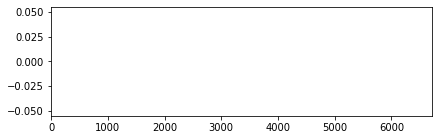

In [12]:
for progress,columns in enumerate(Fast.columns):
    FATL.FenBurnEvol(FENICS,Fast,columns,filter_id,separate = True,LR=True,sigma=2 , unique=True
                           ,path ='/users/divers/atlas/sisaid/home2/fen1_output/burnTimeEvolution/fast')
    FATL.loadingBar(progress,len(Fast.columns),suffix=str(columns))

for progress,columns in enumerate(Slow.columns):
    FATL.FenBurnEvol(FENICS,Slow,columns,filter_id_slow,separate = True,LR=True,sigma=2 , unique=True
                           ,path ='/users/divers/atlas/sisaid/home2/fen1_output/burnTimeEvolution/slow')
    FATL.loadingBar(progress,len(Slow.columns),suffix=str(columns))


III.3 Histograms : `Plots`

In [ ]:
for columns in Fast.columns:
    FATL.FenicsHistogramer(FENICS,Fast,columns,filter_id,separate = False
                           ,path ='/users/divers/atlas/sisaid/home2/filtred_output/histograms_nsep/fast')


for columns in Slow.columns:
    FATL.FenicsHistogramer(FENICS,Slow,columns,filter_id_slow,separate = False
                           ,path ='/users/divers/atlas/sisaid/home2/filtred_output/histograms_nsep/slow')


# **IV. Correlations**

IV.1 Correlations of all features : `Calculations`


In [7]:
corrThreshold = 0.9
corrMatch = {}
for id in filter_id :
    corrMatch[id] = (Fast.loc[FENICS[FENICS.Board.id==id].index].corr()>corrThreshold).sum().sum()

IV.2 Correlations of all features : `Plots : w/out burns`

In [ ]:

doMultiprocessing = False

corrThreshold = 0.9
def FenicsFastCorr():
    FastCorrFilter = Fast.corr()>corrThreshold
    for ii in range(len(FastCorrFilter.columns)):
        for jj in range(ii+1, len(FastCorrFilter.columns)):
            if FastCorrFilter.iloc[ii, jj] and FastCorrFilter.columns[ii] != FastCorrFilter.columns[jj]:
                FATL.FenicsCorrelations(FENICS,Fast,FastCorrFilter.columns[ii],FastCorrFilter.columns[jj]
                                        ,filter_id,LR=False,separate = False, burns=True , burns_filter = None,
                                        path ='/users/divers/atlas/sisaid/home2/filtred_output/correlation_nsep_wburn/fast')

def FenicsSlowCorr():
    SlowCorrFilter = Slow.corr()>corrThreshold
    for ii in range(len(SlowCorrFilter.columns)):
        for jj in range(ii+1, len(SlowCorrFilter.columns)):
            if SlowCorrFilter.iloc[ii, jj] and SlowCorrFilter.columns[ii] != SlowCorrFilter.columns[jj]:
                FATL.FenicsCorrelations(FENICS,Slow,SlowCorrFilter.columns[ii],SlowCorrFilter.columns[jj],
                                        filter_id_slow,LR=False,separate = False, burns=True, burns_filter = None,
                                        path ='/users/divers/atlas/sisaid/home2/filtred_output/correlation_nsep_wburn/slow')

if doMultiprocessing :
    if __name__ == '__main__':
      p1 = Process(target=FenicsFastCorr)
      p1.start()
      p2 = Process(target=FenicsSlowCorr)
      p2.start()
      p1.join()
      p2.join()
else :
    FenicsFastCorr()
    FenicsSlowCorr()
    doMultiprocessing = False

IV.3.a Correlations per FENICS card of all features : `Plots : w/out burns`

In [ ]:

doMultiprocessing = False

def FastCorrPerFenics():
    for id in filter_id :
        print(f'Plotting FENICS {id} fast correlations : started', end='\r')
        FastCorrFilter = Fast.loc[FENICS[FENICS.Board.id==id].index].corr()>corrThreshold
        for ii in range(len(FastCorrFilter.columns)):
            for jj in range(ii+1, len(FastCorrFilter.columns)):
                if FastCorrFilter.iloc[ii, jj] and FastCorrFilter.columns[ii] != FastCorrFilter.columns[jj]:
                    FATL.FenicsCorrelations(FENICS,Fast,FastCorrFilter.columns[ii],FastCorrFilter.columns[jj],
                                            [id],burns = True,path =f'/users/divers/atlas/sisaid/home2/filtred_output/correlation_per_id/{str(id)}/fast')
                    
        print(f'Plotting FENICS {id} fast correlations : ended', end='\r')
        
def SlowCorrPerFenics():
    for id in filter_id_slow :
        print(f'Plotting FENICS {id} slow correlations : started', end='\r')
        SlowCorrFilter = Slow.loc[FENICS[FENICS.Board.id==id].index].corr()>corrThreshold
        for ii in range(len(SlowCorrFilter.columns)):
            for jj in range(ii+1, len(SlowCorrFilter.columns)):
                if SlowCorrFilter.iloc[ii, jj] and SlowCorrFilter.columns[ii] != SlowCorrFilter.columns[jj]:
                    FATL.FenicsCorrelations(FENICS,Slow,SlowCorrFilter.columns[ii],SlowCorrFilter.columns[jj],
                                            [id],burns = True,path =f'/users/divers/atlas/sisaid/home2/filtred_output/correlation_per_id/{str(id)}/slow')
                    
        print(f'Plotting FENICS {id} slow correlations : ended', end='\r')


if doMultiprocessing :
    if __name__ == '__main__':
      p1 = Process(target=FastCorrPerFenics)
      p1.start()
      p2 = Process(target=SlowCorrPerFenics)
      p2.start()
      p1.join()
      p2.join()
      doMultiprocessing = False
else :
    FastCorrPerFenics()
    SlowCorrPerFenics()
   

IV.3.b Correlations per FENICS card of all features : `Plots w/burns`

In [ ]:
doMultiprocessing = False

def FastCorrPerFenicsWBurn():
    for i,id in enumerate(filter_id) :
        FATL.loadingBar(i,len(filter_id),prefix='FENICS : ' + str(id))
        FastCorrFilter = Fast.iloc[FENICS[FENICS.Board.id==id].index].corr()>corrThreshold  
        for ii in range(len(FastCorrFilter.columns)):
            for jj in range(ii+1, len(FastCorrFilter.columns)):
                if FastCorrFilter.iloc[ii, jj] and FastCorrFilter.columns[ii] != FastCorrFilter.columns[jj]:
                    FATL.FenicsCorrelations(FENICS,Fast,FastCorrFilter.columns[ii],FastCorrFilter.columns[jj],[id],burns=True,burns_filter=3000,
                                                    path =f'/users/divers/atlas/sisaid/home2/output/correlation_per_id_burntime_over3000/{str(id)}/Fast')
        
def SlowCorrPerFenicsWBurn():
    for i,id in enumerate(filter_id_slow) :
        FATL.loadingBar(i,len(filter_id_slow),prefix='FENICS : ' + str(id))
        SlowCorrFilter = Slow.iloc[FENICS[FENICS.Board.id==id].index].corr()>corrThreshold      
        for ii in range(len(SlowCorrFilter.columns)):
            for jj in range(ii+1, len(SlowCorrFilter.columns)):
                if SlowCorrFilter.iloc[ii, jj] and SlowCorrFilter.columns[ii] != SlowCorrFilter.columns[jj]:
                    FATL.FenicsCorrelations(FENICS,Slow,SlowCorrFilter.columns[ii],SlowCorrFilter.columns[jj],[id],burns=True,burns_filter=3000,
                                                    path =f'/users/divers/atlas/sisaid/home2/output/correlation_per_id_burntime_over3000/{str(id)}/Slow')
        


if doMultiprocessing :
    if __name__ == '__main__':
      p1 = Process(target=FastCorrPerFenicsWBurn)
      p1.start()
      p2 = Process(target=SlowCorrPerFenicsWBurn)
      p2.start()
      p1.join()
      p2.join()
      doMultiprocessing = False
else :
    FastCorrPerFenicsWBurn()
    SlowCorrPerFenicsWBurn()
    

IV.4. Correlations of all features with burnTime : `Calculations`

In [15]:
SlowTableOfCorrelations = {}
FastTableOfCorrelations = {}

for columns in Fast.columns :
    FastTableOfCorrelations [columns] = {}
    for id in filter_id :
        FastTableOfCorrelations[columns][id] = FENICS[FENICS.Board.id==id].Board.burnTime.corr(Fast.loc[FENICS[FENICS.Board.id==id].index][columns])

  
for columns in Slow.columns :
    SlowTableOfCorrelations [columns] = {}
    for id in filter_id_slow :
        SlowTableOfCorrelations[columns][id] = FENICS[FENICS.Board.id==id].Board.burnTime.corr(Slow.loc[FENICS[FENICS.Board.id==id].index][columns])
        
FastBurnCorrelation = pd.DataFrame(FastTableOfCorrelations)
SlowBurnCorrelation = pd.DataFrame(SlowTableOfCorrelations)

IV.4.b Correlations of all features with burnTime : `Plots`

In [16]:
FastBurnCorrelation = FastBurnCorrelation<-0.5
for progress,columns in enumerate(FastBurnCorrelation.columns):
    if FastBurnCorrelation[columns].sum() >= 3 :
        FATL.FenBurnEvol(FENICS,Fast,columns,filter_id
                                ,path ='/users/divers/atlas/sisaid/home2/filtred_output/plots_test_fast',separate=False,burns=False,LR=True)
        FATL.loadingBar(progress,len(FastBurnCorrelation.columns),suffix=str(columns))
        
SlowBurnCorrelation = SlowBurnCorrelation<-0.5       
for progress,columns in enumerate(SlowBurnCorrelation.columns):
    if SlowBurnCorrelation[columns].sum() >= 3 :
        FATL.FenBurnEvol(FENICS,Slow,columns,filter_id
                                ,path ='/users/divers/atlas/sisaid/home2/filtred_output/plots_test_slow',separate=False,burns=False,LR=True)
        FATL.loadingBar(progress,len(SlowBurnCorrelation.columns),suffix=str(columns))

|                                                  | progress: 100% ('Gain5', 'NoisePosPed', 'StdDev')                 DONE !


<Figure size 1080x1080 with 0 Axes>

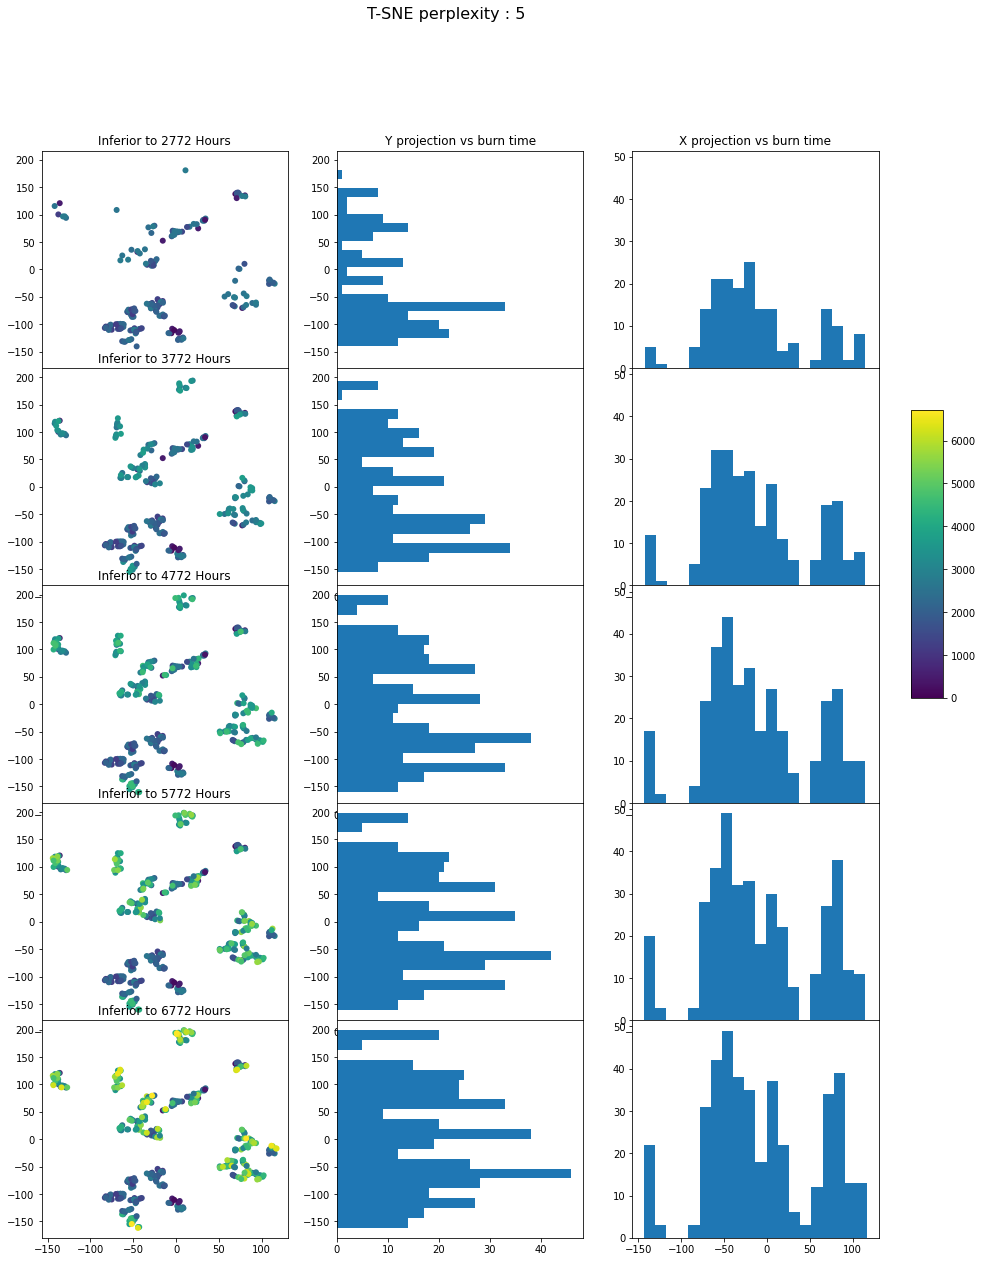

<Figure size 1080x1080 with 0 Axes>

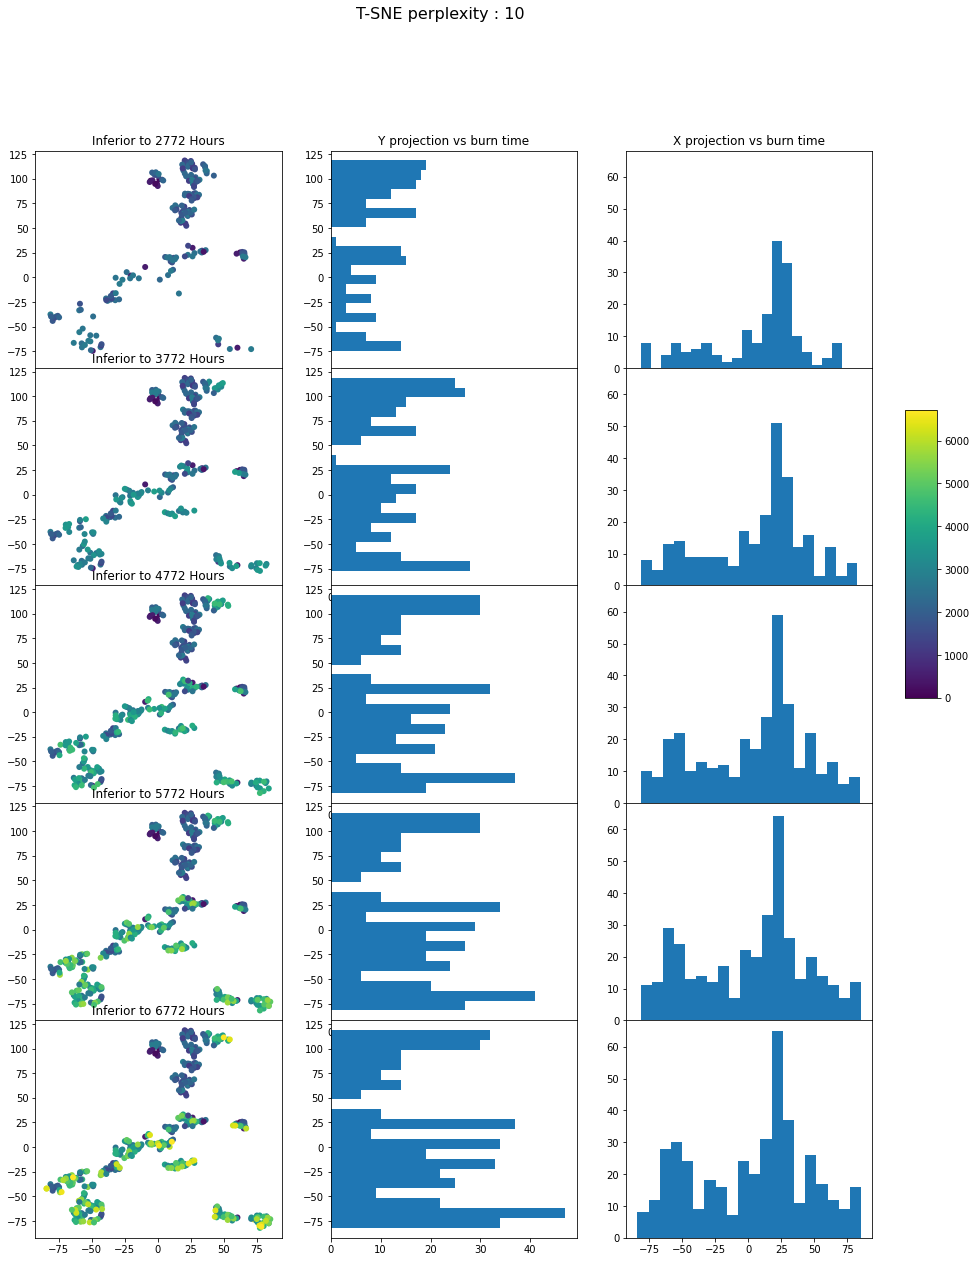

<Figure size 1080x1080 with 0 Axes>

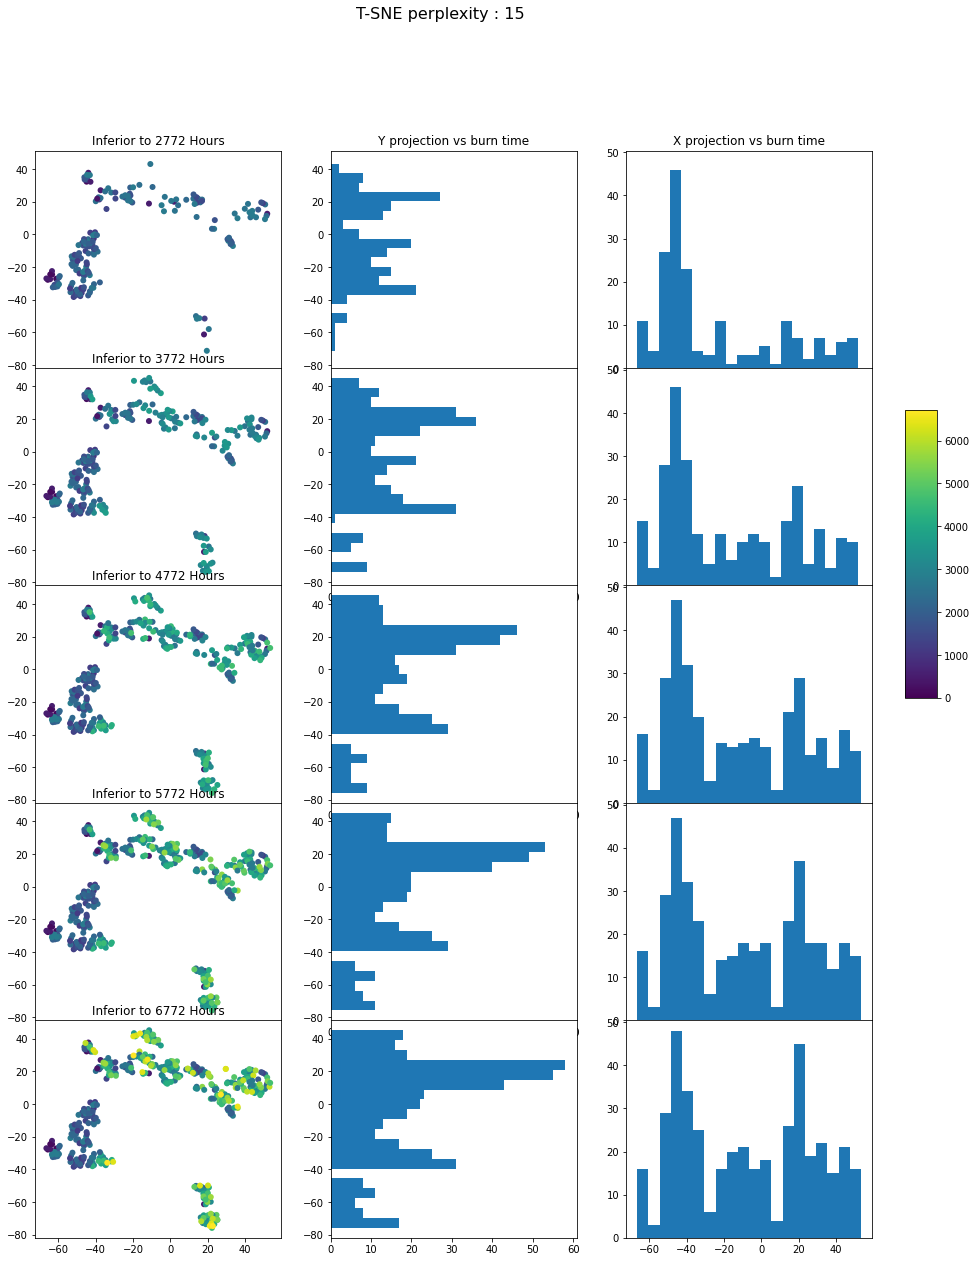

<Figure size 1080x1080 with 0 Axes>

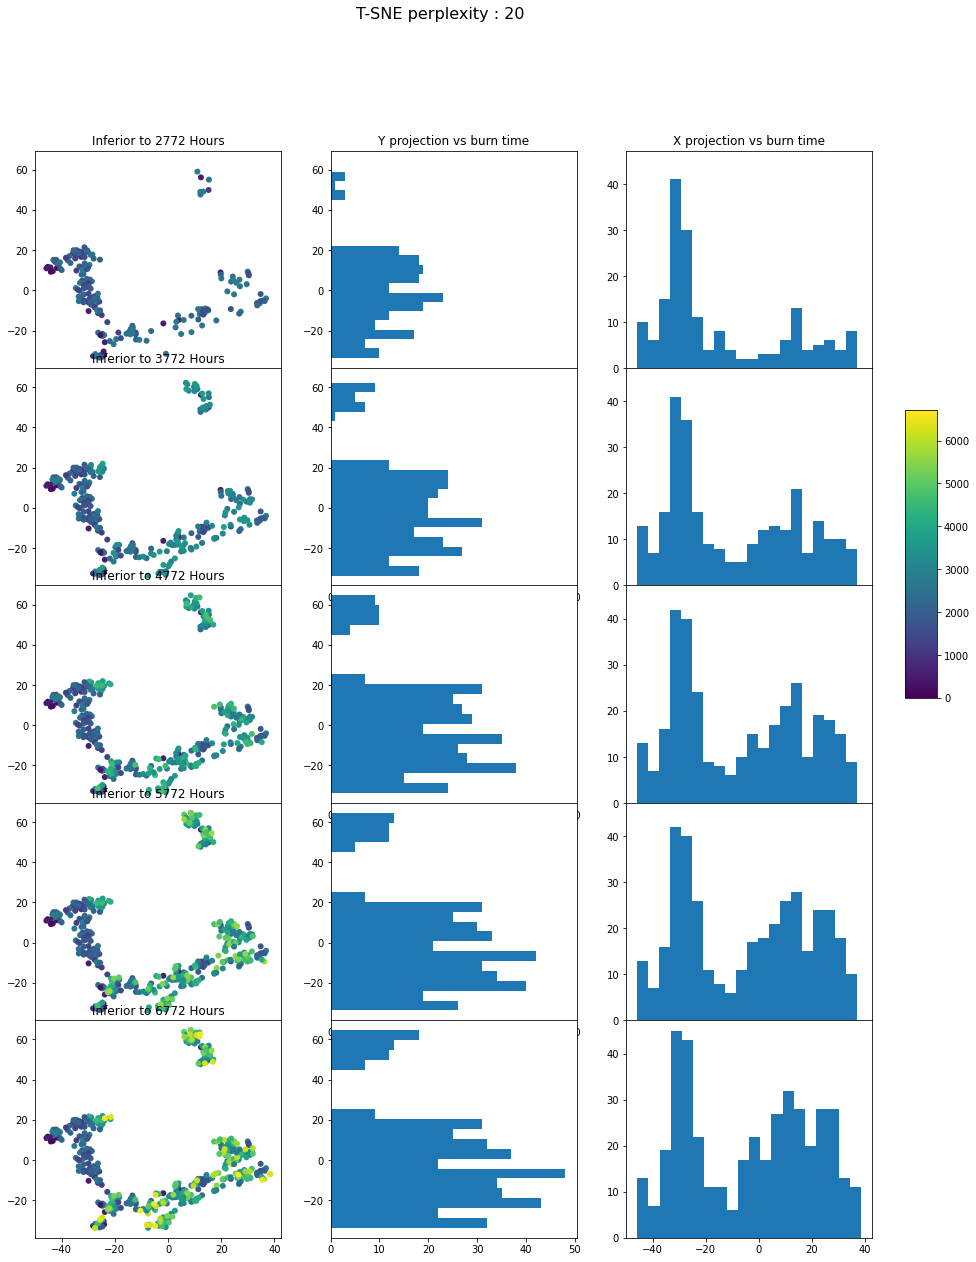

<Figure size 1080x1080 with 0 Axes>

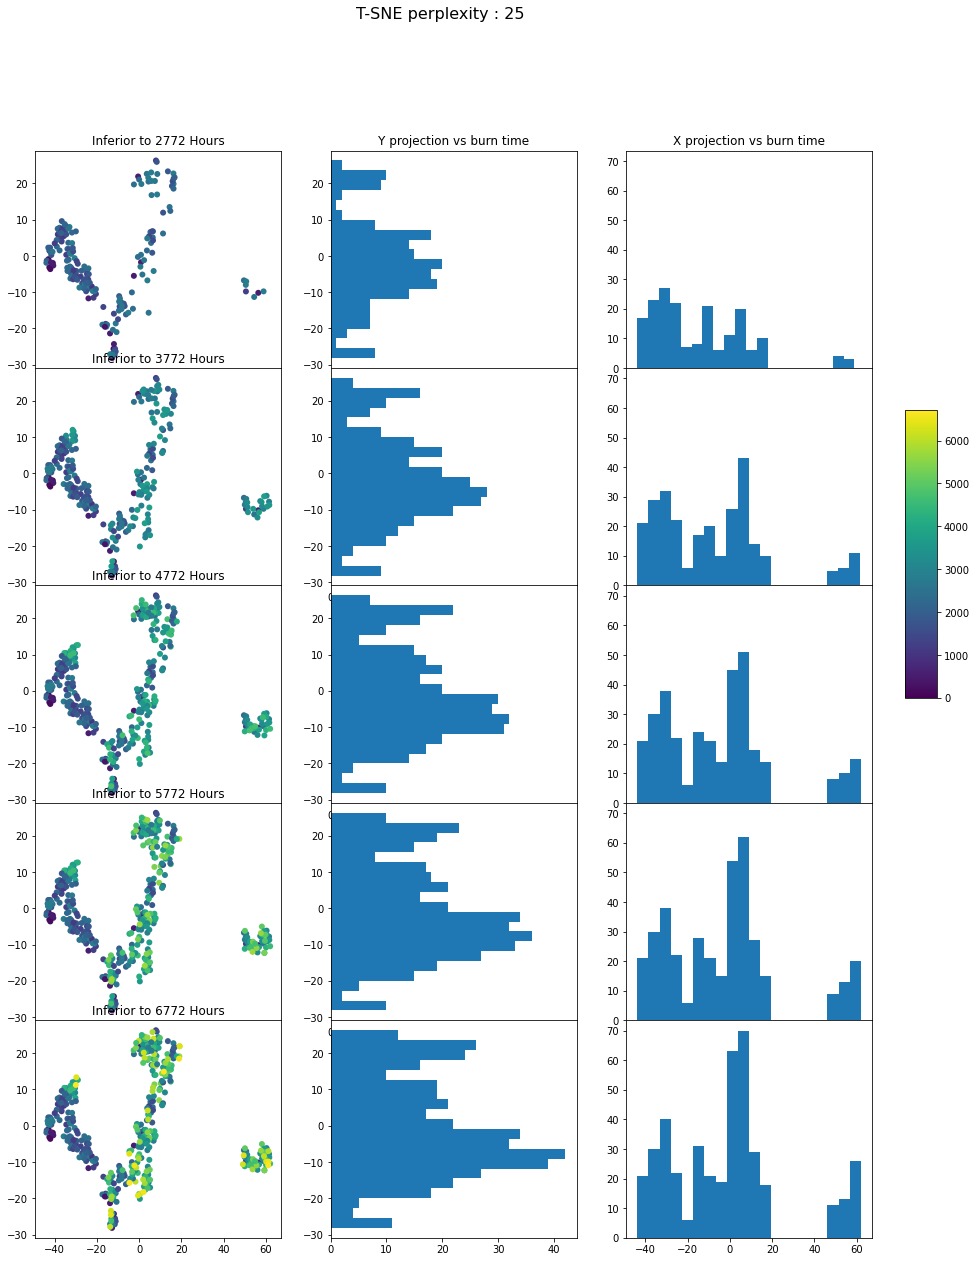

<Figure size 1080x1080 with 0 Axes>

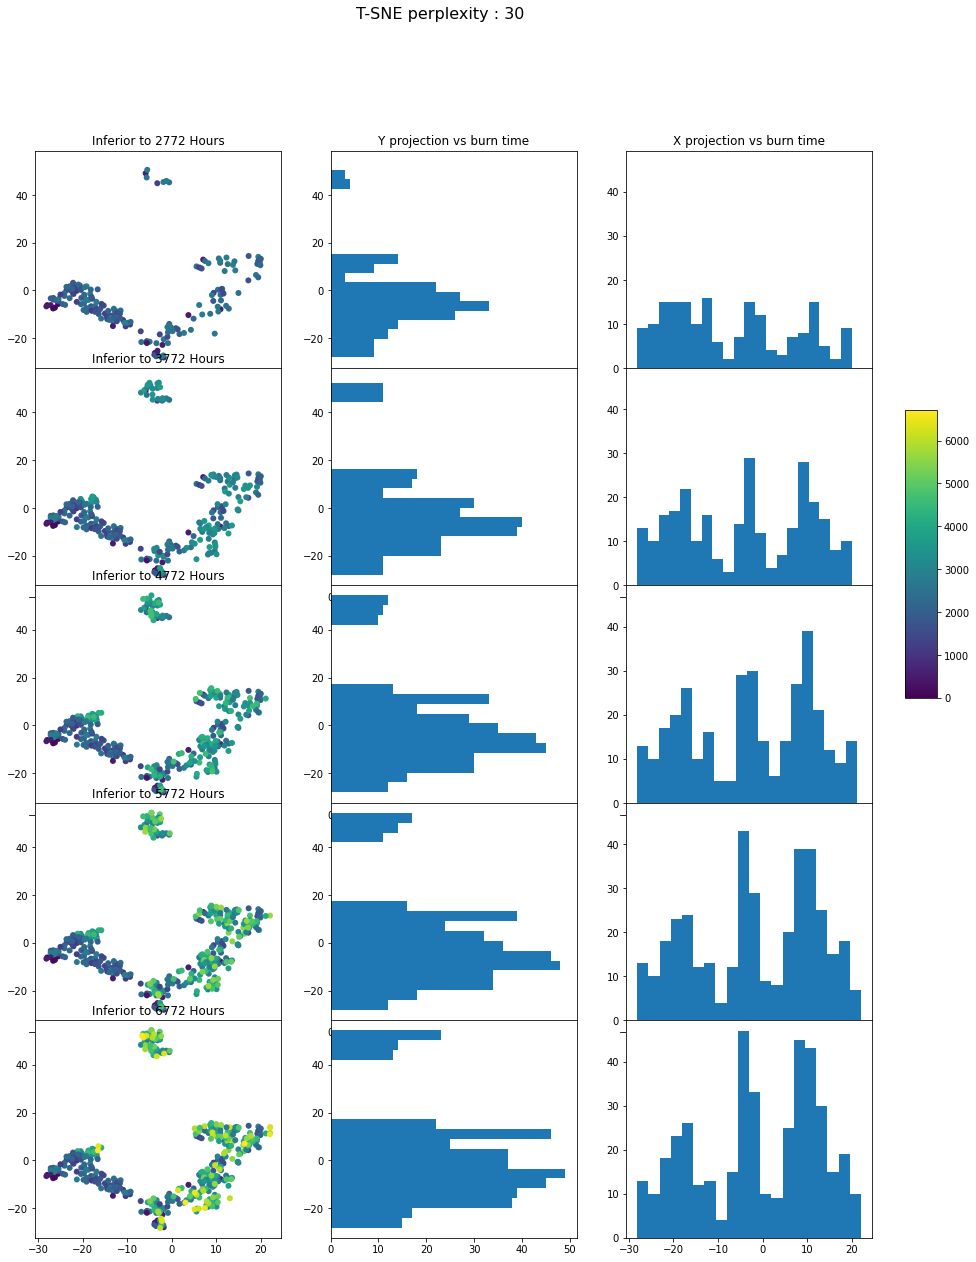

<Figure size 1080x1080 with 0 Axes>

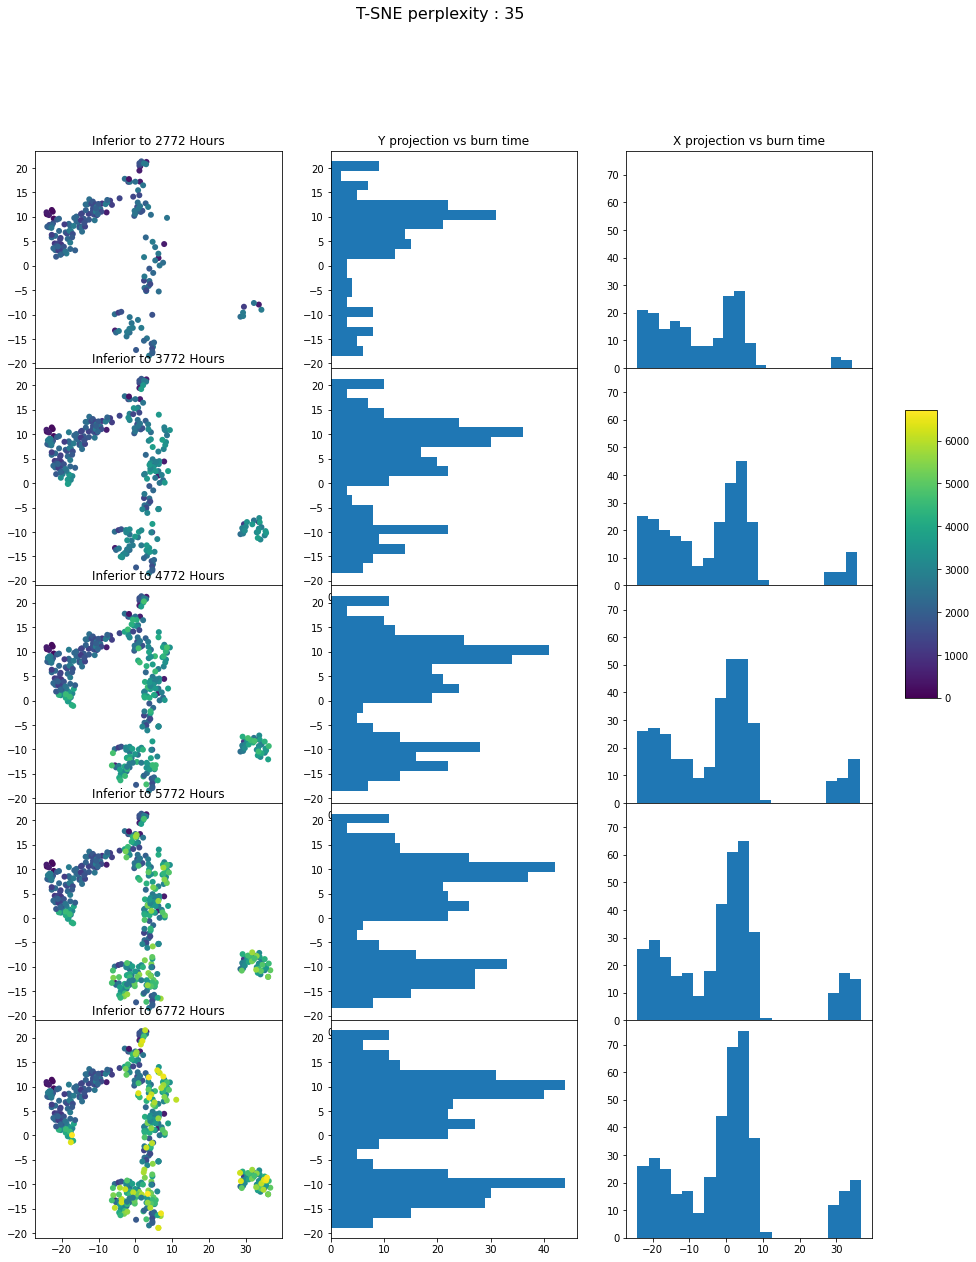

<Figure size 1080x1080 with 0 Axes>

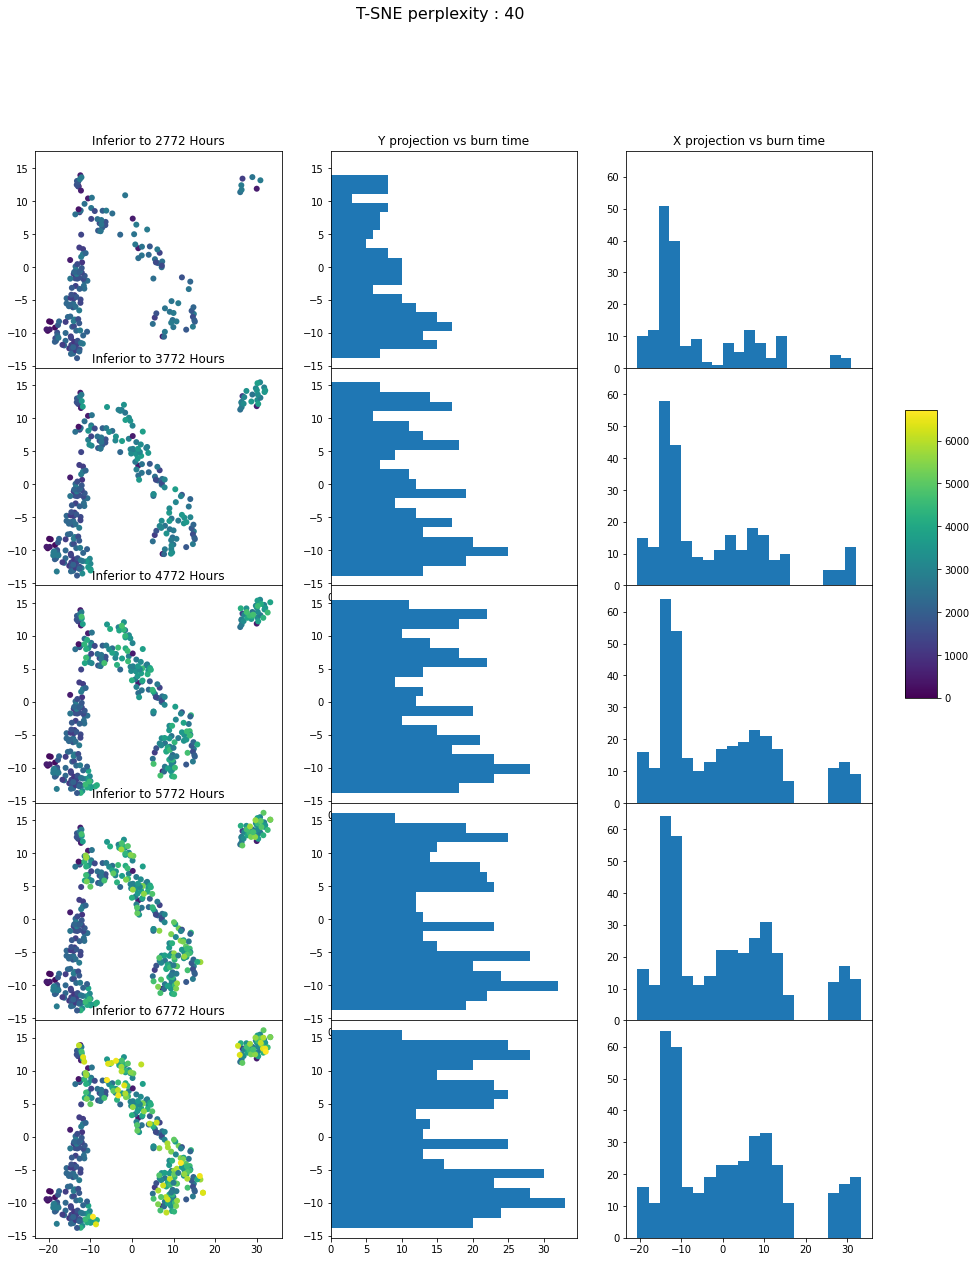

<Figure size 1080x1080 with 0 Axes>

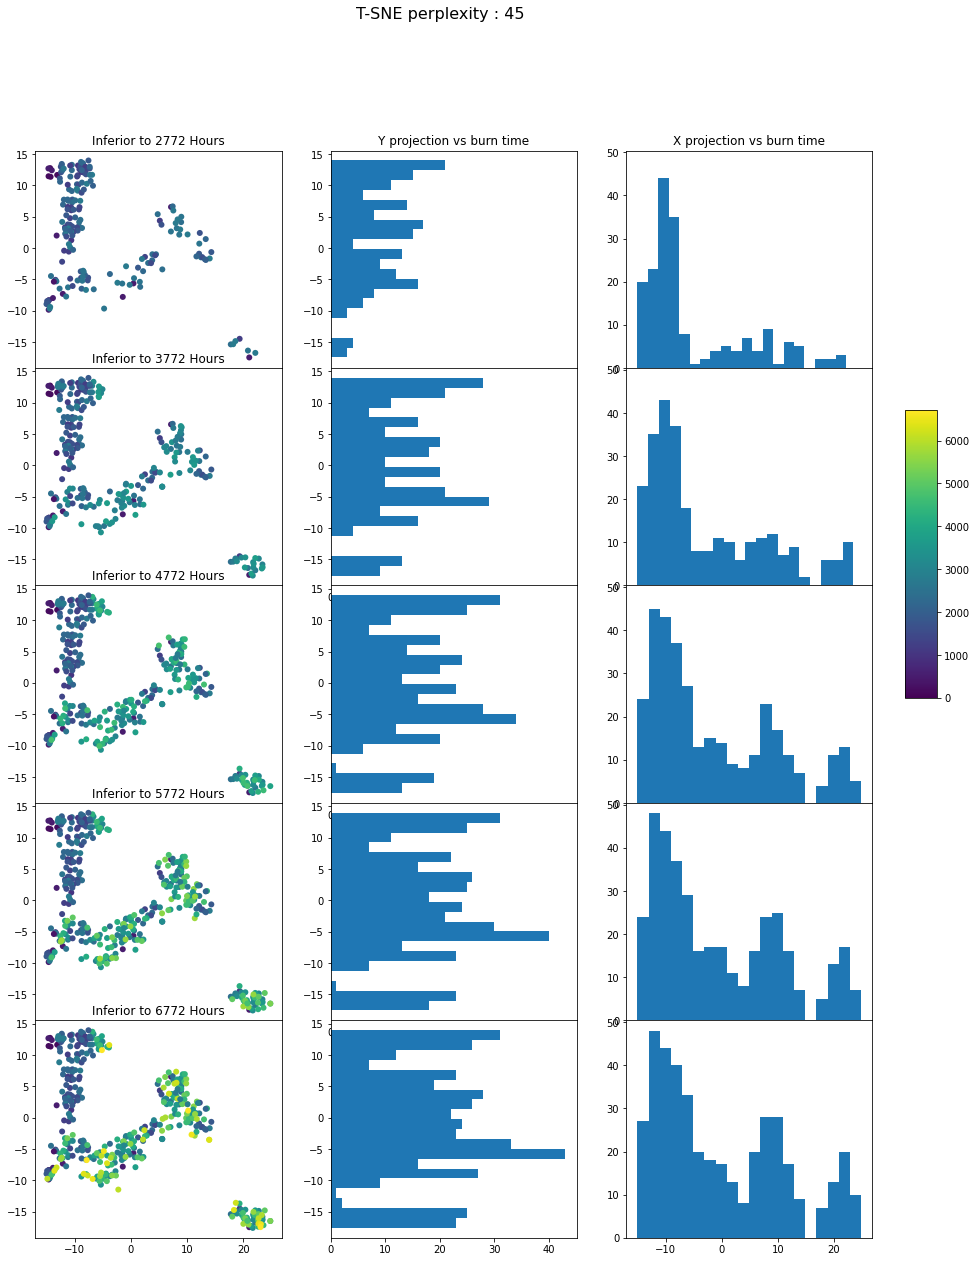

<Figure size 1080x1080 with 0 Axes>

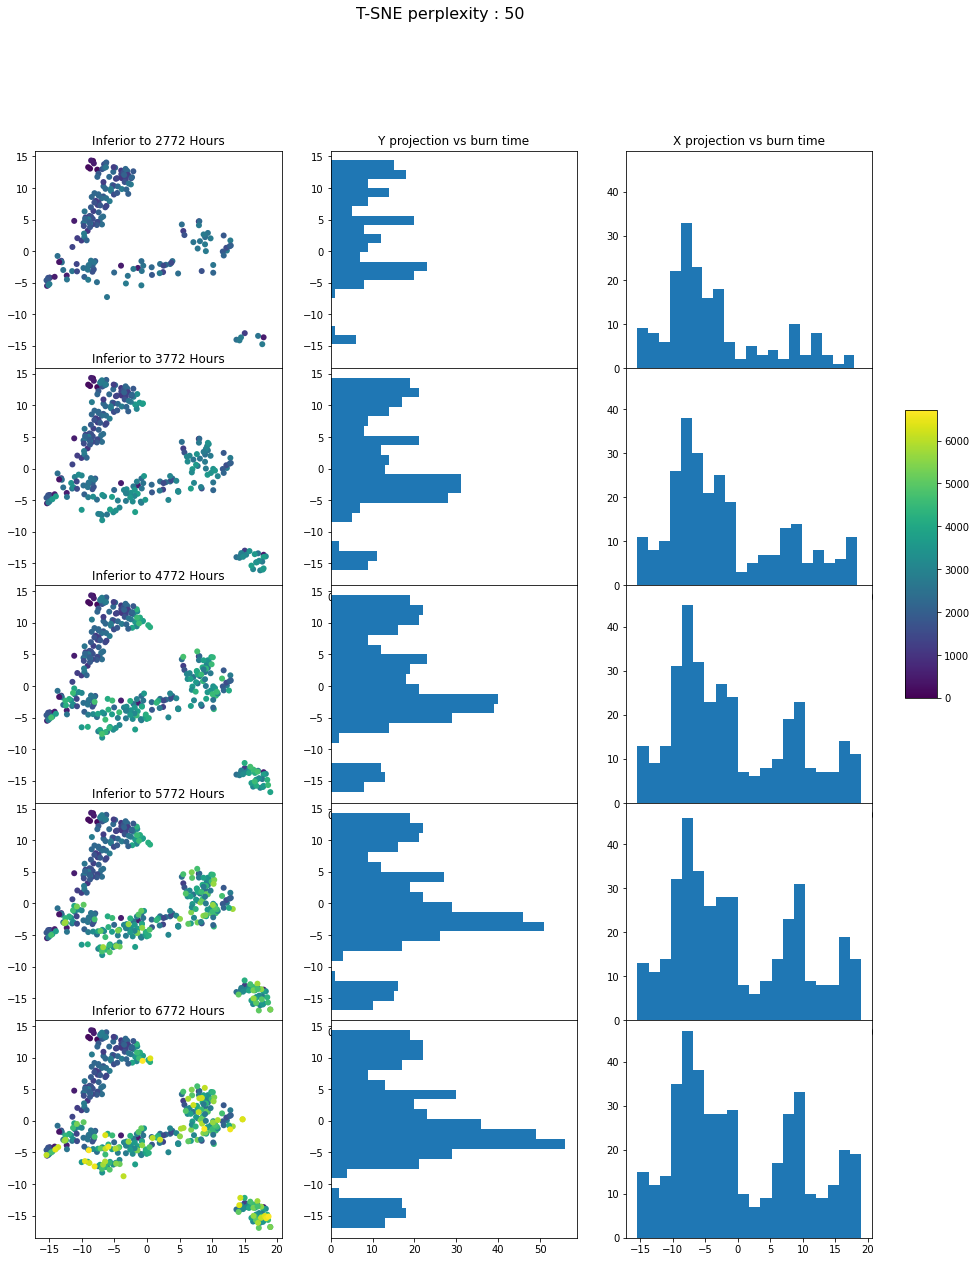

<Figure size 1080x1080 with 0 Axes>

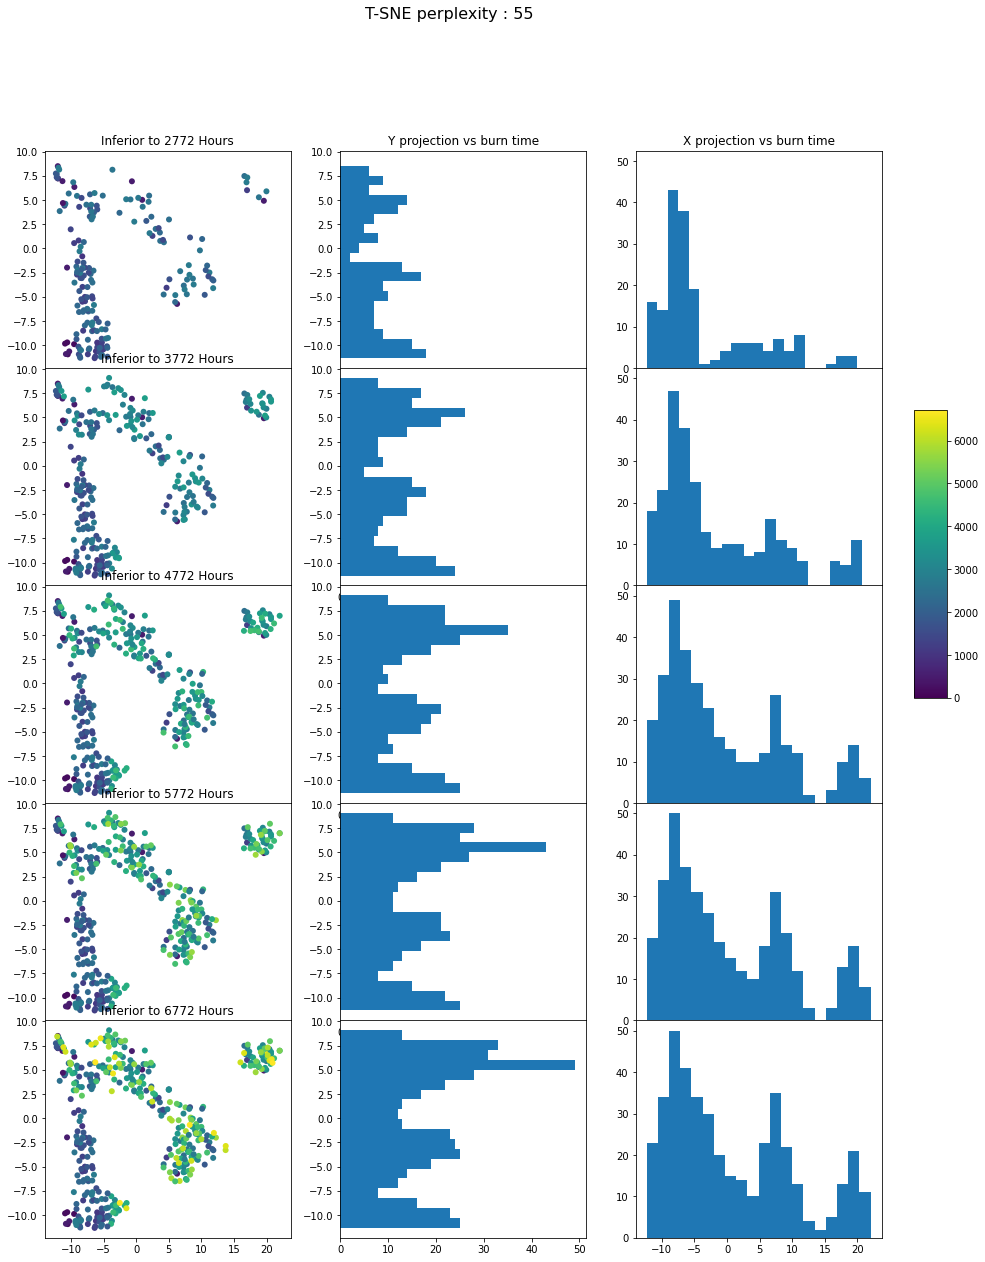

<Figure size 1080x1080 with 0 Axes>

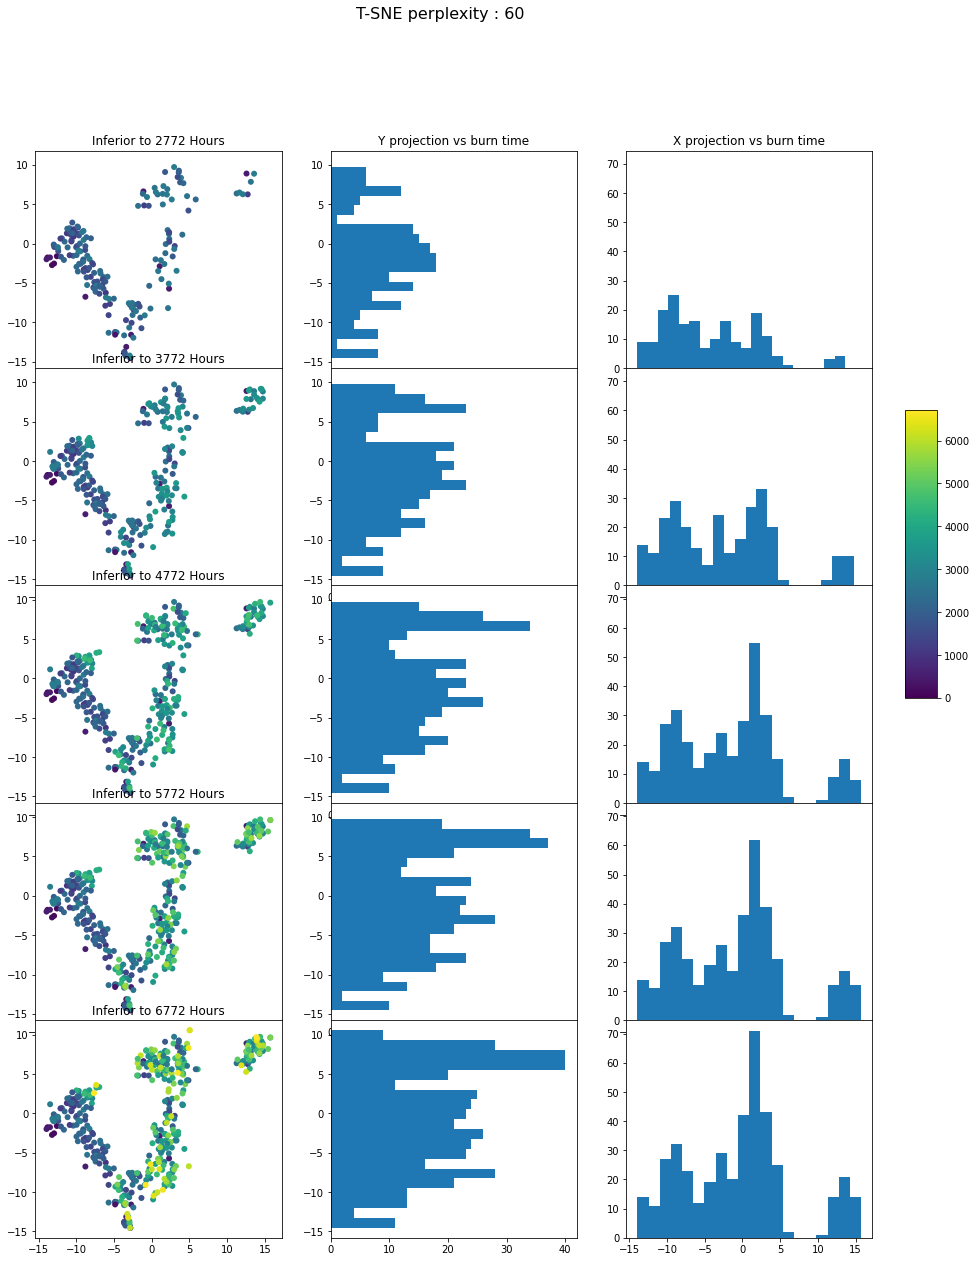

In [5]:
features = [('LinearHGcor','MaxNoiseAmp'),('LinearHGcor','MaxNoisePed'),('LinearHGcor','SlopeAmp'),('LinearHGcor','SlopeInteg'),
            ('LinearHGunc','MaxNoiseAmp'),('LinearHGunc','MaxNoisePed'),('LinearHGunc','SlopeAmp'),('LinearHGunc','SlopeInteg'),
            ('LinearLCHGcor','MaxNoiseAmp'),('LinearLCHGcor','MaxNoisePed'),('LinearLCHGcor','SlopeAmp'),('LinearLCHGcor','SlopeInteg'),
            ('LinearLGcor','MaxNoiseAmp'),('LinearLGcor','MaxNoisePed'),('LinearLGcor','SlopeAmp'),('LinearLGcor','SlopeInteg'),
            ('LinearLGunc','MaxNoiseAmp'),('LinearLGunc','MaxNoisePed'),('LinearLGunc','SlopeAmp'),('LinearLGunc','SlopeInteg'),
            ('LinearSCLGunc','MaxNoiseAmp'),('LinearSCLGunc','MaxNoisePed'),('LinearSCLGunc','SlopeAmp'),('LinearSCLGunc','SlopeInteg')]
# Extract the relevant features and convert them to a NumPy array
features = Fast[features].values
# Define the burning time values as a NumPy array
burning_times = FENICS[('Board','burnTime')].values
ids = FENICS[('Board','id')].values

perplexities = [5,10,15,20,25,30,35,40,45,50,55,60]
for perplexity in perplexities :
    FATL.FenTSNE(features, burning_times, ids=ids,perplexity=perplexity,random_state=80,n_iter=20000,thresholds=[2772,3772,4772,5772,6772],superior=False)
  


<Figure size 1080x1080 with 0 Axes>

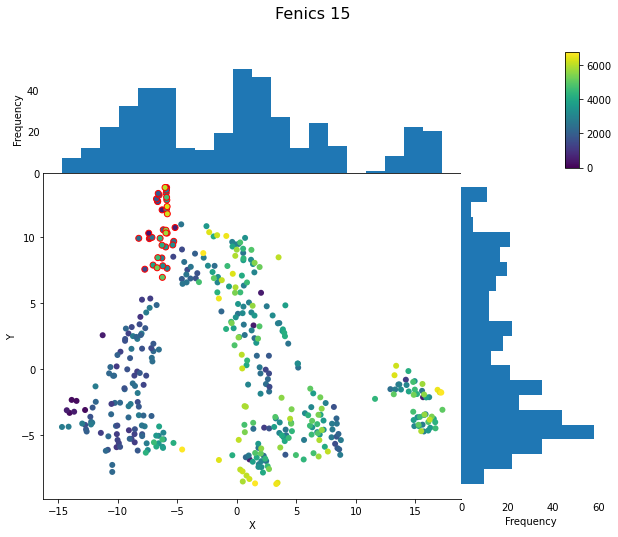

<Figure size 1080x1080 with 0 Axes>

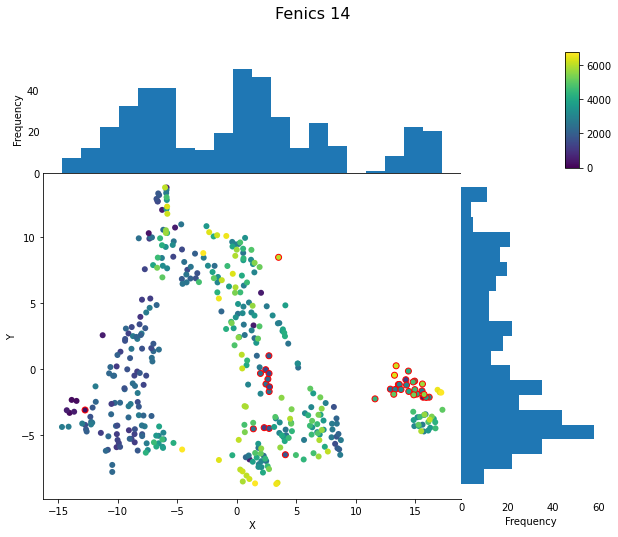

<Figure size 1080x1080 with 0 Axes>

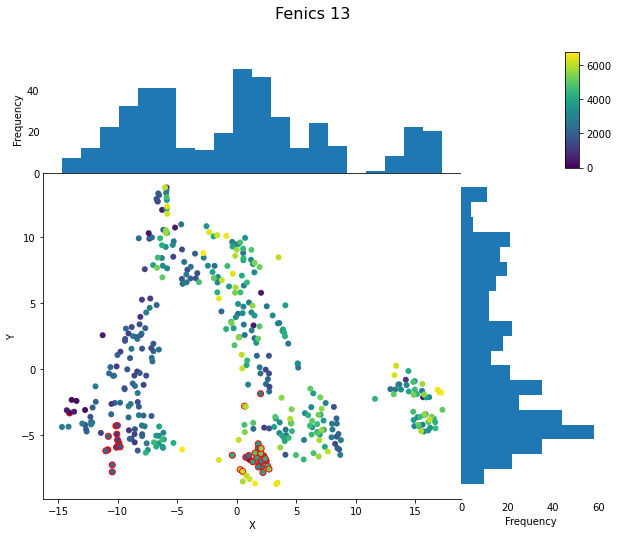

<Figure size 1080x1080 with 0 Axes>

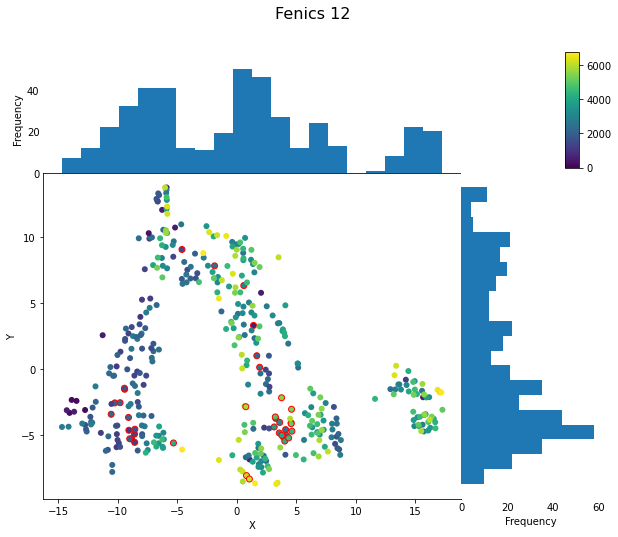

<Figure size 1080x1080 with 0 Axes>

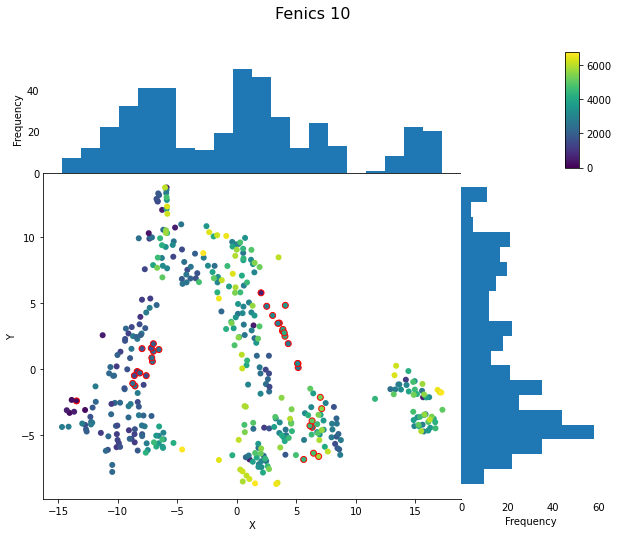

<Figure size 1080x1080 with 0 Axes>

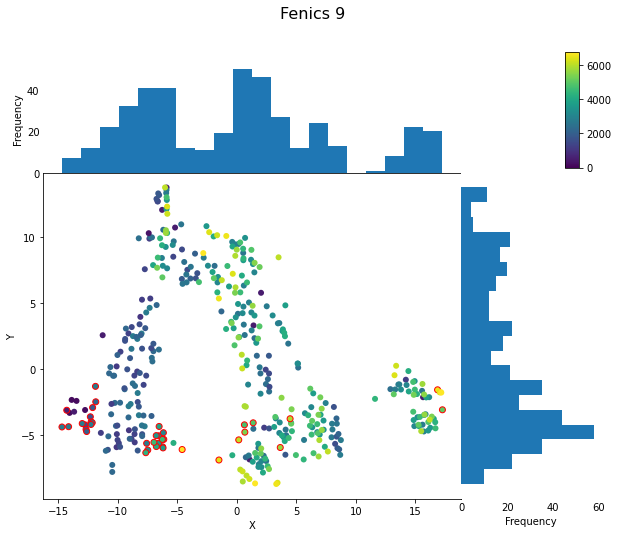

<Figure size 1080x1080 with 0 Axes>

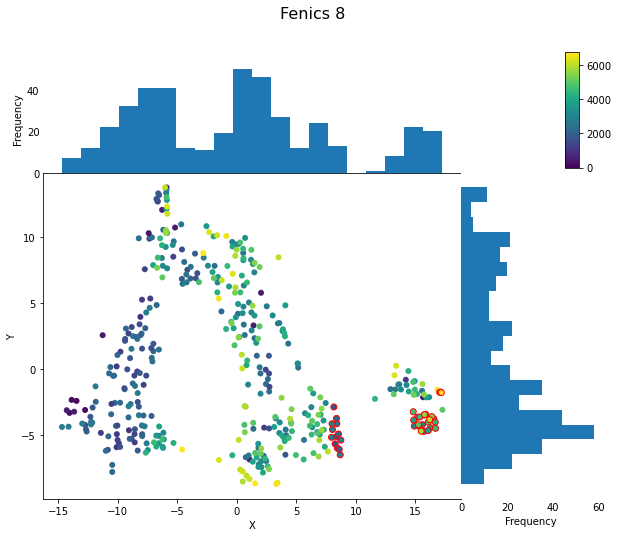

<Figure size 1080x1080 with 0 Axes>

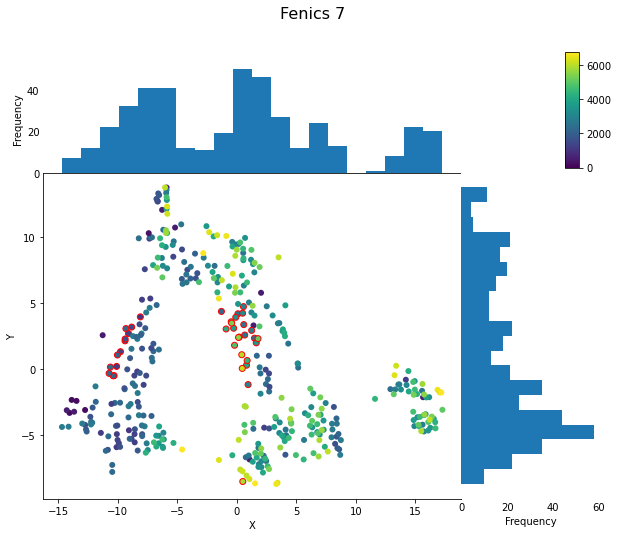

<Figure size 1080x1080 with 0 Axes>

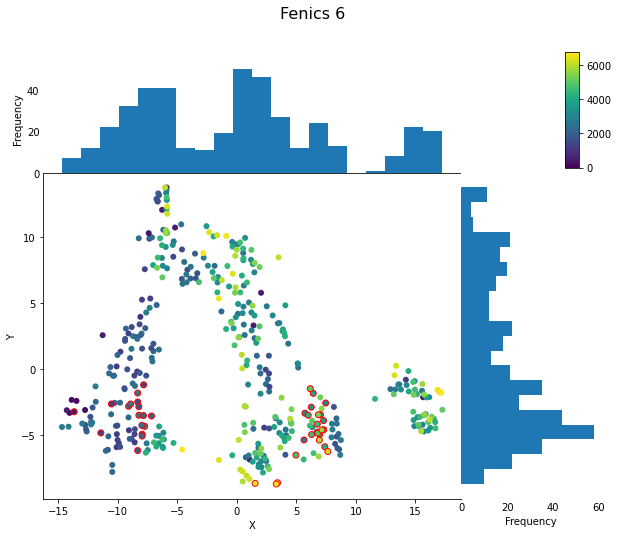

<Figure size 1080x1080 with 0 Axes>

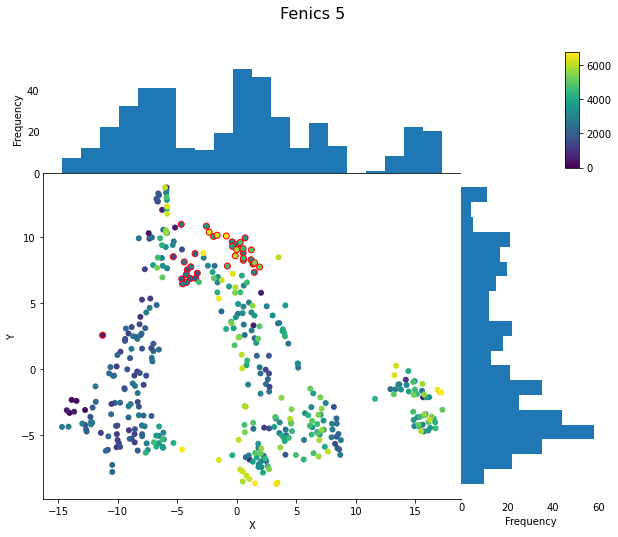

<Figure size 1080x1080 with 0 Axes>

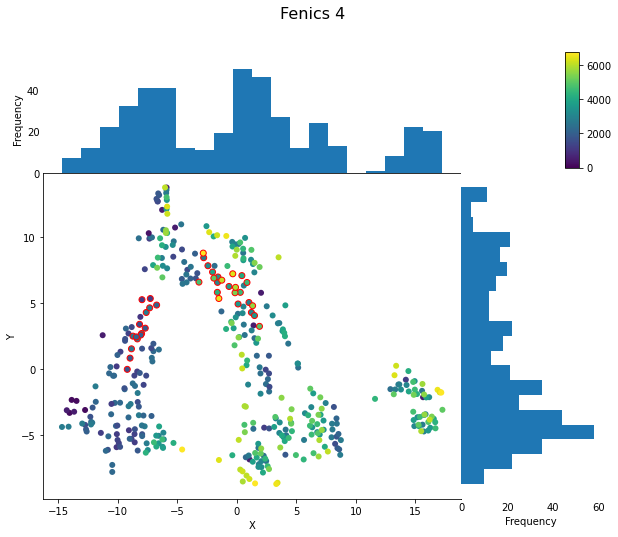

In [63]:
features = [('LinearHGcor','MaxNoiseAmp'),('LinearHGcor','MaxNoisePed'),('LinearHGcor','SlopeAmp'),('LinearHGcor','SlopeInteg'),
            ('LinearHGunc','MaxNoiseAmp'),('LinearHGunc','MaxNoisePed'),('LinearHGunc','SlopeAmp'),('LinearHGunc','SlopeInteg'),
            ('LinearLCHGcor','MaxNoiseAmp'),('LinearLCHGcor','MaxNoisePed'),('LinearLCHGcor','SlopeAmp'),('LinearLCHGcor','SlopeInteg'),
            ('LinearLGcor','MaxNoiseAmp'),('LinearLGcor','MaxNoisePed'),('LinearLGcor','SlopeAmp'),('LinearLGcor','SlopeInteg'),
            ('LinearLGunc','MaxNoiseAmp'),('LinearLGunc','MaxNoisePed'),('LinearLGunc','SlopeAmp'),('LinearLGunc','SlopeInteg'),
            ('LinearSCLGunc','MaxNoiseAmp'),('LinearSCLGunc','MaxNoisePed'),('LinearSCLGunc','SlopeAmp'),('LinearSCLGunc','SlopeInteg')]
# Extract the relevant features and convert them to a NumPy array
features = Fast[features].values
# Define the burning time values as a NumPy array
burning_times = FENICS[('Board','burnTime')].values
ids = FENICS[('Board','id')].values

for id_filter in filter_id :
    edge_colors = []
    for id in ids:
        if id == id_filter:
            edge_colors.append('red')
        else :
            edge_colors.append('none')
    FATL.FenTSNE(features, burning_times,perplexity=60,edge_colors=edge_colors,random_state=80,n_iter=20000,superior=False,title=f'Fenics {id_filter}')

<Figure size 1080x1080 with 0 Axes>

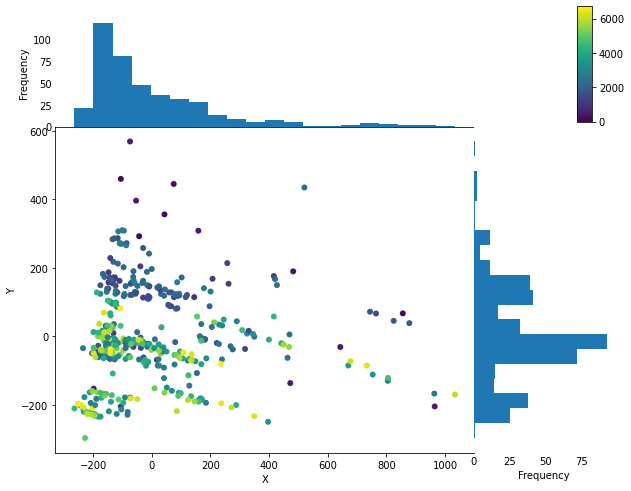

In [28]:
FATL.FenPCA(features, burning_times, ids,random_state=20)   

<Figure size 1080x1080 with 0 Axes>

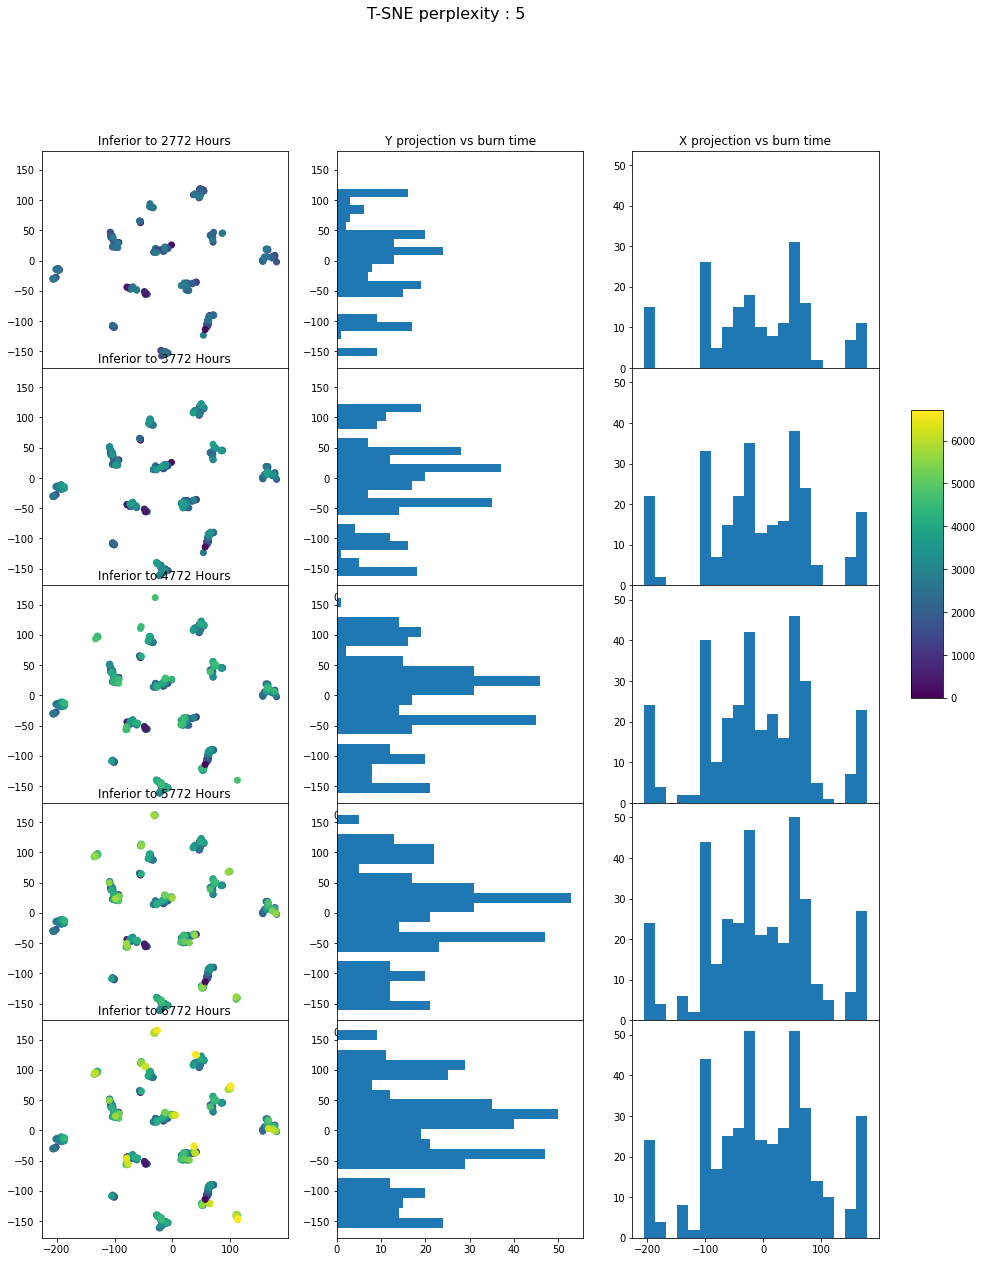

<Figure size 1080x1080 with 0 Axes>

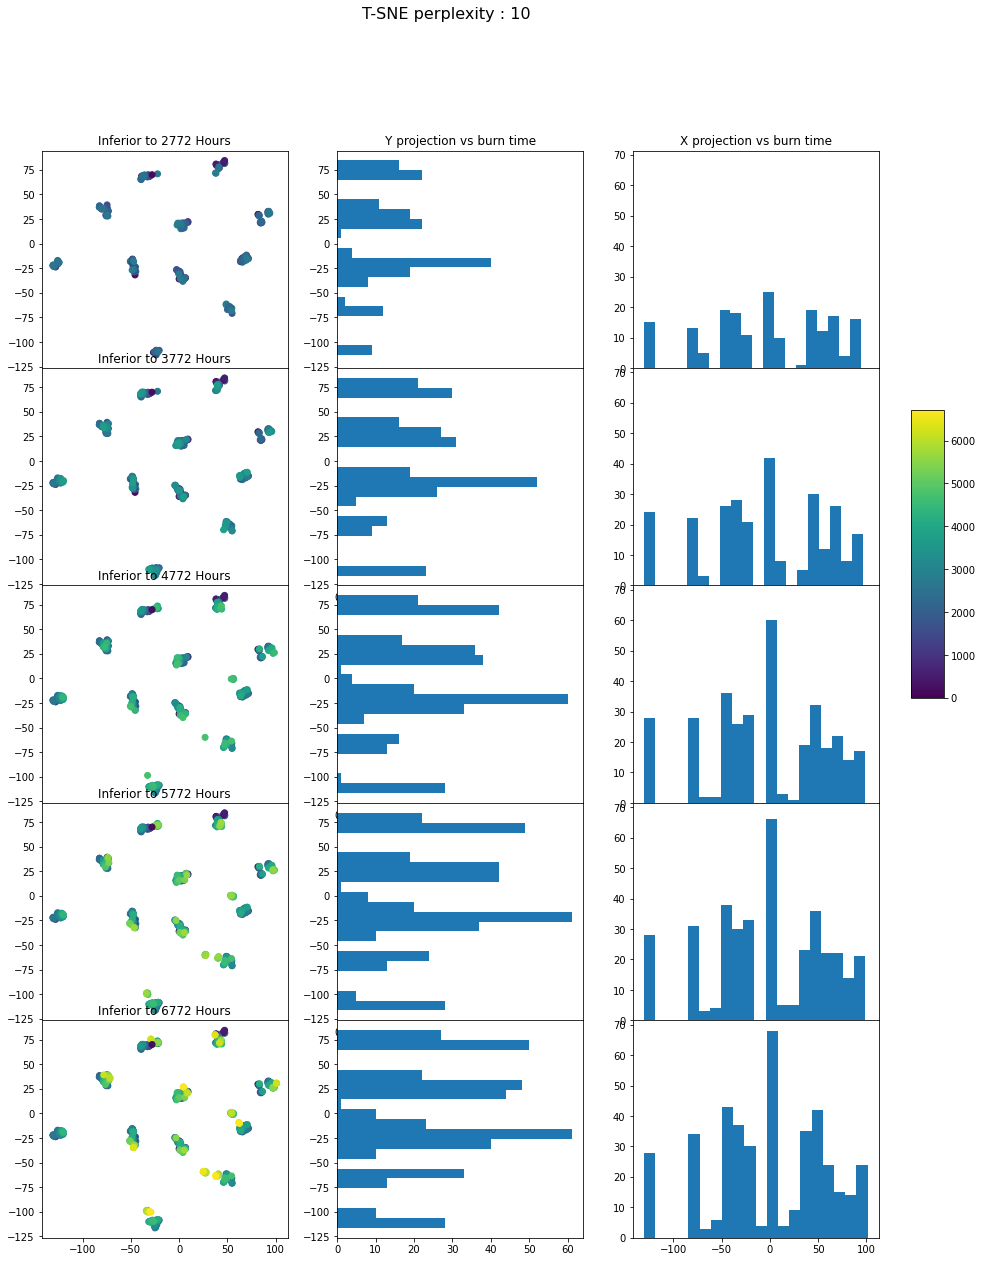

<Figure size 1080x1080 with 0 Axes>

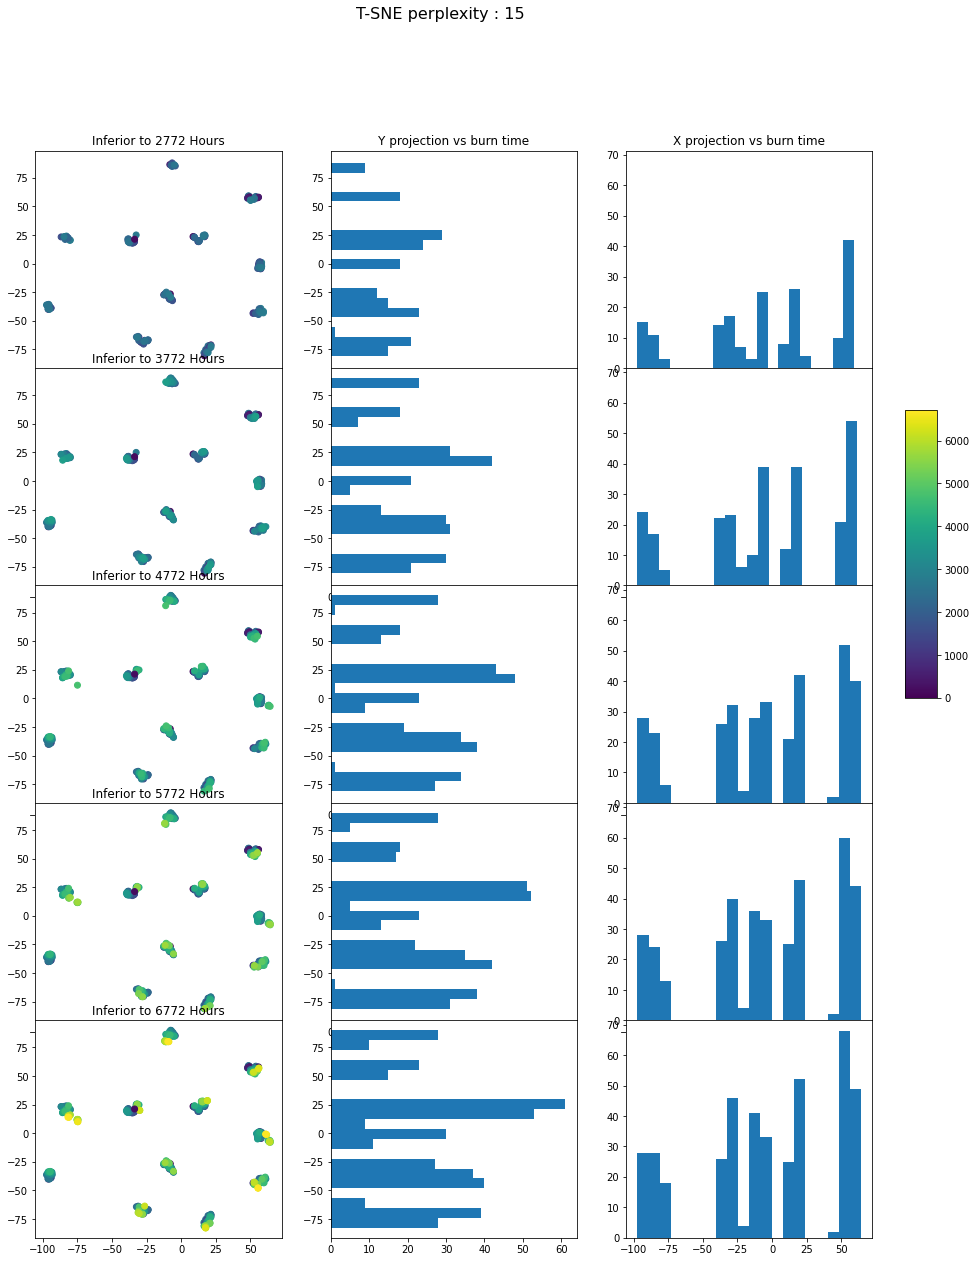

<Figure size 1080x1080 with 0 Axes>

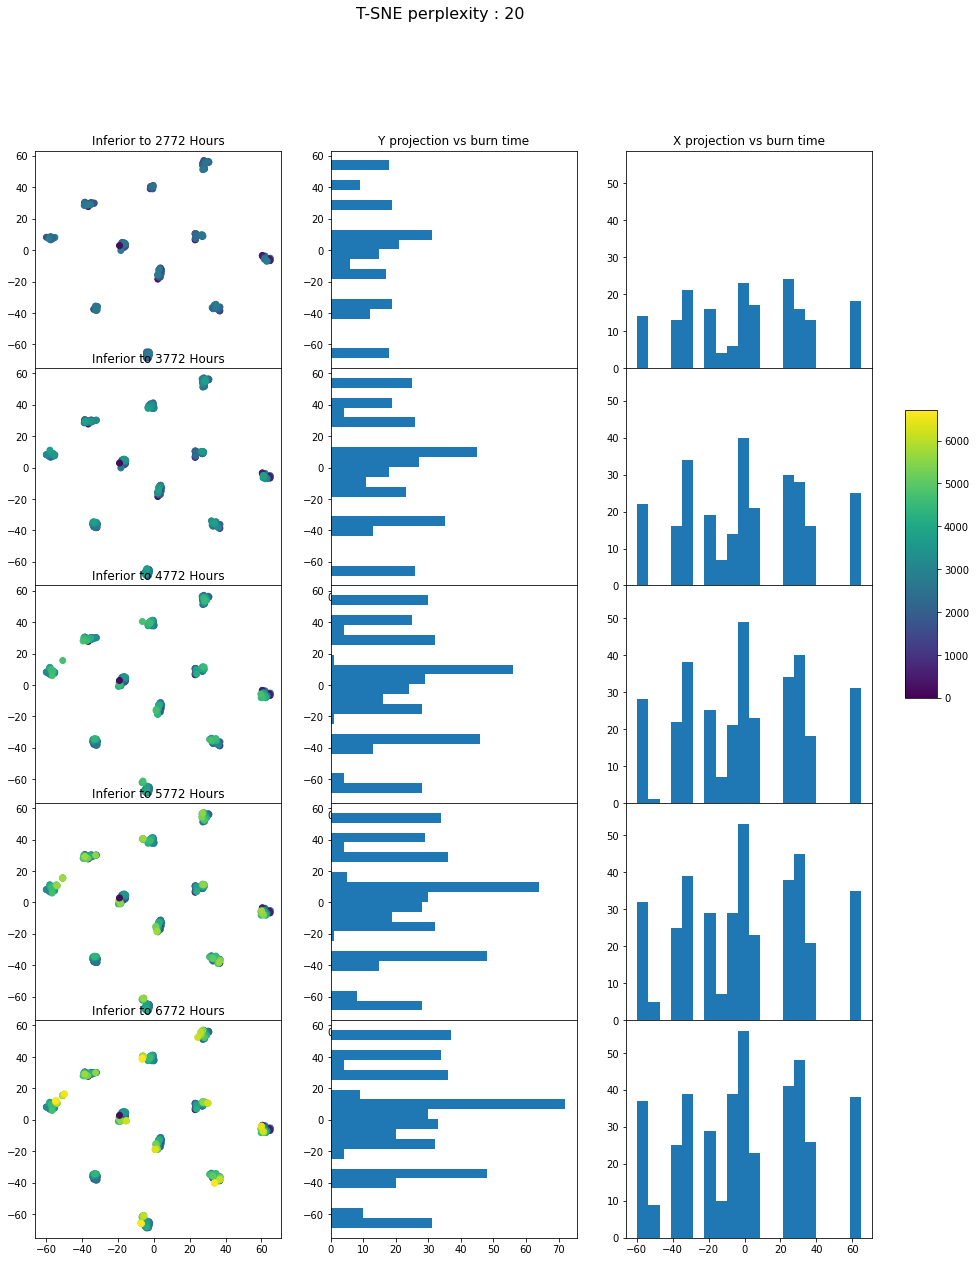

<Figure size 1080x1080 with 0 Axes>

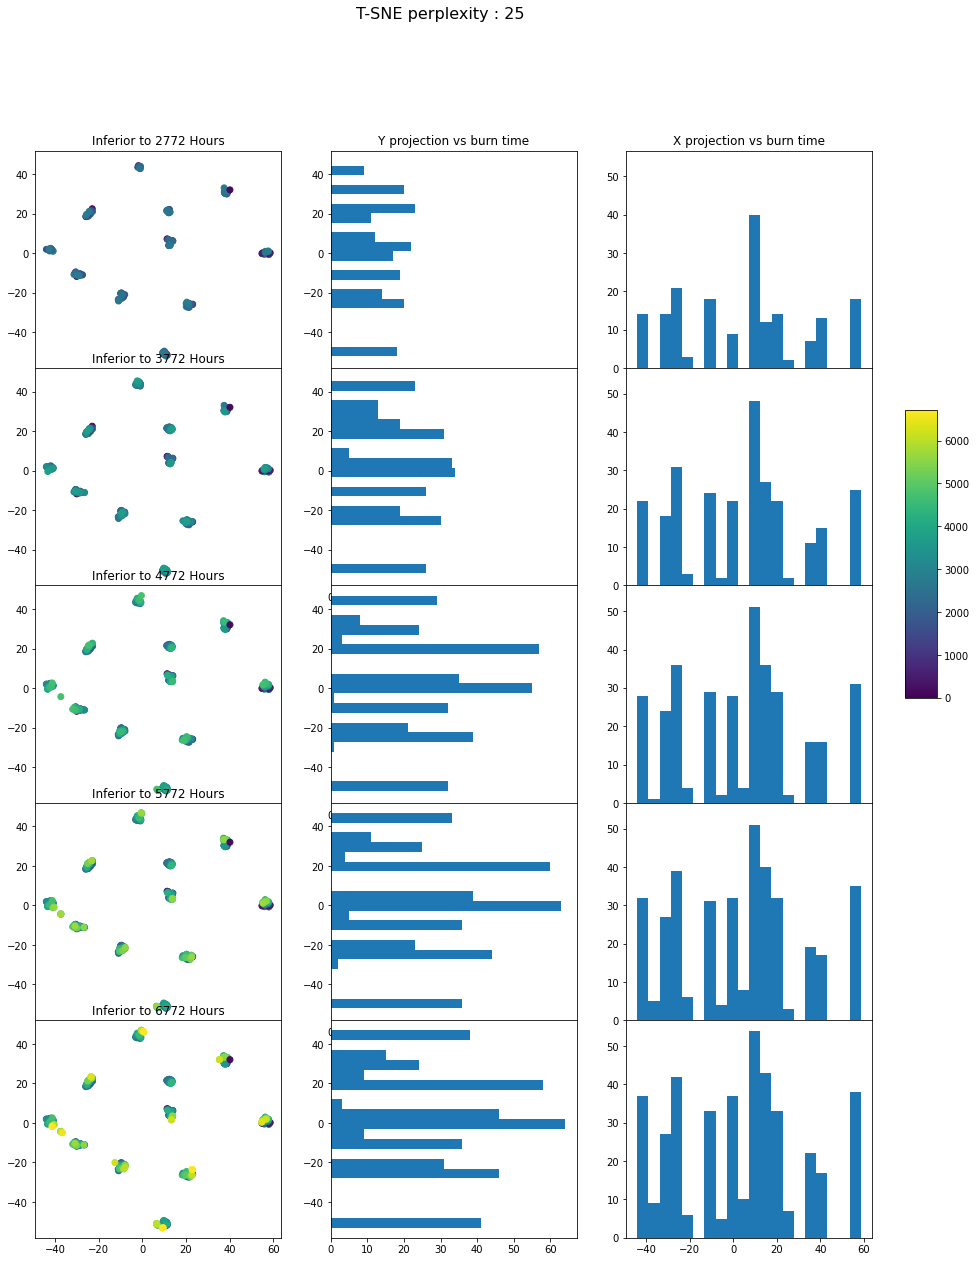

<Figure size 1080x1080 with 0 Axes>

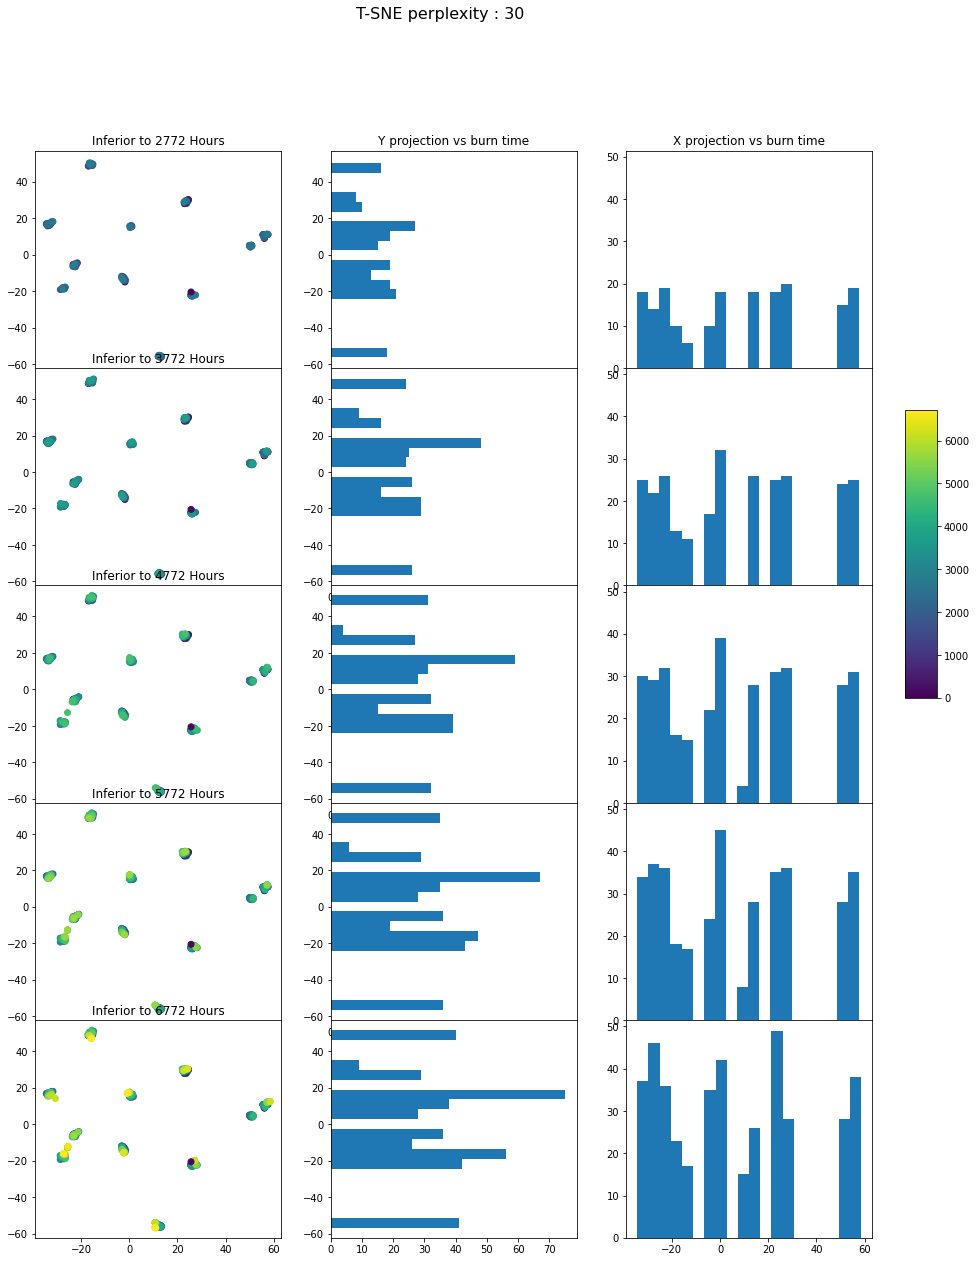

<Figure size 1080x1080 with 0 Axes>

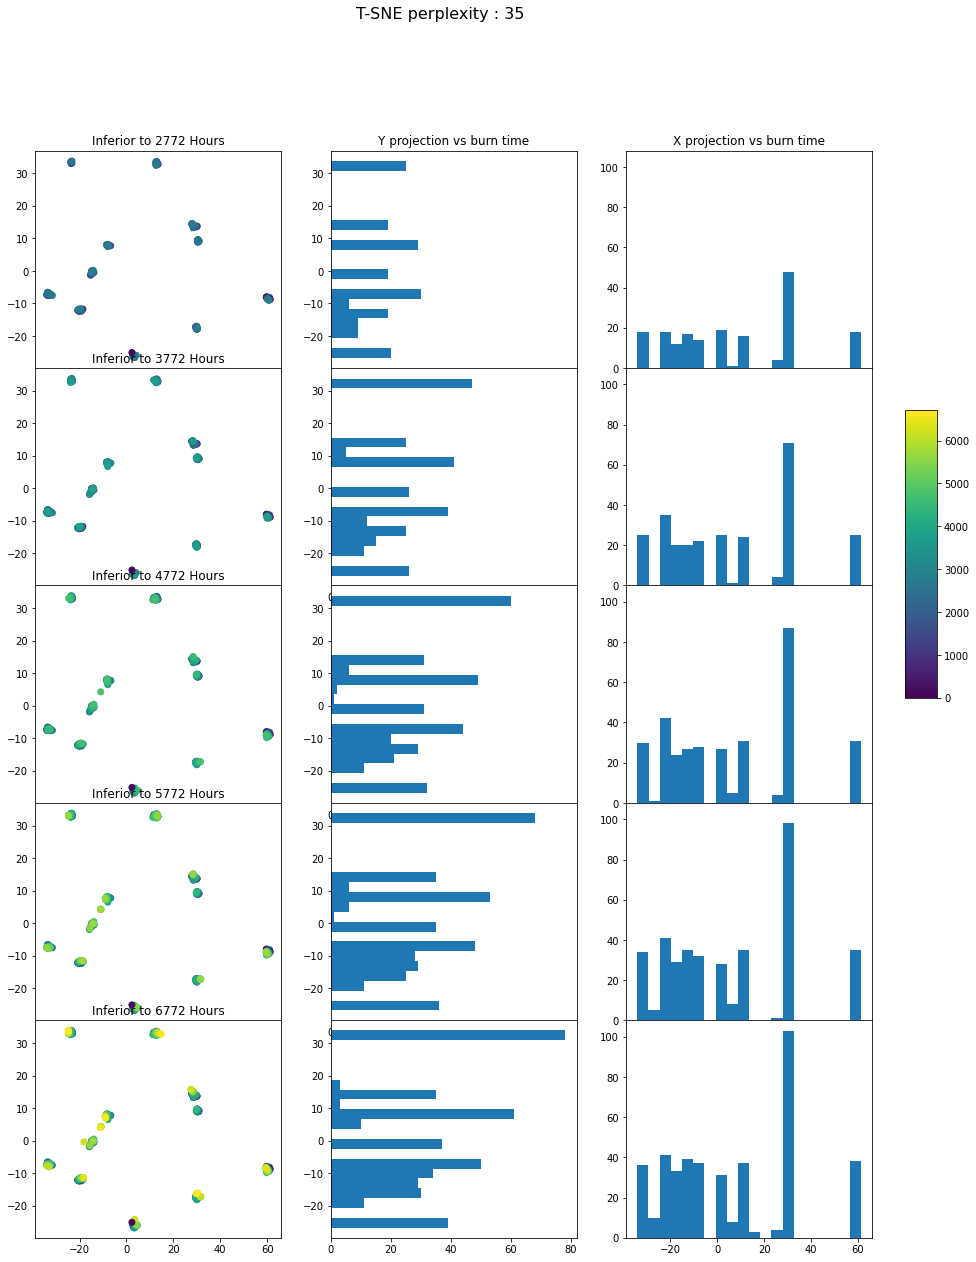

<Figure size 1080x1080 with 0 Axes>

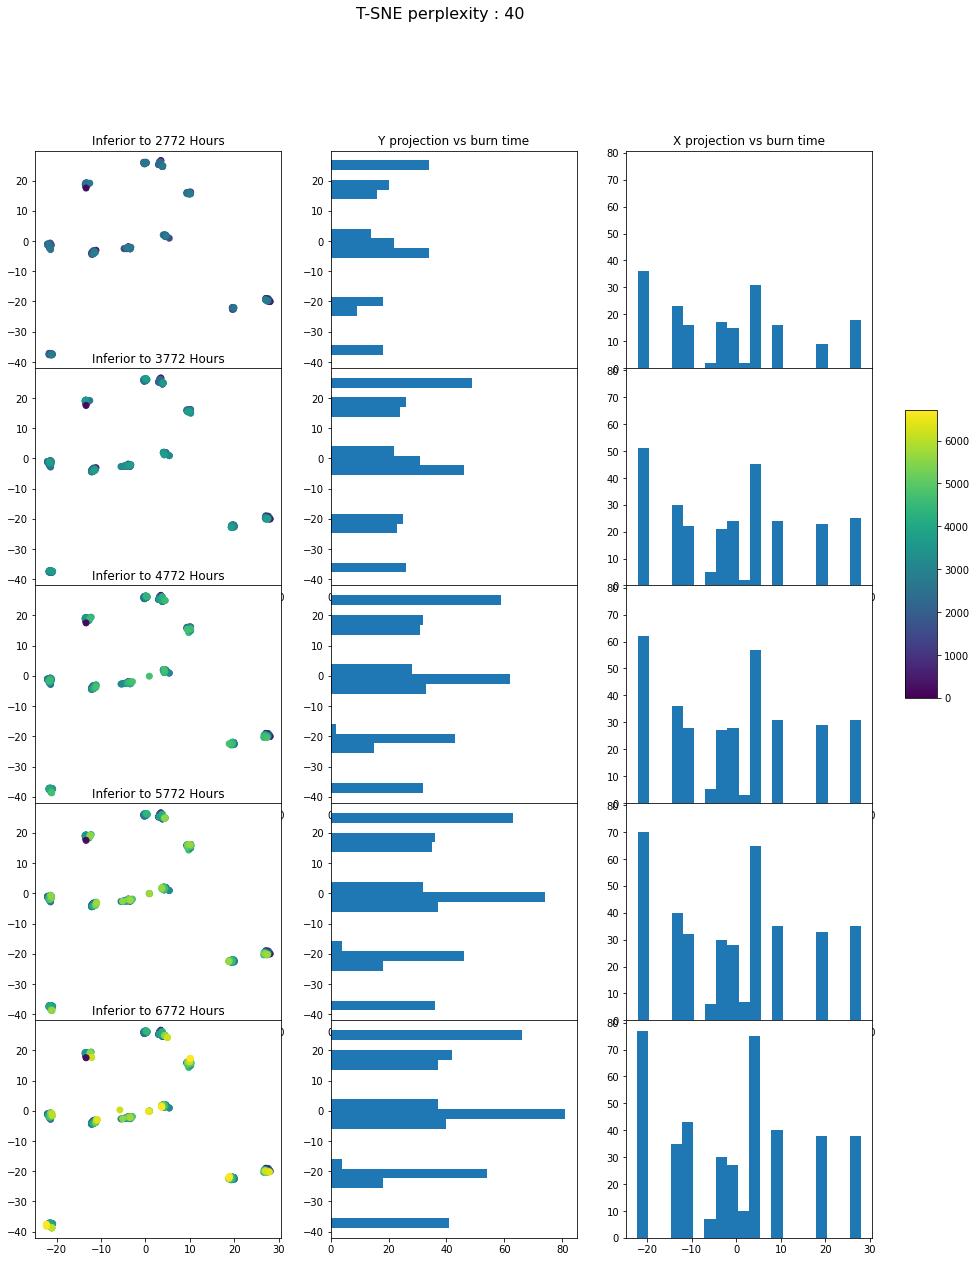

<Figure size 1080x1080 with 0 Axes>

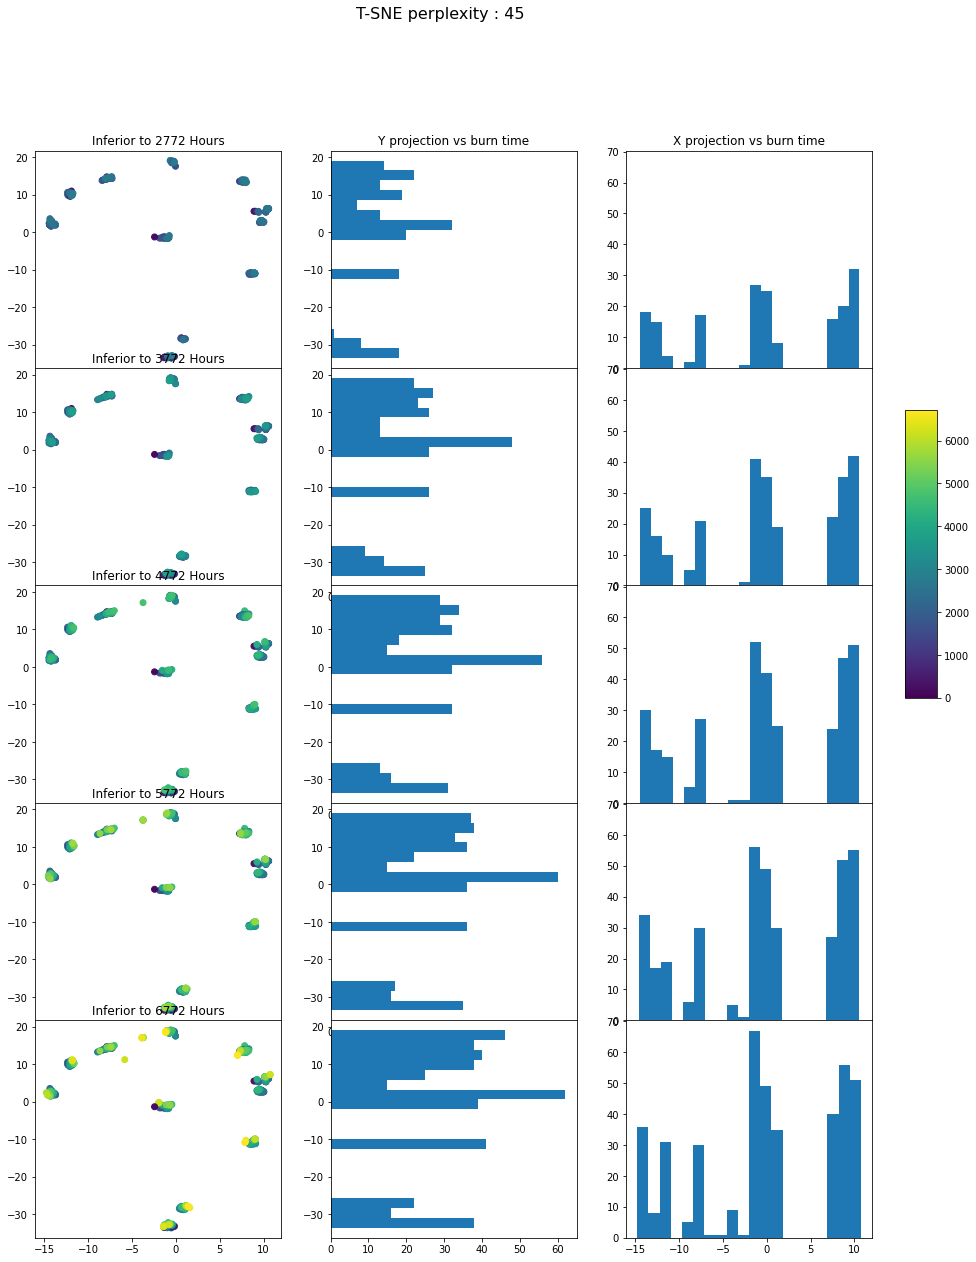

<Figure size 1080x1080 with 0 Axes>

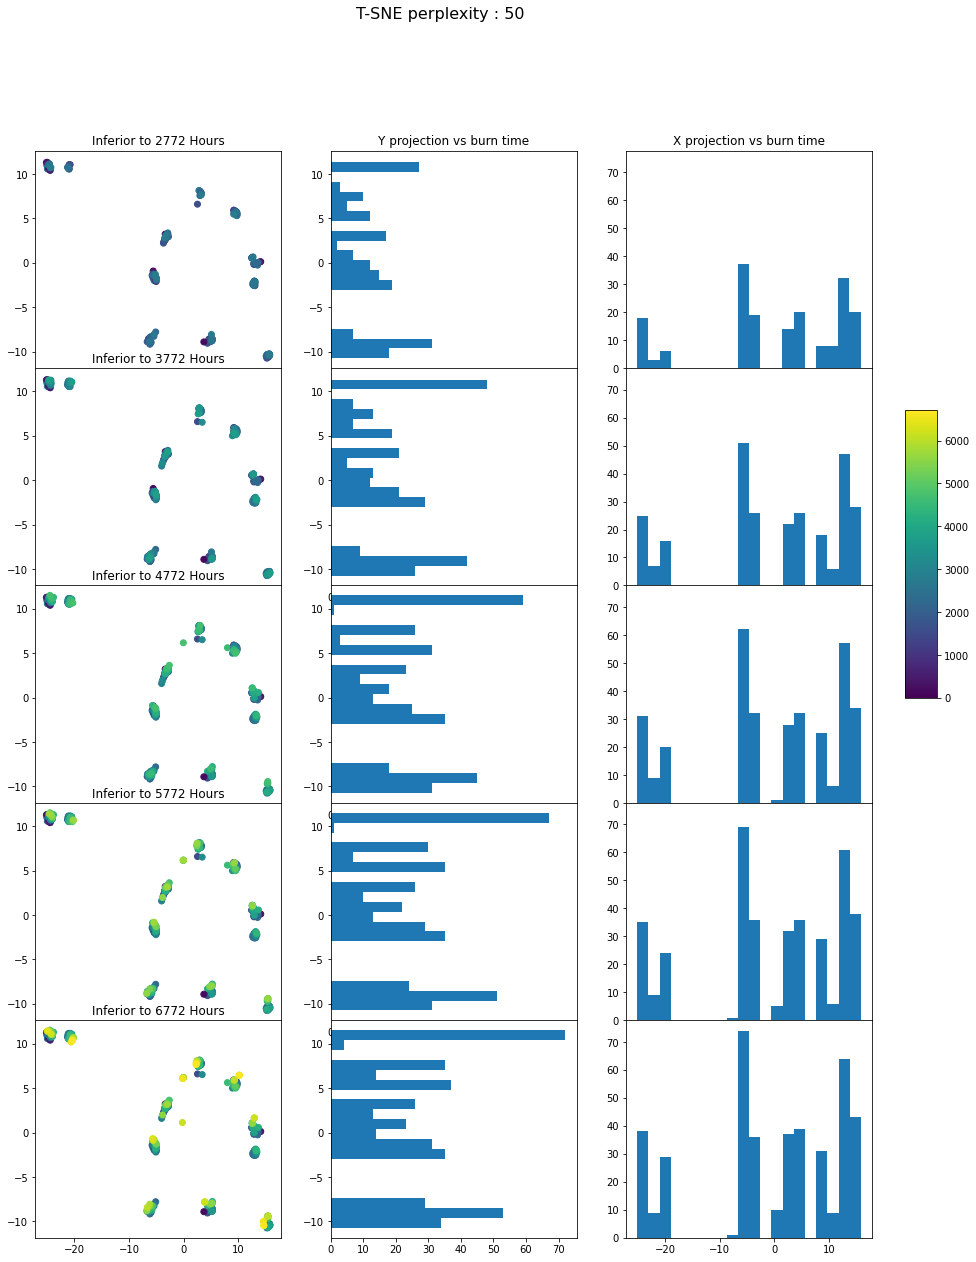

<Figure size 1080x1080 with 0 Axes>

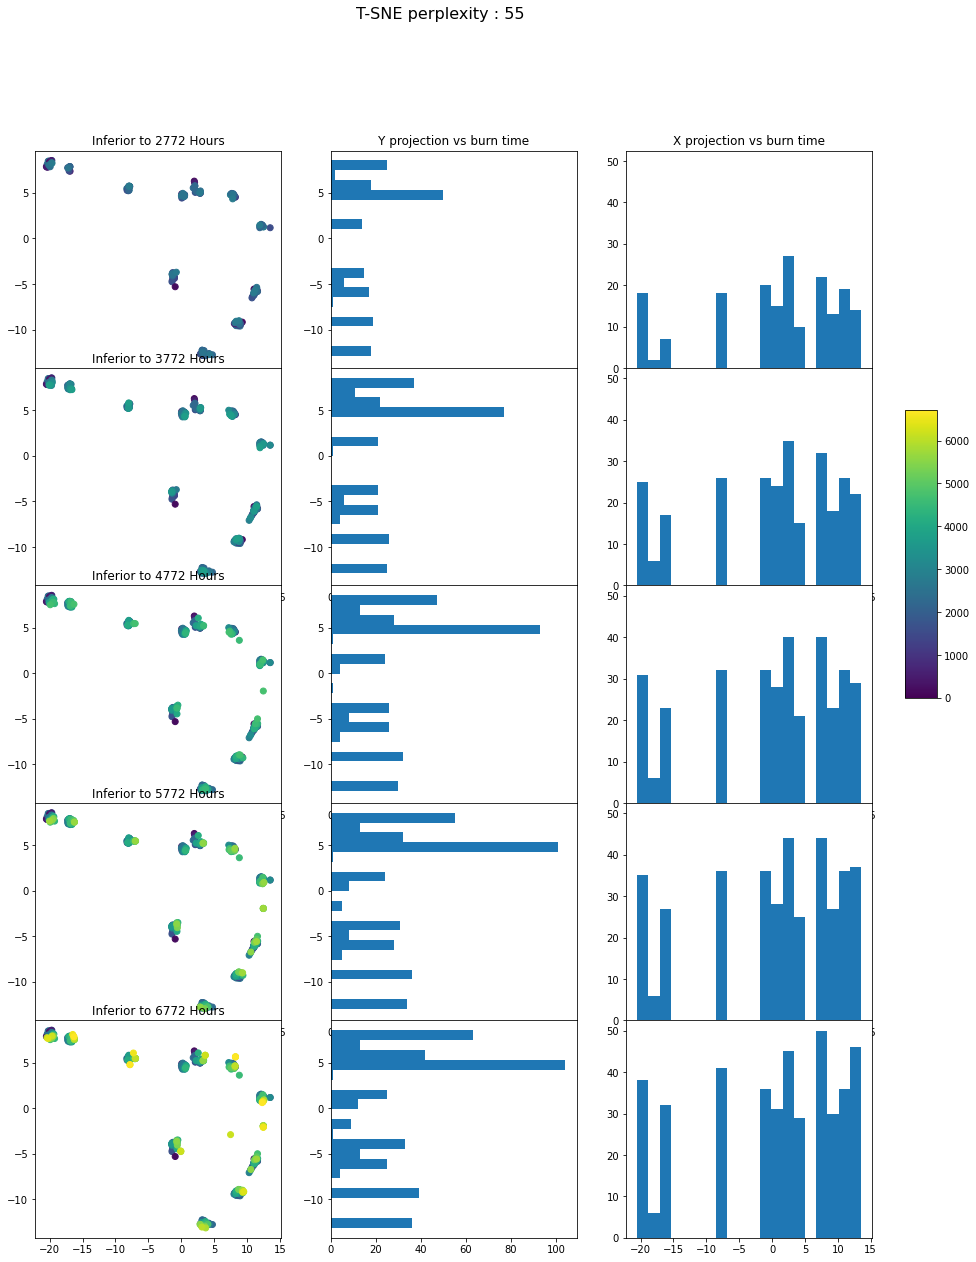

<Figure size 1080x1080 with 0 Axes>

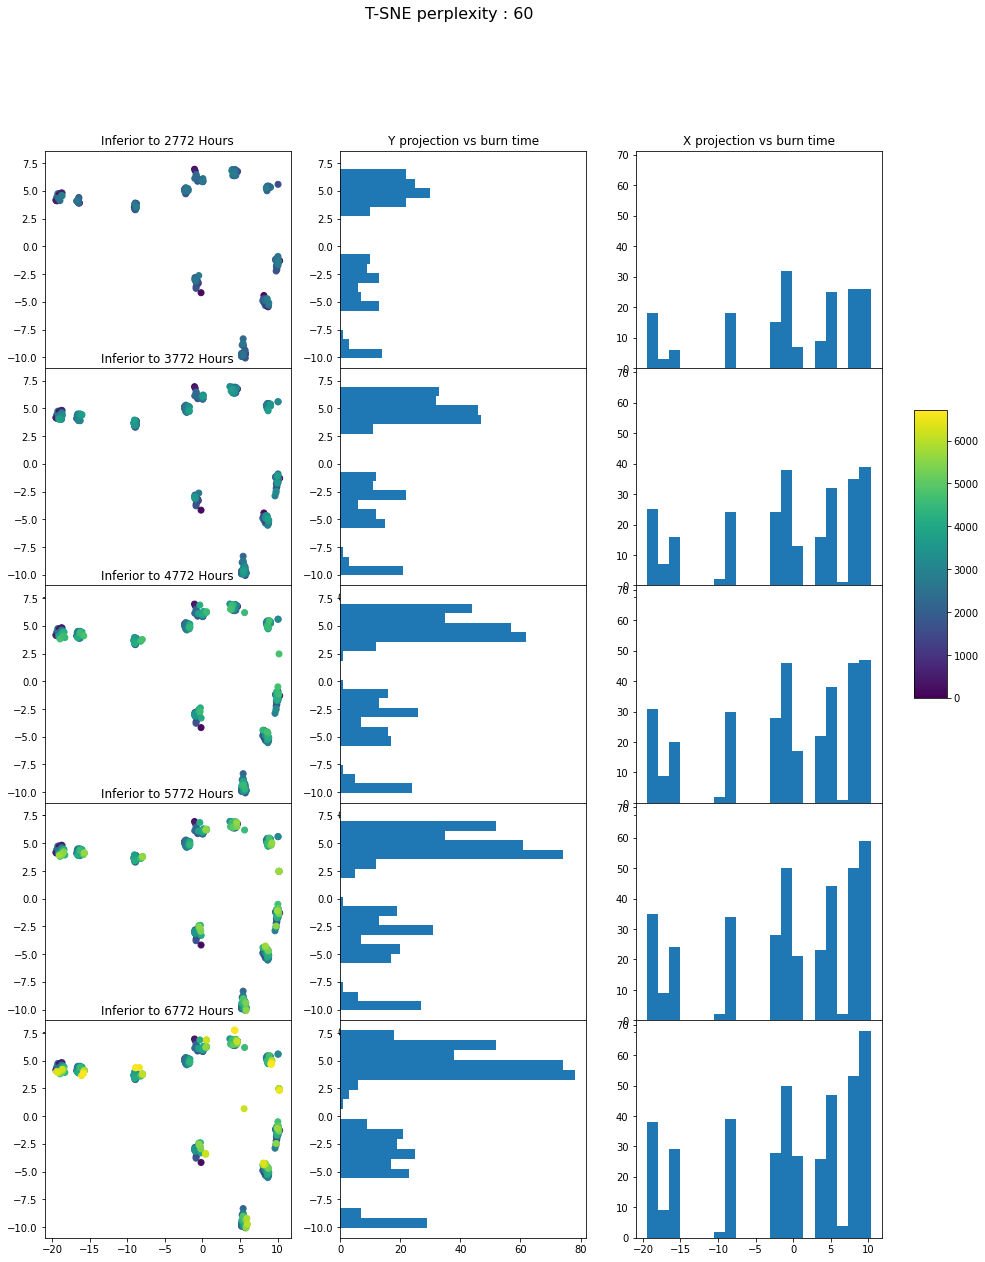

In [18]:
# Define the burning time values as a NumPy array
burning_times = FENICS[('Board','burnTime')].values

perplexities = [5,10,15,20,25,30,35,40,45,50,55,60]
for perplexity in perplexities :
    FATL.FenTSNE(Slow, burning_times,perplexity=perplexity,random_state=80,n_iter=20000,thresholds=[2772,3772,4772,5772,6772],superior=False)

<Figure size 1080x1080 with 0 Axes>

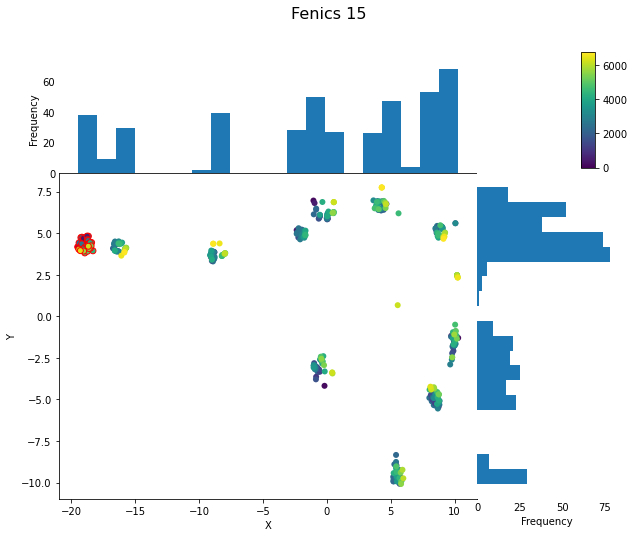

<Figure size 1080x1080 with 0 Axes>

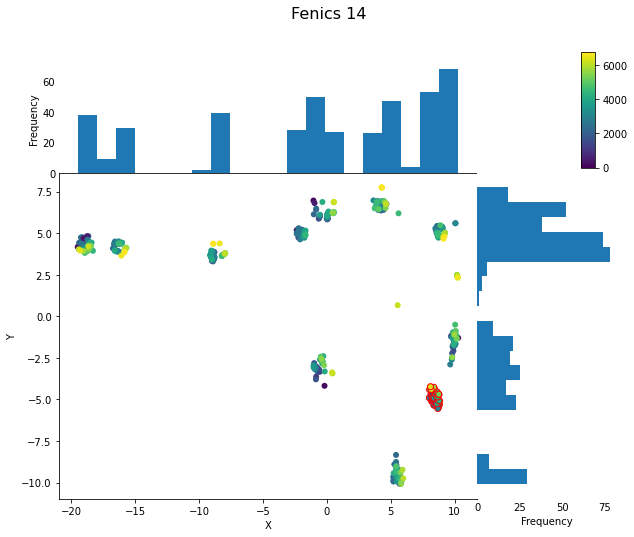

<Figure size 1080x1080 with 0 Axes>

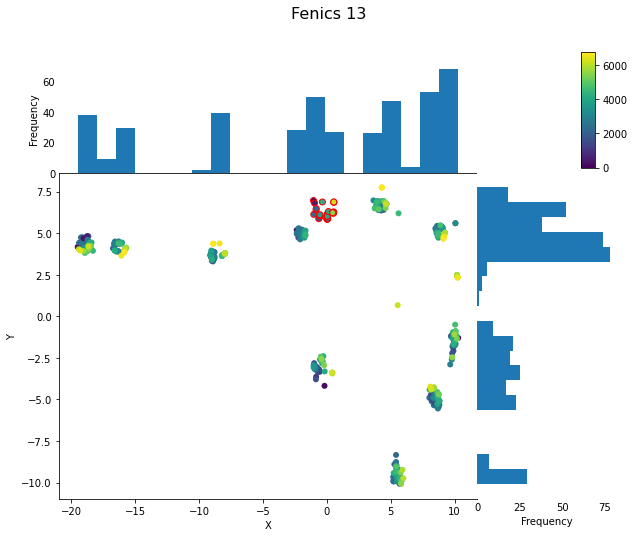

<Figure size 1080x1080 with 0 Axes>

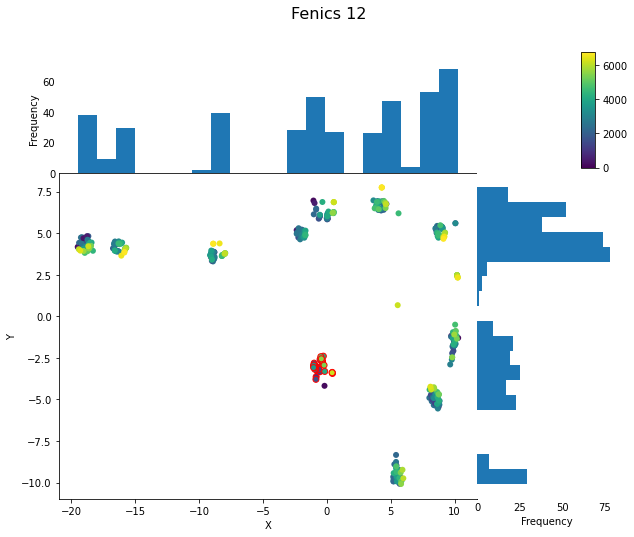

<Figure size 1080x1080 with 0 Axes>

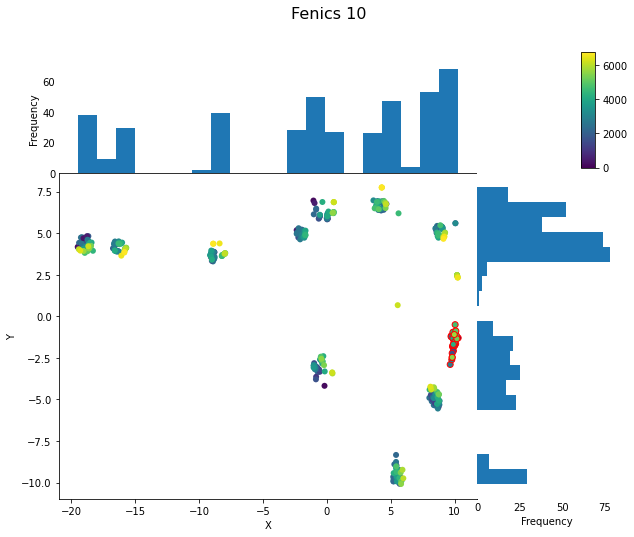

<Figure size 1080x1080 with 0 Axes>

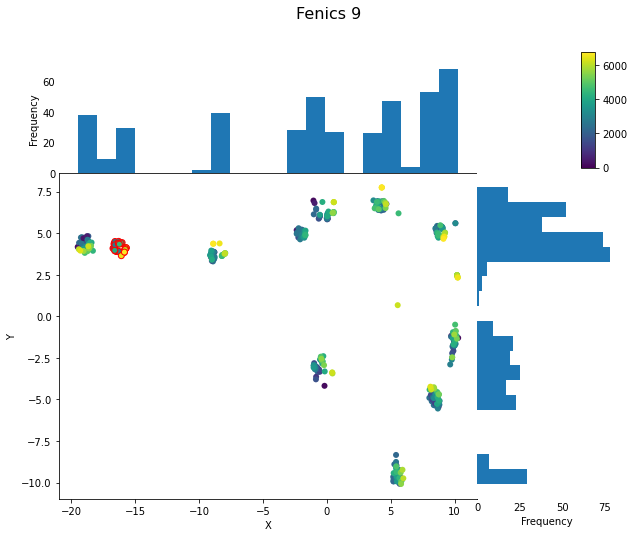

<Figure size 1080x1080 with 0 Axes>

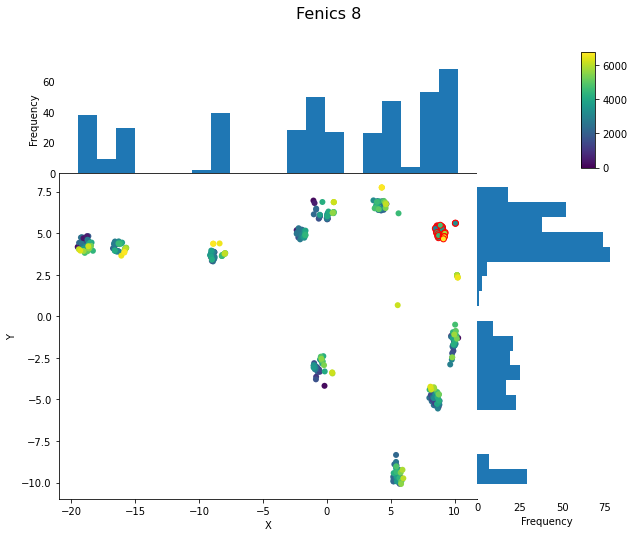

<Figure size 1080x1080 with 0 Axes>

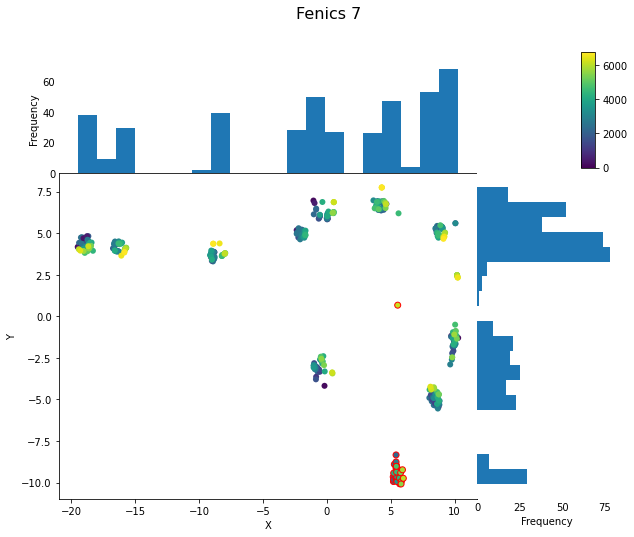

<Figure size 1080x1080 with 0 Axes>

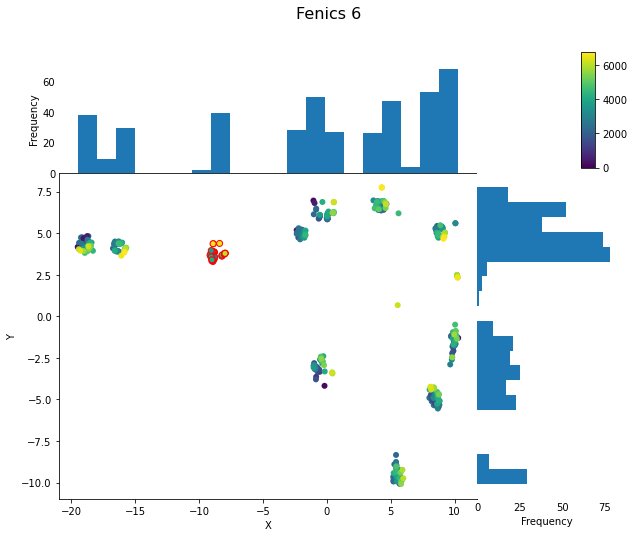

<Figure size 1080x1080 with 0 Axes>

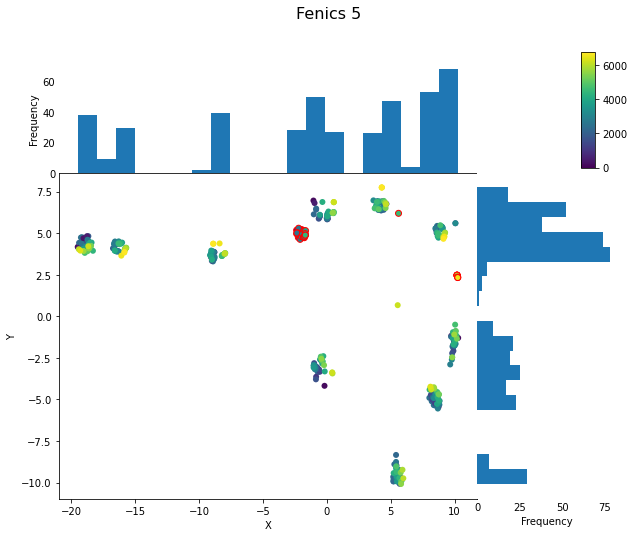

<Figure size 1080x1080 with 0 Axes>

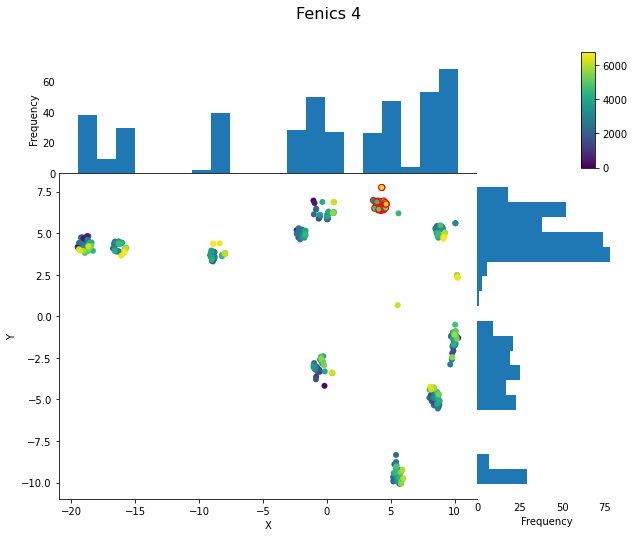

In [19]:
ids = FENICS[('Board','id')].values

for id_filter in filter_id :
    edge_colors = []
    for id in ids:
        if id == id_filter:
            edge_colors.append('red')
        else :
            edge_colors.append('none')
    FATL.FenTSNE(Slow, burning_times,perplexity=60,edge_colors=edge_colors,random_state=80,n_iter=20000,superior=False,title=f'Fenics {id_filter}')

=============================================================
=

**<center><h1>FENICS 2</h1></center>**

=============================================================
=

# **I. Data**

I.1 DataFrame : `Initialization of dataframes / filtring`

In [29]:
FENICS_to_analyse = [29,30,31,32,33,34,35,36,37,38,39,40,1041,1042,1043,1044,1045,1046,1047]
filter_id = [29,30,31,32,33,34,35,36,37,38,39,40,1041,1042,1043,1044,1045,1046,1047]

FENICS2 = FATL.FenicsVers_filter(FATL.FenicsData_read('/AtlasDisk/home2/sisaid/data/FENICS2_data.json'),
                                FENICS_to_analyse ,index=True)

FENICS2 = FENICS2[FENICS2.Board.burnTime.notna()]

temp_allindex = []
for id in FENICS_to_analyse :
    temp_index = FENICS2[FENICS2.Board.id == id][FENICS2.Board.channel == FENICS2[FENICS2.Board.id == id].Board.channel.value_counts().index[0]].index.tolist()
    temp_allindex = temp_allindex + temp_index
    
FENICS2 = FENICS2.loc[temp_allindex]

Fast2 = FATL.FenicsTestTable(FENICS2,'fast')
Slow2 = FATL.FenicsTestTable(FENICS2,'slow')

I.1 DataFrame : `Visualization`

In [27]:
FENICS2[FENICS2.Board.id == 29]

Board                                                                     \
      name version  id code burnings burnTime        date   time specialTests   
2   FENICS       2  29  NaN      NaN    336.0  2021-10-19  16:18         None   
3   FENICS       2  29  NaN      NaN    476.0  2021-10-27  10:30         None   
4   FENICS       2  29  NaN      NaN    619.0  2021-11-02  14:26         None   
5   FENICS       2  29  NaN      NaN    803.0  2021-11-10  10:25         None   
6   FENICS       2  29  NaN      NaN    968.0  2021-11-17  10:39         None   
7   FENICS       2  29  NaN      NaN   1204.0  2021-11-29  12:55         None   
8   FENICS       2  29  NaN      NaN   1390.0  2021-12-07  17:00         None   
9   FENICS       2  29  NaN      NaN   1552.0  2021-12-16  13:36         None   
11  FENICS       2  29  NaN      NaN   1552.0  2022-02-11  11:55         None   
12  FENICS       2  29  NaN      NaN   1712.0  2022-02-23  11:20         None   
13  FENICS       2  29  NaN      NaN   1877.0  2022-03-02  12:35         None   
14  FENICS       2  29  NaN      NaN   1998.0  2022-03-09  13:40         None   
15  FENICS       2  29  NaN      NaN   1998.0  2022-03-29  15:30         None   
16  FENICS       2  29  NaN      NaN   2189.0  2022-04-13  10:50         None   
17  FENICS       2  29  NaN      NaN   2189.0  2022-04-13  11:40         None   
18  FENICS       2  29  NaN      NaN   2356.0  2022-04-20  13:50         None   
19  FENICS       2  29  NaN      NaN   2520.0  2022-04-29  08:30         None   
20  FENICS       2  29  NaN      NaN   2688.0  2022-05-06  11:34         None   
21  FENICS       2  29  NaN      NaN   2879.0  2022-05-17  14:50         None   
22  FENICS       2  29  NaN      NaN   3065.0  2022-05-30  10:20         None   
23  FENICS       2  29  NaN      NaN   3326.0  2022-06-10  09:15         None   
24  FENICS       2  29  NaN      NaN   3499.0  2022-06-20  10:10         None   
25  FENICS       2  29  NaN      NaN   3499.0  2022-10-13  13:45         None   
26  FENICS       2  29  NaN      NaN   3683.0  2022-10-21  10:54         None   
27  FENICS       2  29  NaN      NaN   3828.0  2022-10-27  17:20         None   
28  FENICS       2  29  NaN      NaN   4154.0  2022-11-10  11:13         None   
29  FENICS       2  29  NaN      NaN   4340.0  2022-11-18  14:20         None   
30  FENICS       2  29  NaN      NaN   4572.0  2022-11-28  10:27         None   
31  FENICS       2  29  NaN      NaN   4781.0  2022-12-07  10:14         None   
32  FENICS       2  29  NaN      NaN   4991.0  2022-12-16  10:30         None   
33  FENICS       2  29  NaN      NaN   4991.0  2023-01-03  15:05         None   
34  FENICS       2  29  NaN      NaN   5151.0  2023-01-10  11:08         None   
35  FENICS       2  29  NaN      NaN   5335.0  2023-01-18  10:15         None   
36  FENICS       2  29  NaN      NaN   5496.0  2023-01-25  10:25         None   
37  FENICS       2  29  NaN      NaN   5680.0  2023-02-02  09:54         None   
38  FENICS       2  29  NaN      NaN   5839.0  2023-02-09  10:14         None   
39  FENICS       2  29  NaN      NaN   6148.0  2023-02-22  15:34         None   

            ...                                         FastResult  \
   channel  ...                                            NoiseLG   
2        0  ...  {'Mu': 96.2836153016675, 'Sigma': 1.0866260714...   
3        0  ...  {'Mu': 96.26603093747929, 'Sigma': 1.089068501...   
4        0  ...  {'Mu': 96.64909067540982, 'Sigma': 1.083926427...   
5        0  ...  {'Mu': 96.64137428037188, 'Sigma': 1.083232846...   
6        0  ...  {'Mu': 96.5507256124804, 'Sigma': 1.0783324407...   
7        0  ...  {'Mu': 96.64339425475995, 'Sigma': 1.089760437...   
8        0  ...  {'Mu': 96.21440795415252, 'Sigma': 1.091171588...   
9        0  ...  {'Mu': 96.47773280166577, 'Sigma': 1.092359068...   
11       0  ...  {'Mu': 96.3942007568715, 'Sigma': 1.0886478240...   
12       0  ...  {'Mu': 96.36077197772342, 'Sigma': 1.085343216...   
13   

In [ ]:
Fast2.head(10)

In [ ]:
Slow2.head(10)

# **II. Statistics**

I.1 Macro statistics  : `Calculations`

In [16]:
descriptions = {}
for progress,id in enumerate(filter_id) :
    id_filter = FENICS2[FENICS2.Board.id == id].index
    descriptions [id] = Fast2.loc[id_filter].describe()
    FATL.loadingBar(progress,len(filter_id),suffix='FENICS 2 '+str(id))

|                                                  | progress: 100%                                                     DONE 


# **III. Basic plots**

III.1 Data jitter : `Plots`

In [12]:
for progress,columns in enumerate(Fast2.columns) :
    FATL.FenSpread(FENICS2,Fast2,columns,filter_id,path ='/users/divers/atlas/sisaid/home2/test/dataSpreader/fast',burns = True)
    FATL.loadingBar(progress,len(Fast2.columns),suffix=str(columns))
    
for progress,columns in enumerate(Slow2.columns) :
    FATL.FenSpread(FENICS2,Slow2,columns,filter_id,path ='/users/divers/atlas/sisaid/home2/test/dataSpreader/slow',burns = True)
    FATL.loadingBar(progress,len(Slow2.columns),suffix=str(columns))


Created folder at /users/divers/atlas/sisaid/home2/test/dataSpreader/fast
|                                                  | progress: 100%                                                     DONE 
Created folder at /users/divers/atlas/sisaid/home2/test/dataSpreader/slow
|                                                  | progress: 100%                                                     DONE 


III.2 BurnTime evolution plots  : `Plots`

In [20]:
for progress,columns in enumerate(Fast2.columns):
    FATL.FenBurnEvol(FENICS2,Fast2,columns,filter_id,separate = True,LR=True,unique=True
                           ,path ='/users/divers/atlas/sisaid/home2/fen2_output/burnTimeEvolution_unique/fast')
    FATL.loadingBar(progress,len(Fast2.columns),suffix=str(columns))


for progress,columns in enumerate(Slow2.columns):
    FATL.FenBurnEvol(FENICS2,Slow2,columns,filter_id,separate = True,LR=True,unique=True
                           ,path ='/users/divers/atlas/sisaid/home2/fen2_output/burnTimeEvolution_unique/slow')
    FATL.loadingBar(progress,len(Slow2.columns),suffix=str(columns))


|                                                  | progress: 100%                                                     DONE 
|                                                  | progress: 100%                                                     DONE 


III.3 Histograms : `Plots`

In [12]:
for progress,columns in enumerate(Fast2.columns):
    FATL.FenHist(FENICS2,Fast2,columns,filter_id,separate = False, sigma=3
                           ,path ='/users/divers/atlas/sisaid/home2/fen2_output/histograms_nsep/fast')
    FATL.loadingBar(progress,len(Fast2.columns),suffix=str(columns))

for progress,columns in enumerate(Slow2.columns):
    FATL.FenHist(FENICS2,Slow2,columns,filter_id,separate = False , sigma=3
                           ,path ='/users/divers/atlas/sisaid/home2/fen2_output/histograms_nsep/slow')
    FATL.loadingBar(progress,len(Slow2.columns),suffix=str(columns))

|                                                  | progress: 100%                                                     DONE 
|                                                  | progress: 100%                                                     DONE 


# **IV. Correlations**

IV.1 Correlations of all features : `Calculations`


In [44]:
corrThreshold = 0.8
corrMatch = {}
for id in filter_id :
    corrMatch[id] = (Fast2.loc[FENICS2[FENICS2.Board.id==id].index].corr()>corrThreshold).sum().sum()

In [45]:
corrMatch

{29: 361,
 30: 283,
 31: 502,
 32: 503,
 33: 430,
 34: 463,
 35: 434,
 36: 508,
 37: 564,
 38: 473,
 39: 476,
 40: 434,
 1041: 452,
 1042: 417,
 1043: 583,
 1044: 408,
 1045: 300,
 1046: 425,
 1047: 413}

In [46]:
(Fast2.corr()>corrThreshold).sum().sum()

427

IV.2 Correlations of all features : `Plots : w/out burns`


In [51]:

doMultiprocessing = False

corrThreshold = 0.8
def Fenics2Fast2Corr():
    FastCorrFilter = Fast2.corr()>corrThreshold
    for ii in range(len(FastCorrFilter.columns)):
        for jj in range(ii+1, len(FastCorrFilter.columns)):
            if FastCorrFilter.iloc[ii, jj] and FastCorrFilter.columns[ii] != FastCorrFilter.columns[jj]:
                FATL.FenCorr(FENICS2,Fast2,FastCorrFilter.columns[ii],FastCorrFilter.columns[jj]
                                        ,filter_id,LR=False,separate = False, burns=True , burns_filter = None,
                                        path ='/users/divers/atlas/sisaid/home2/fen2_output/correlation_nsep_wburn/fast')
                FATL.loadingBar(ii,len(FastCorrFilter.columns),suffix=str(FastCorrFilter.columns[ii]))

def Fenics2Slow2Corr():
    SlowCorrFilter = Slow2.corr()>corrThreshold
    for ii in range(len(SlowCorrFilter.columns)):
        for jj in range(ii+1, len(SlowCorrFilter.columns)):
            if SlowCorrFilter.iloc[ii, jj] and SlowCorrFilter.columns[ii] != SlowCorrFilter.columns[jj]:
                FATL.FenCorr(FENICS2,Slow2,SlowCorrFilter.columns[ii],SlowCorrFilter.columns[jj],
                                        filter_id,LR=False,separate = False, burns=True, burns_filter = None,
                                        path ='/users/divers/atlas/sisaid/home2/fen2_output/correlation_nsep_wburn/slow')
                FATL.loadingBar(ii,len(SlowCorrFilter.columns),suffix=str(SlowCorrFilter.columns[ii]))

if doMultiprocessing :
    if __name__ == '__main__':
      p1 = Process(target=Fenics2Fast2Corr)
      p1.start()
      p2 = Process(target=Fenics2Slow2Corr)
      p2.start()
      p1.join()
      p2.join()
else :
    Fenics2Fast2Corr()
    Fenics2Slow2Corr()
    doMultiprocessing = False

|                                                  | progress: 100%                                                     DONE 
|                                                  | progress: 100%                                                     DONE 


IV.3.a Correlations per FENICS card of all features : `Plots : w/out burns`

In [ ]:

doMultiprocessing = False

def Fast2CorrPerFenics2():
    for progress,id in enumerate(filter_id) :
        FastCorrFilter = Fast2.loc[FENICS2[FENICS2.Board.id==id].index].corr()>corrThreshold
        for ii in range(len(FastCorrFilter.columns)):
            FATL.loadingBar(progress,len(filter_id),suffix='FENICS2 ' + str(id) +' : '+ str(FastCorrFilter.columns[ii]))
            for jj in range(ii+1, len(FastCorrFilter.columns)):
                if FastCorrFilter.iloc[ii, jj] and FastCorrFilter.columns[ii] != FastCorrFilter.columns[jj]:
                    FATL.FenCorr(FENICS2,Fast2,FastCorrFilter.columns[ii],FastCorrFilter.columns[jj],
                                            [id],burns = True,path =f'/users/divers/atlas/sisaid/home2/fen2_output/correlation_per_id/{str(id)}/fast')
                    FATL.loadingBar(progress,len(filter_id),suffix='FENICS2 ' + str(id) +' : '+ str(FastCorrFilter.columns[ii]))
def Slow2CorrPerFenics2():
    for progress,id in enumerate(filter_id) :                  
        SlowCorrFilter = Slow2.loc[FENICS2[FENICS2.Board.id==id].index].corr()>corrThreshold
        for ii in range(len(SlowCorrFilter.columns)):
            for jj in range(ii+1, len(SlowCorrFilter.columns)):
                if SlowCorrFilter.iloc[ii, jj] and SlowCorrFilter.columns[ii] != SlowCorrFilter.columns[jj]:
                    FATL.FenCorr(FENICS2,Slow2,SlowCorrFilter.columns[ii],SlowCorrFilter.columns[jj],
                                            [id],burns = True,path =f'/users/divers/atlas/sisaid/home2/fen2_output/correlation_per_id/{str(id)}/slow')         
                    FATL.loadingBar(progress,len(filter_id),suffix='FENICS2 ' + str(id) +' : '+ str(SlowCorrFilter.columns[ii]))


if doMultiprocessing :
    if __name__ == '__main__':
      p1 = Process(target=Fast2CorrPerFenics2)
      p1.start()
      p2 = Process(target=Slow2CorrPerFenics2)
      p2.start()
      p1.join()
      p2.join()
      doMultiprocessing = False
else :
    Fast2CorrPerFenics2()
    Slow2CorrPerFenics2()

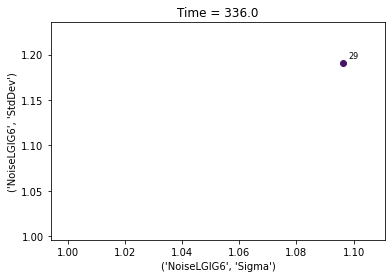

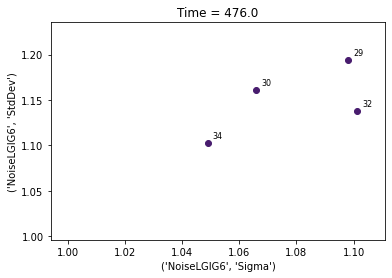

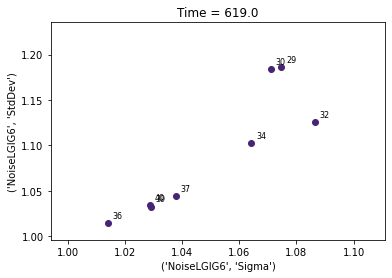

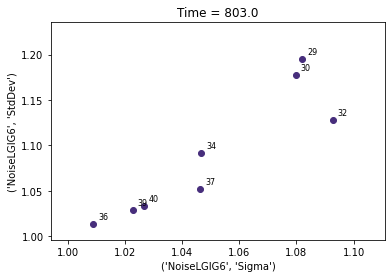

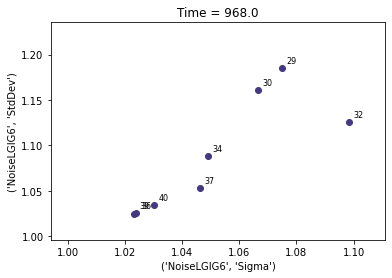

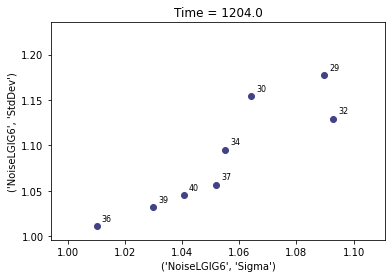

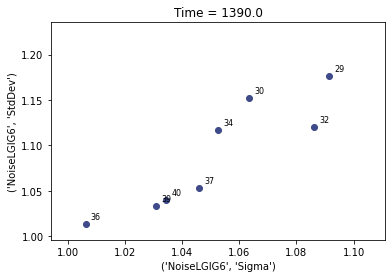

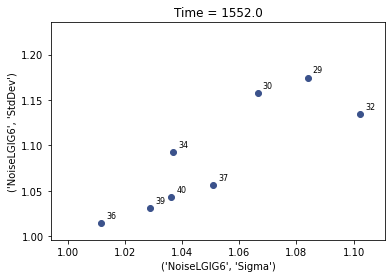

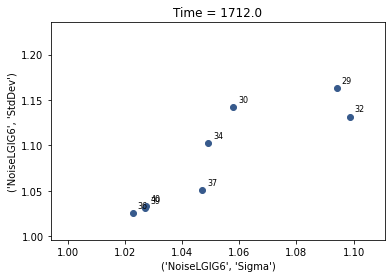

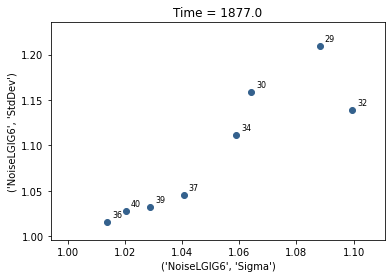

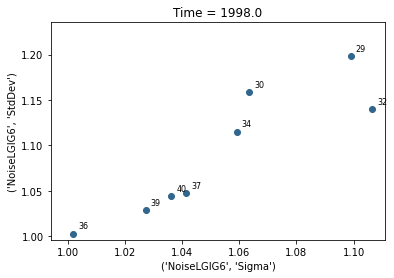

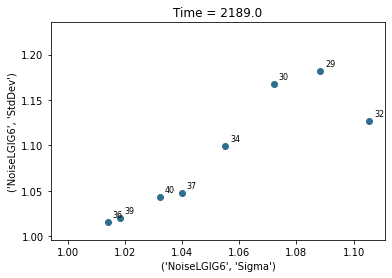

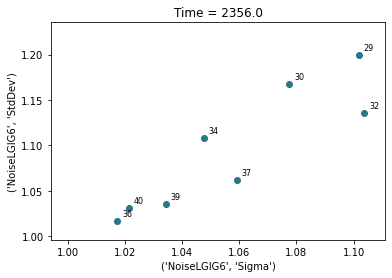

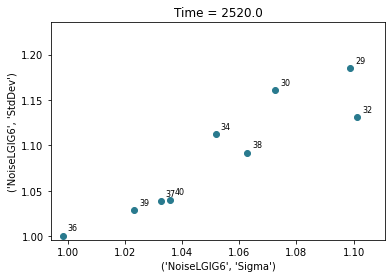

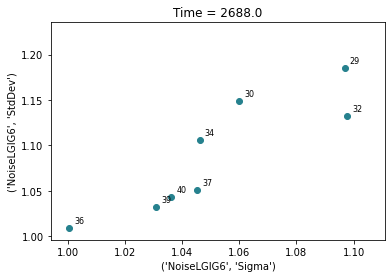

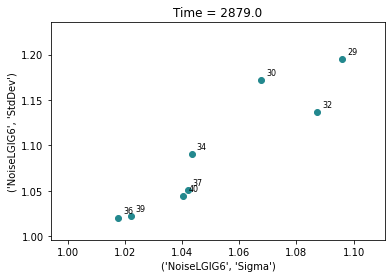

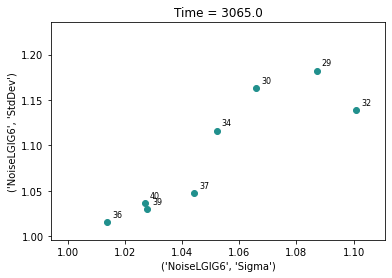

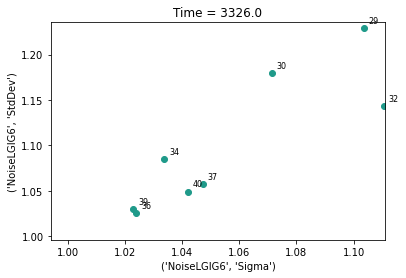

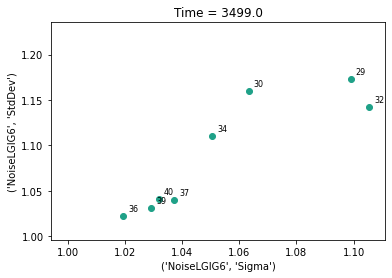

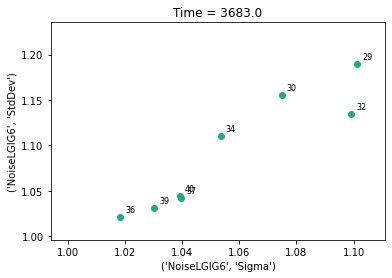

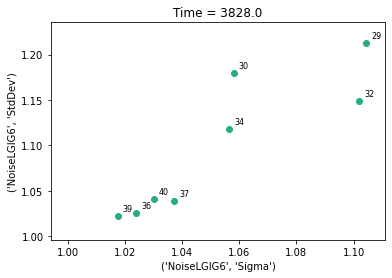

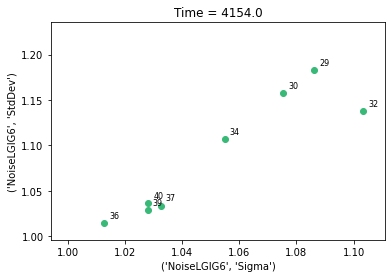

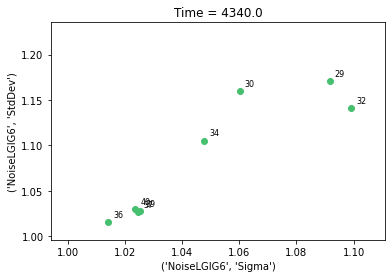

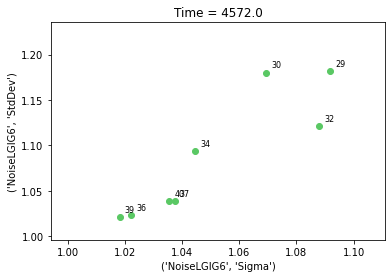

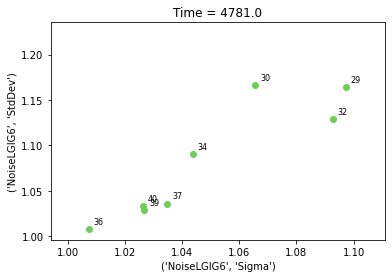

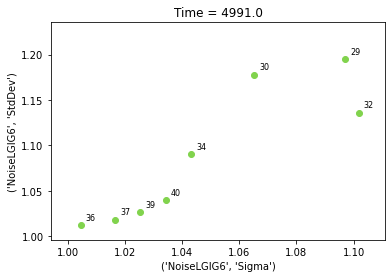

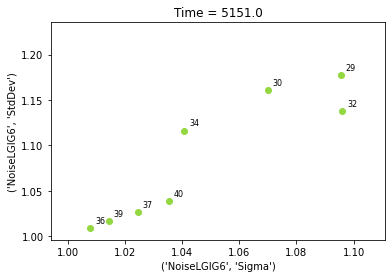

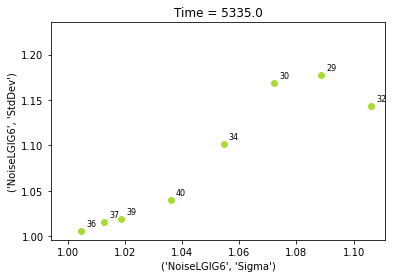

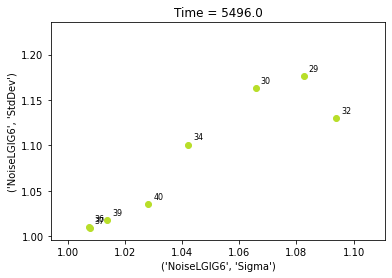

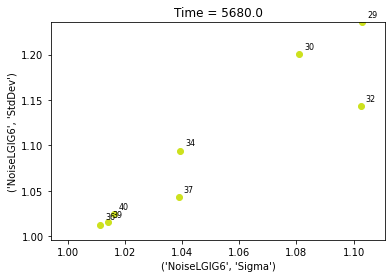

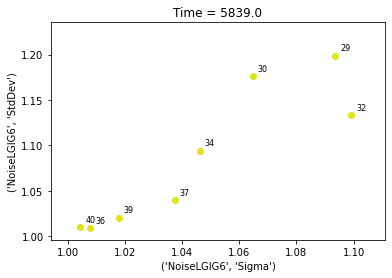

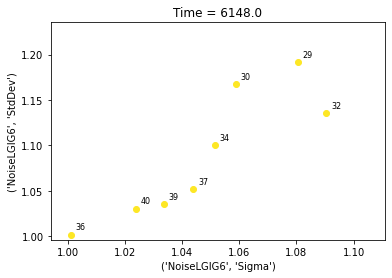

In [7]:
filter_id = [29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
for frame in FENICS2.Board.burnTime[FENICS2.Board.id==29].unique() :
    FATL.FenAnimate(FENICS2,Fast2,filter_id,('NoiseLGIG6','Sigma'),('NoiseLGIG6','StdDev'),frame)

<Figure size 1080x1080 with 0 Axes>

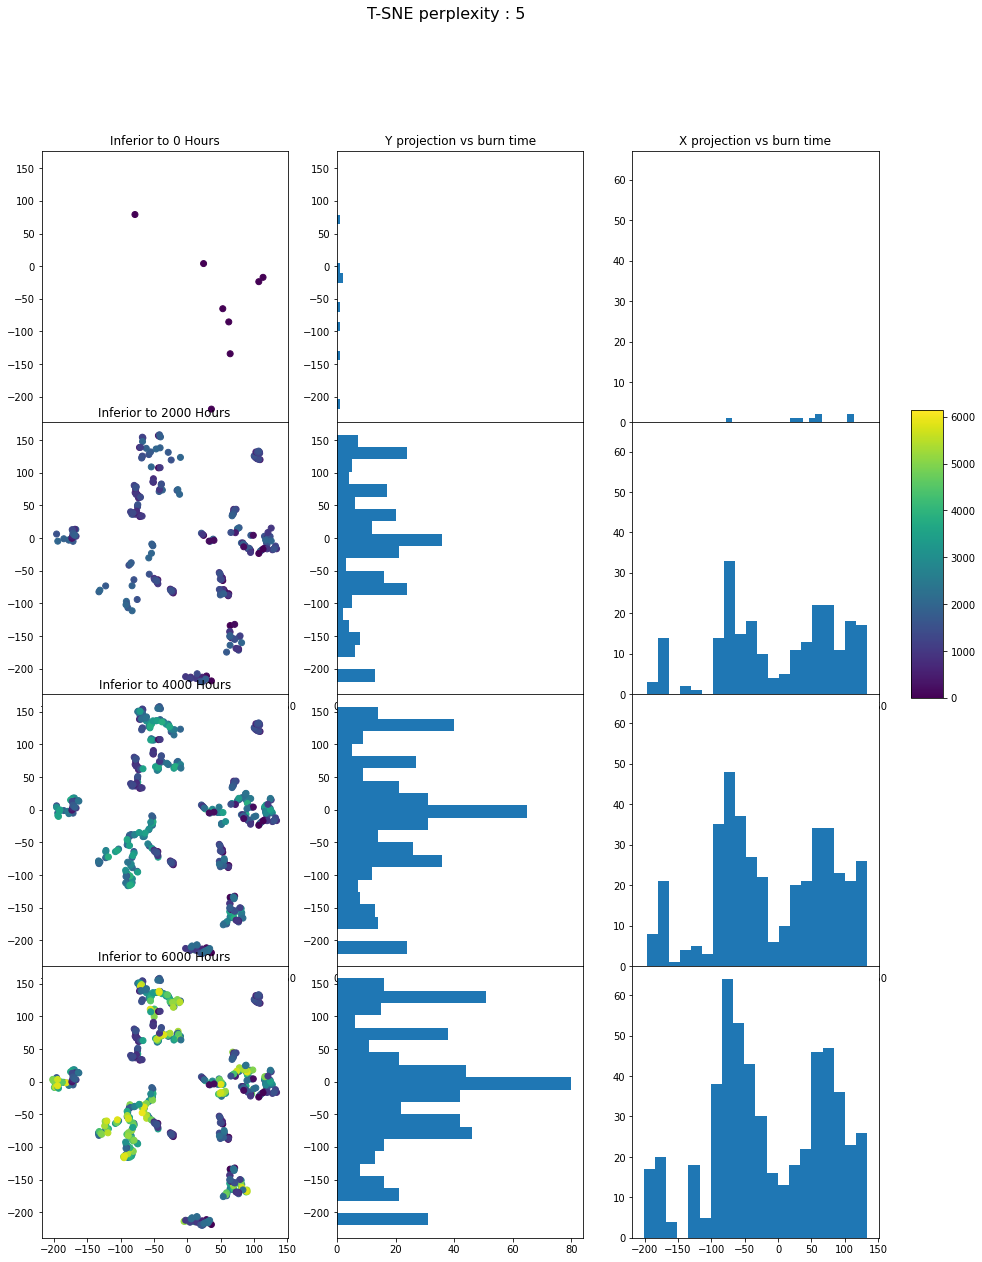

<Figure size 1080x1080 with 0 Axes>

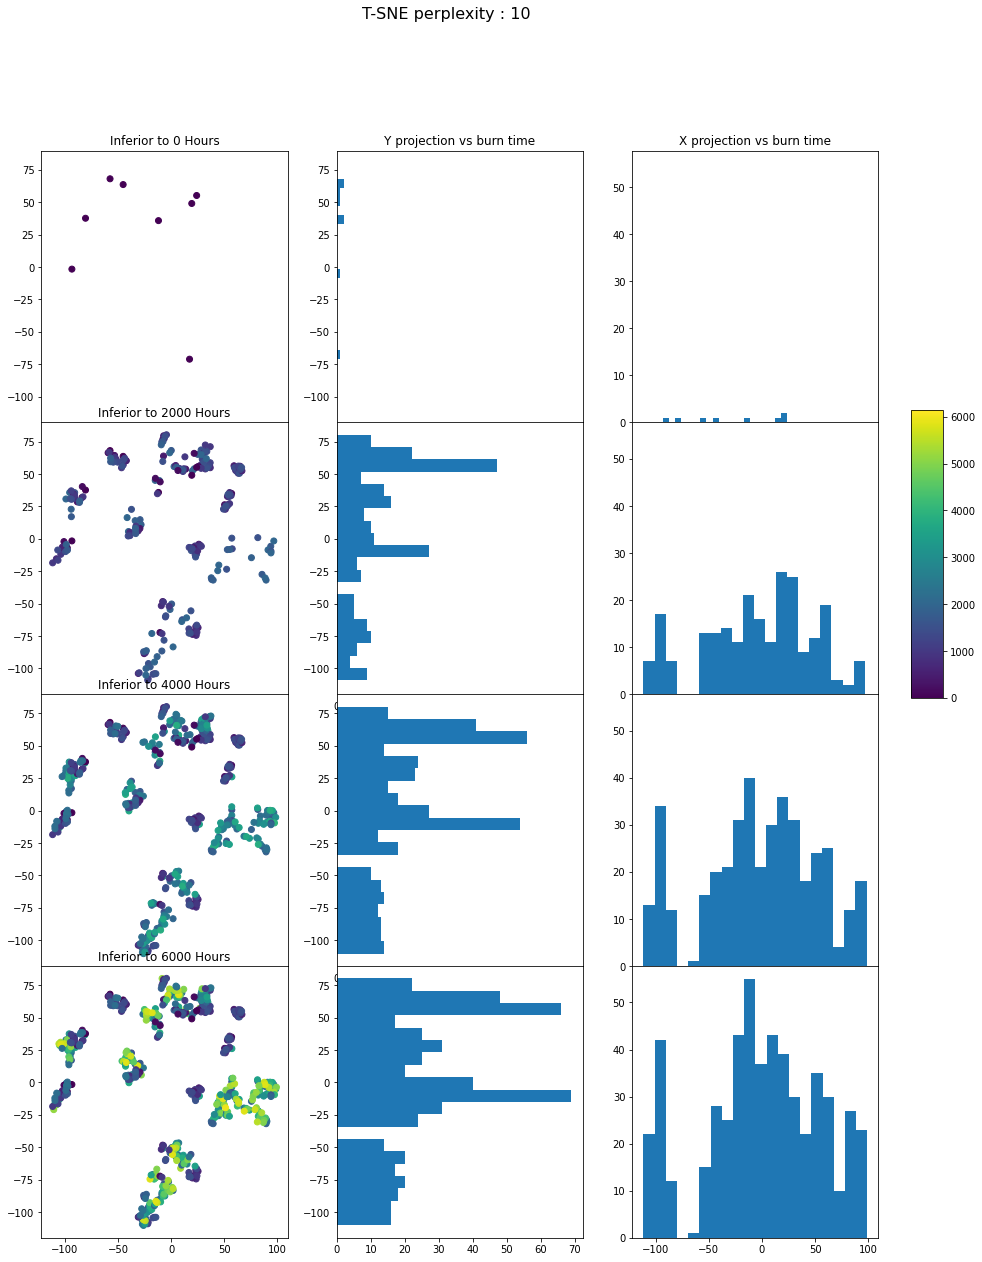

<Figure size 1080x1080 with 0 Axes>

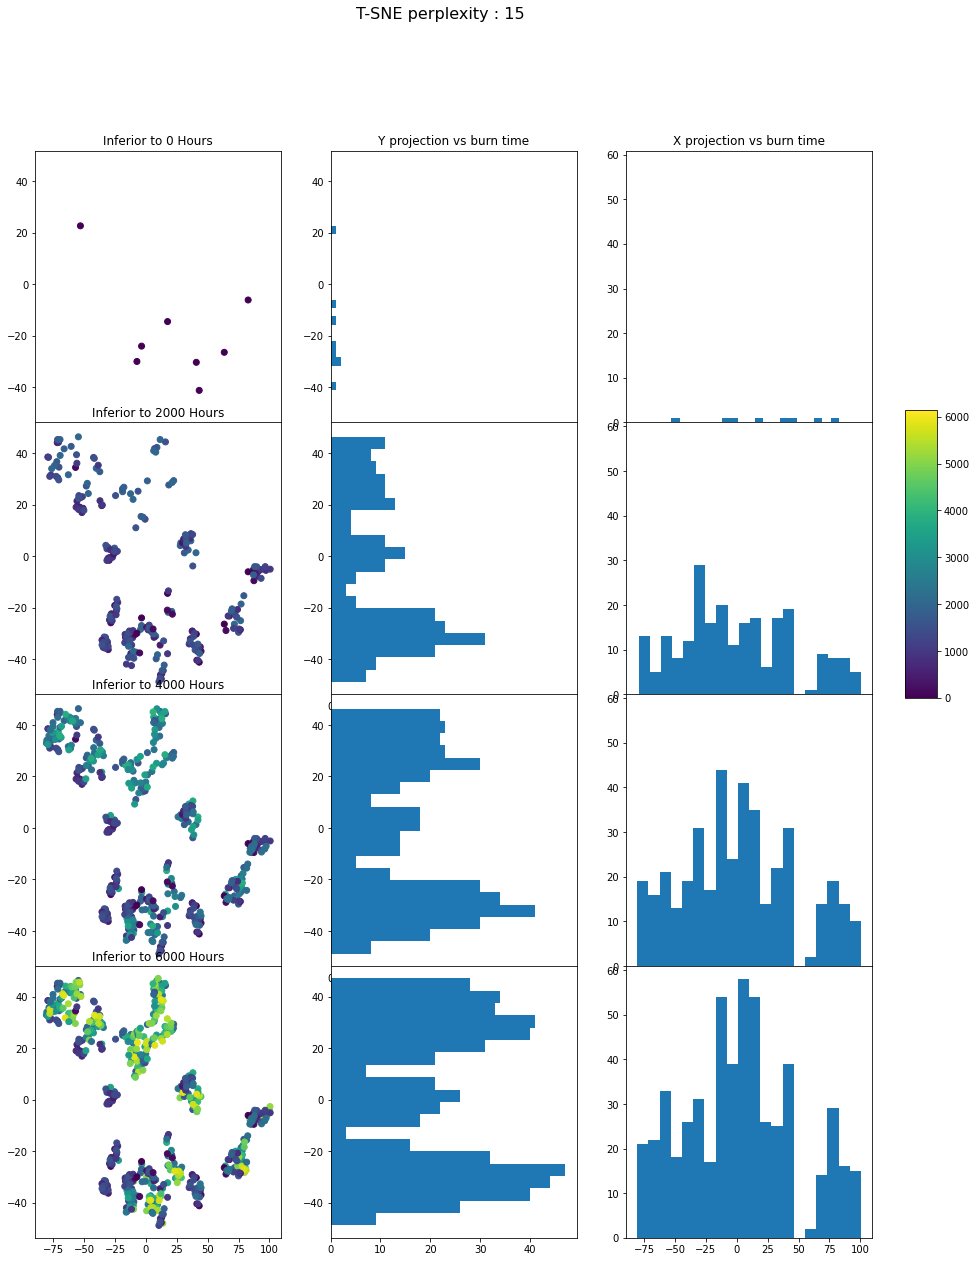

<Figure size 1080x1080 with 0 Axes>

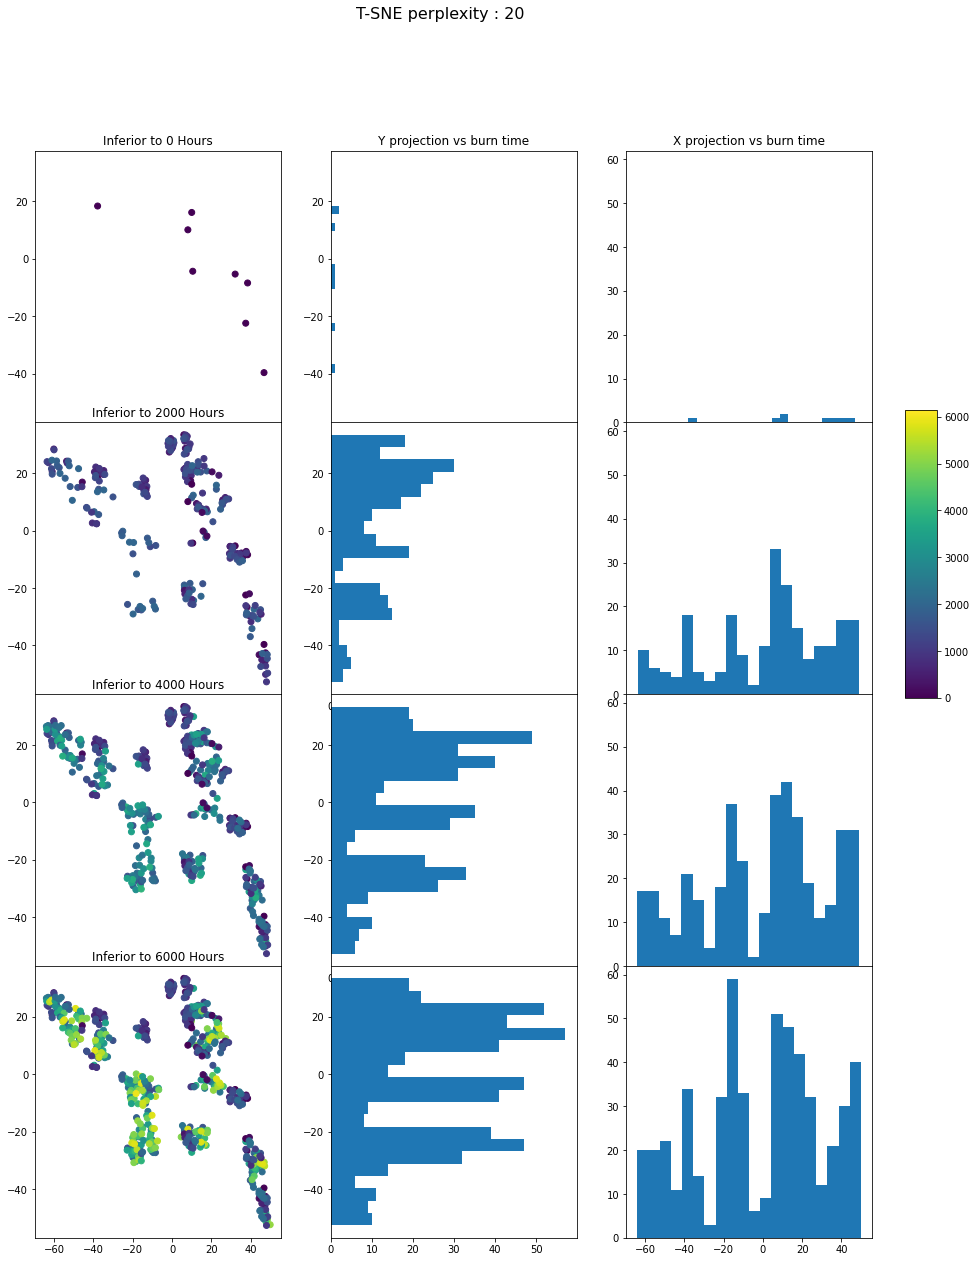

<Figure size 1080x1080 with 0 Axes>

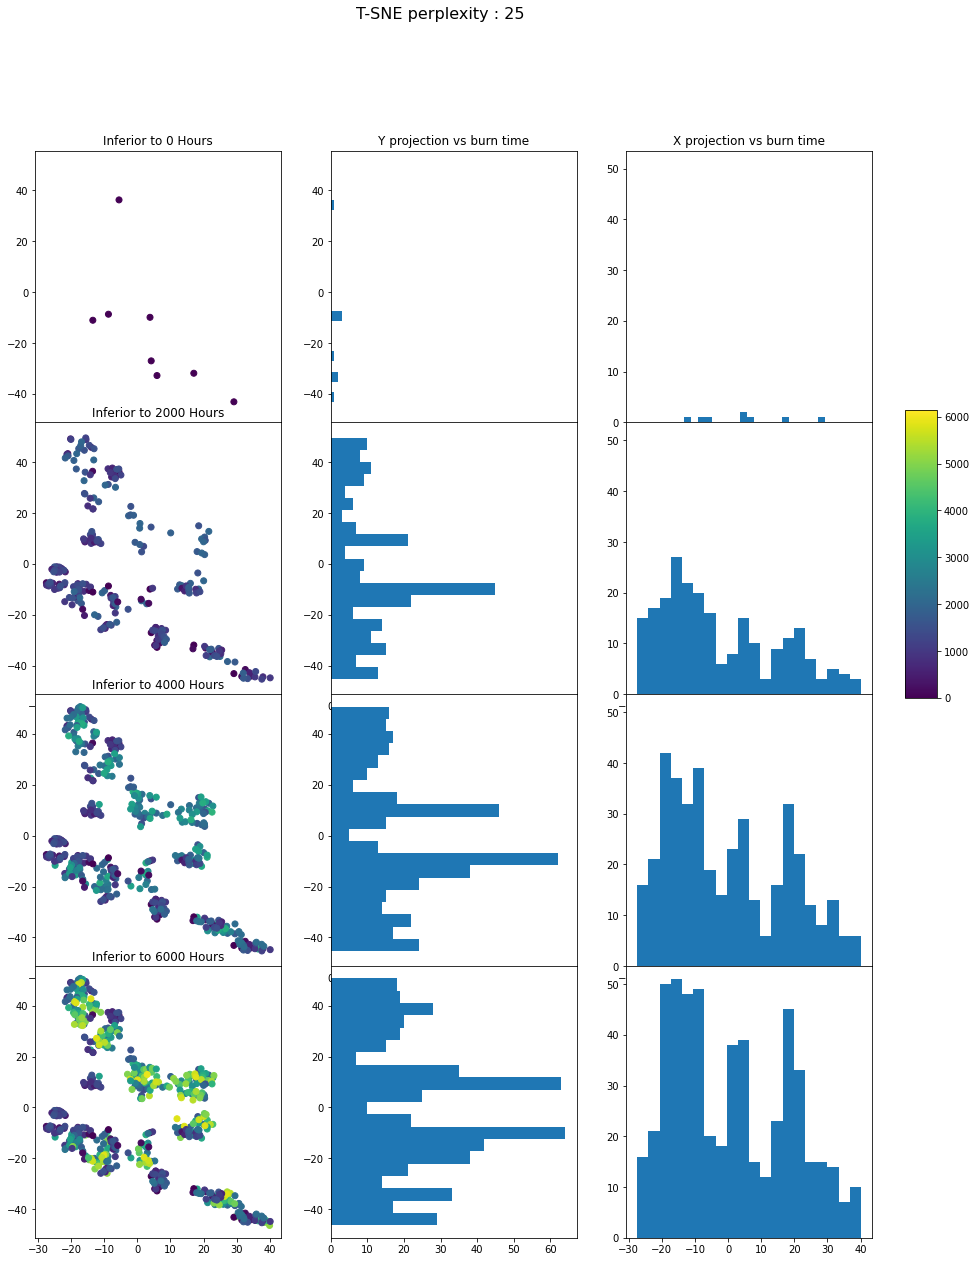

<Figure size 1080x1080 with 0 Axes>

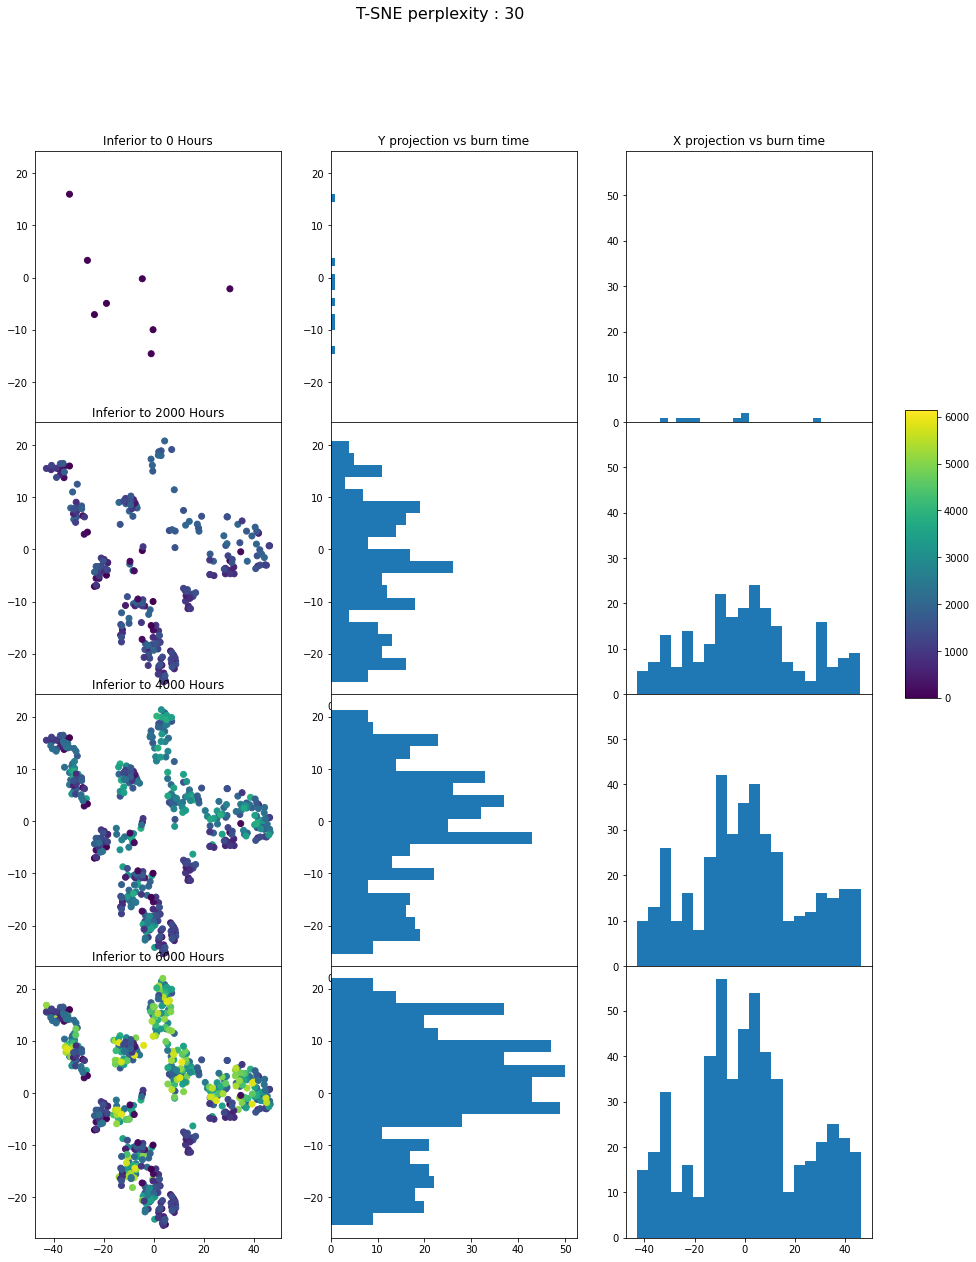

<Figure size 1080x1080 with 0 Axes>

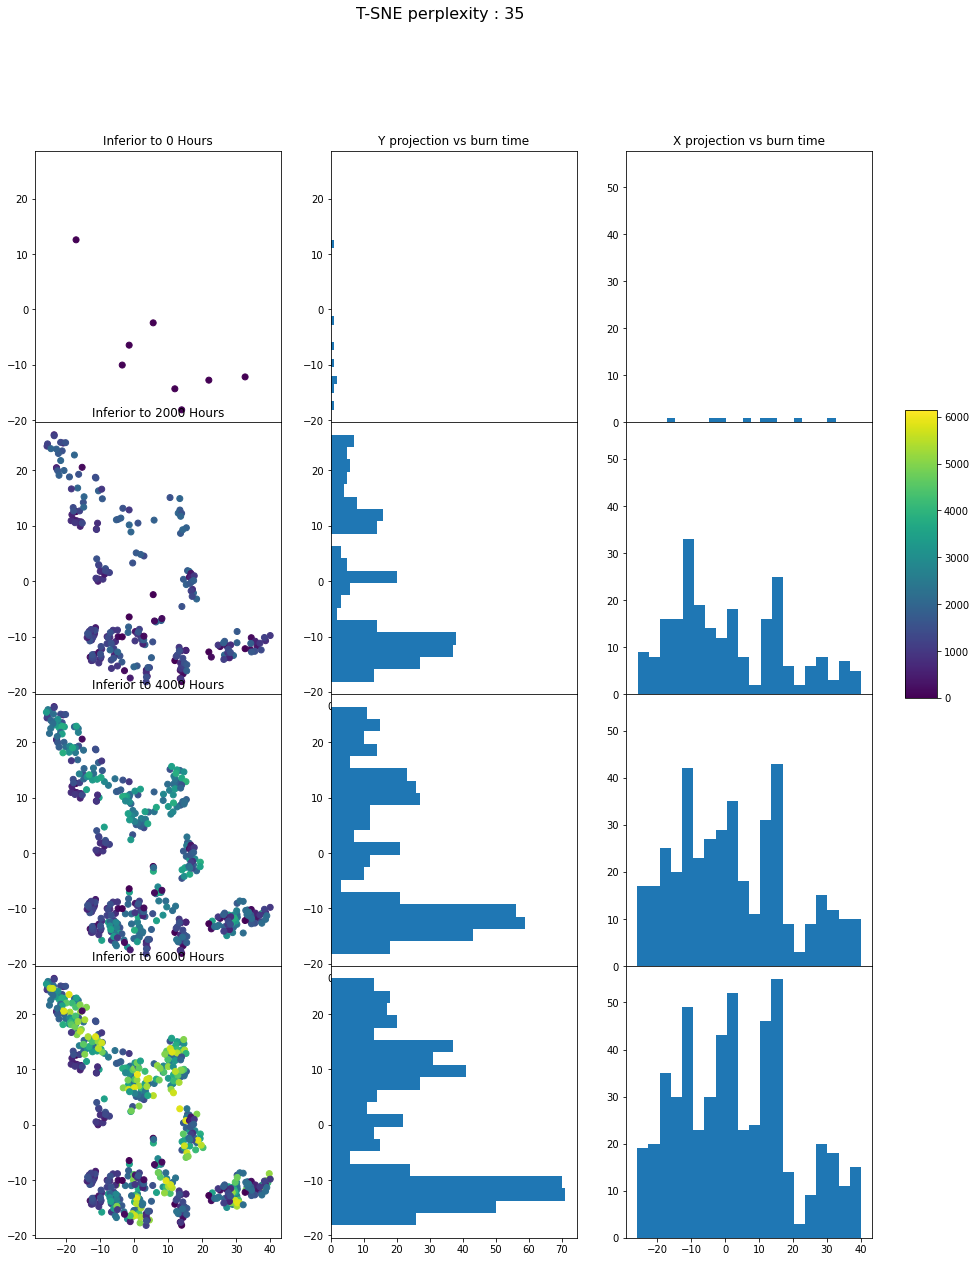

<Figure size 1080x1080 with 0 Axes>

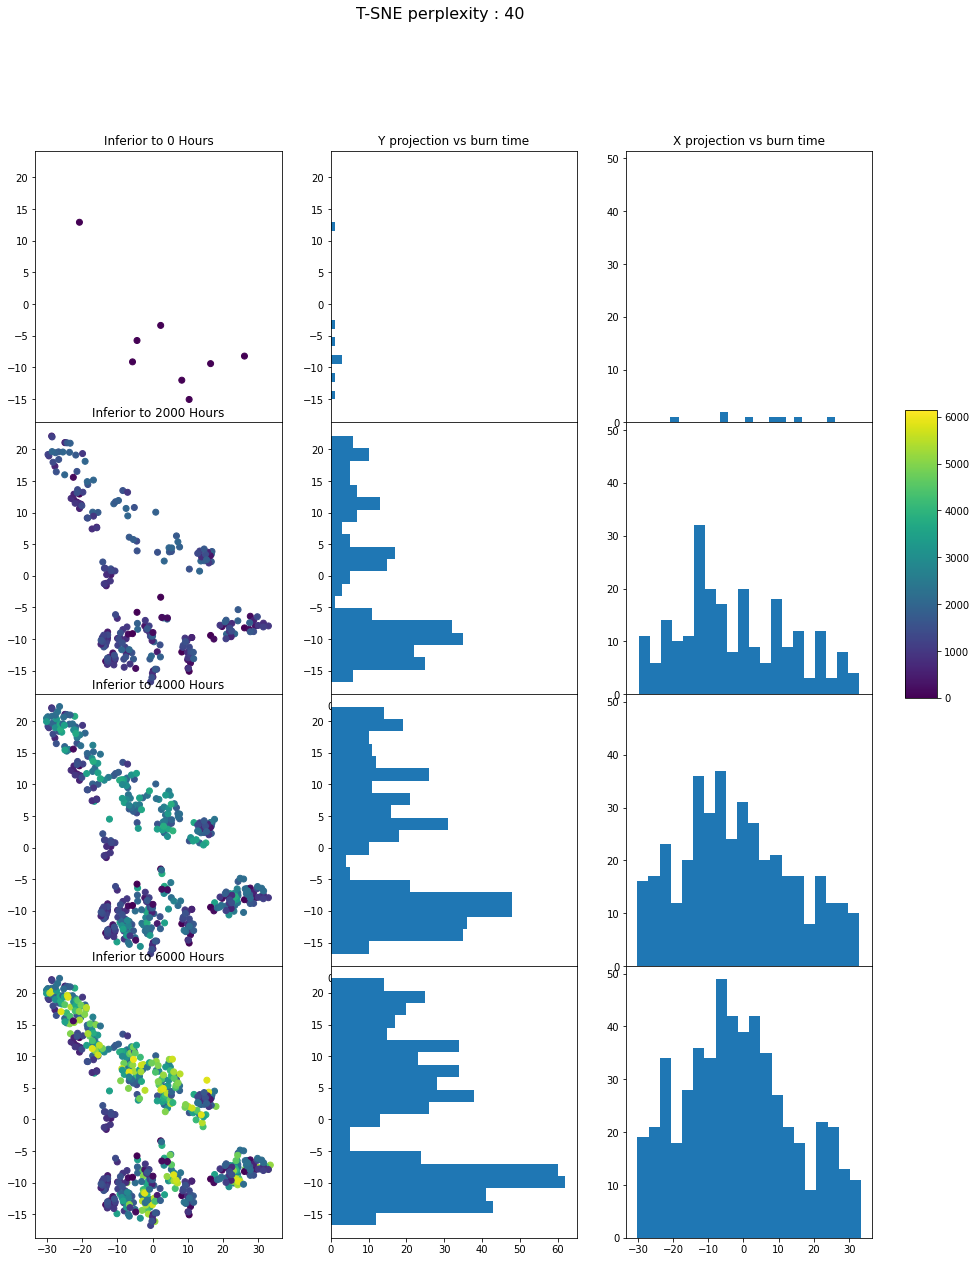

<Figure size 1080x1080 with 0 Axes>

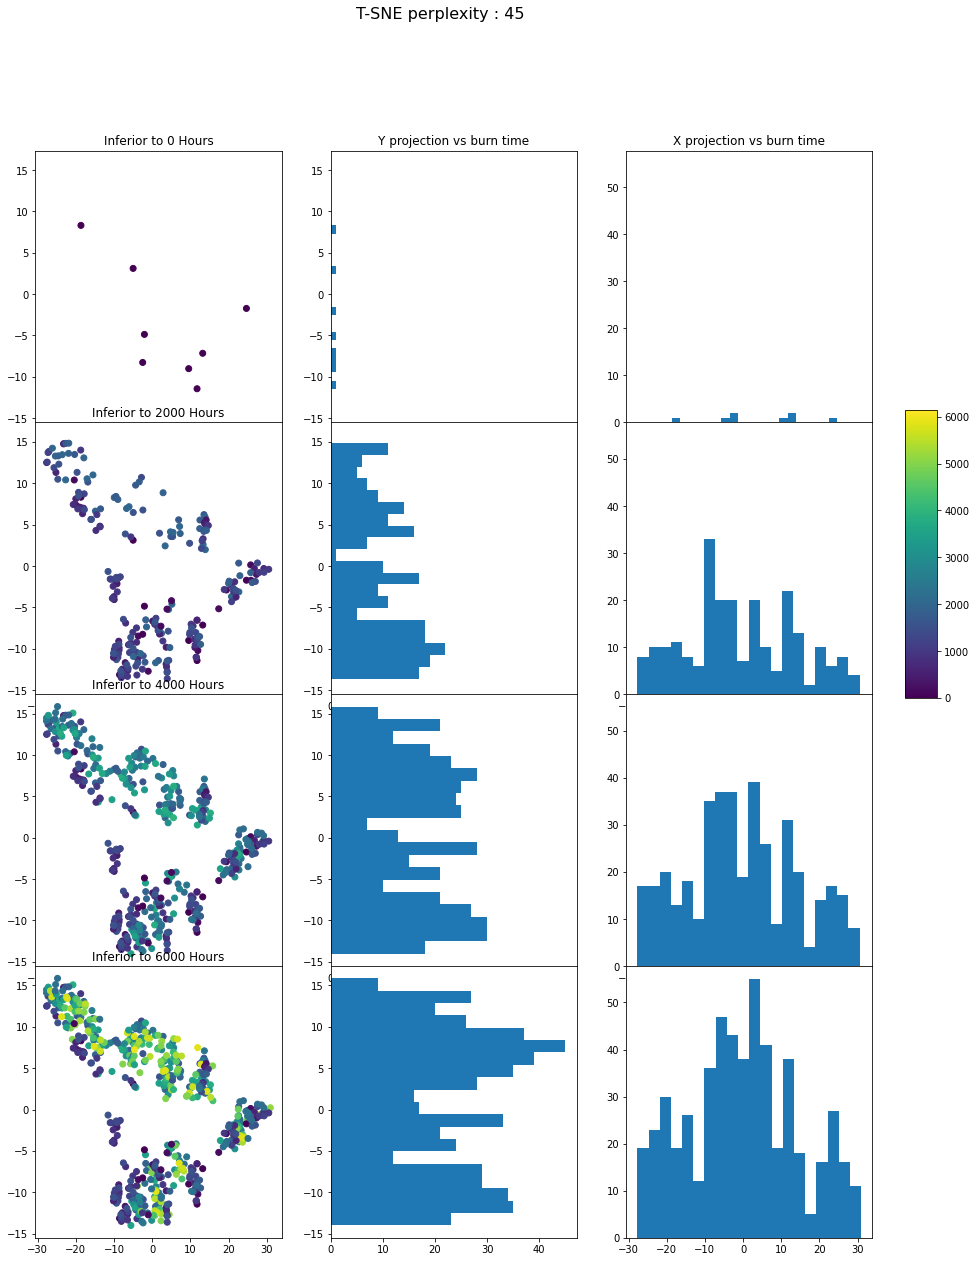

<Figure size 1080x1080 with 0 Axes>

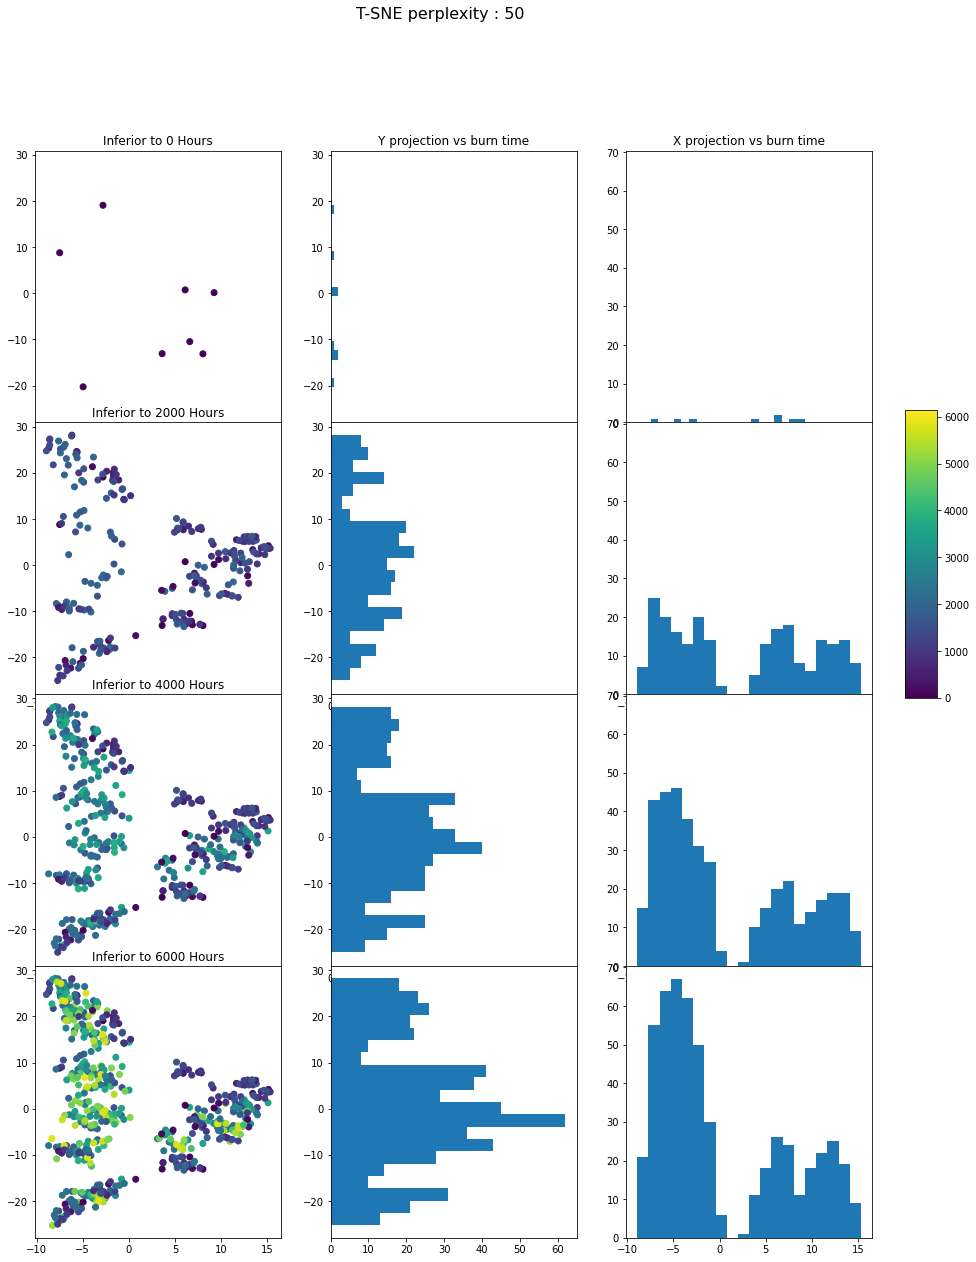

<Figure size 1080x1080 with 0 Axes>

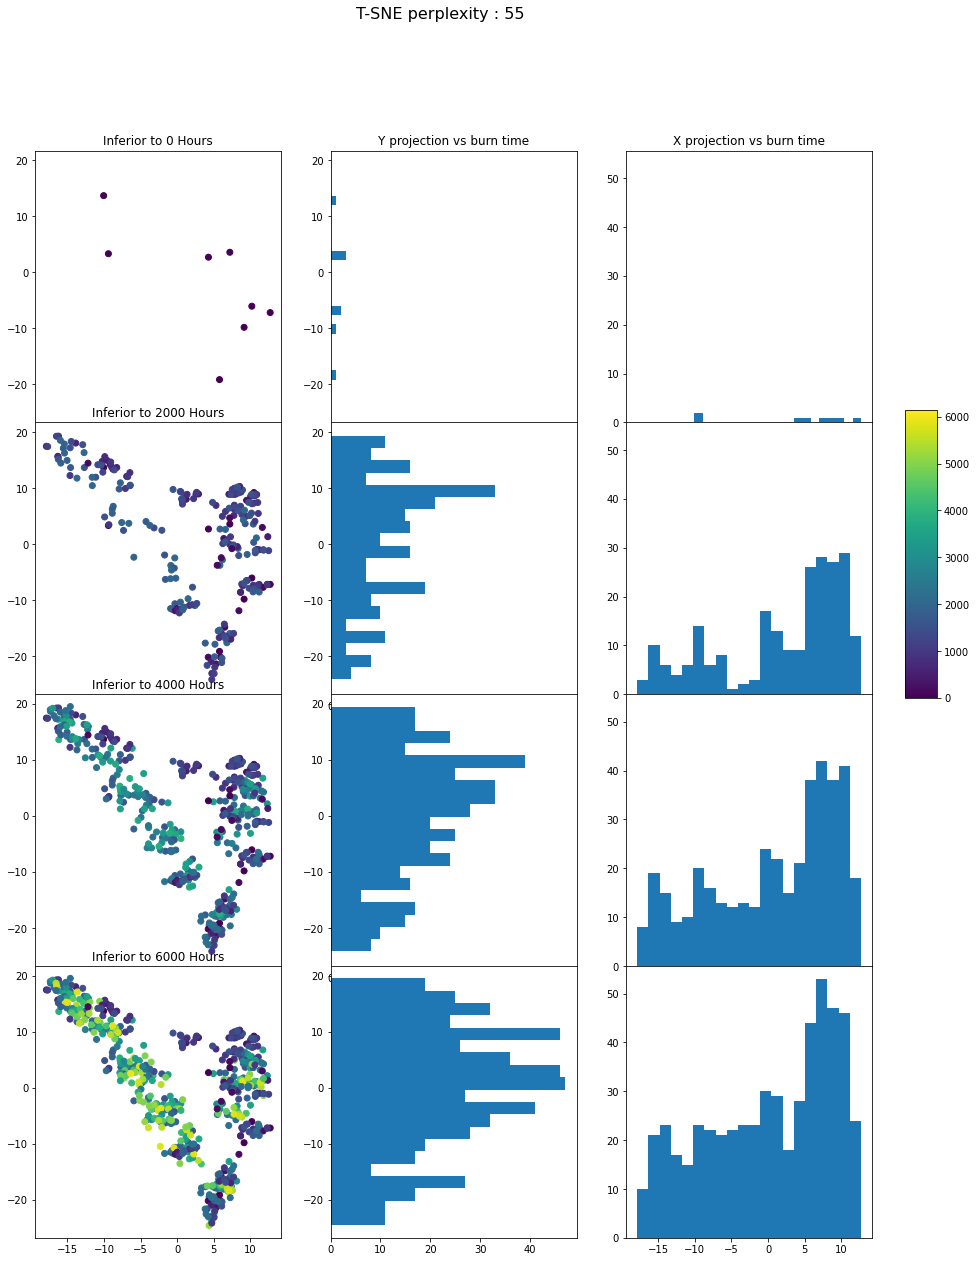

<Figure size 1080x1080 with 0 Axes>

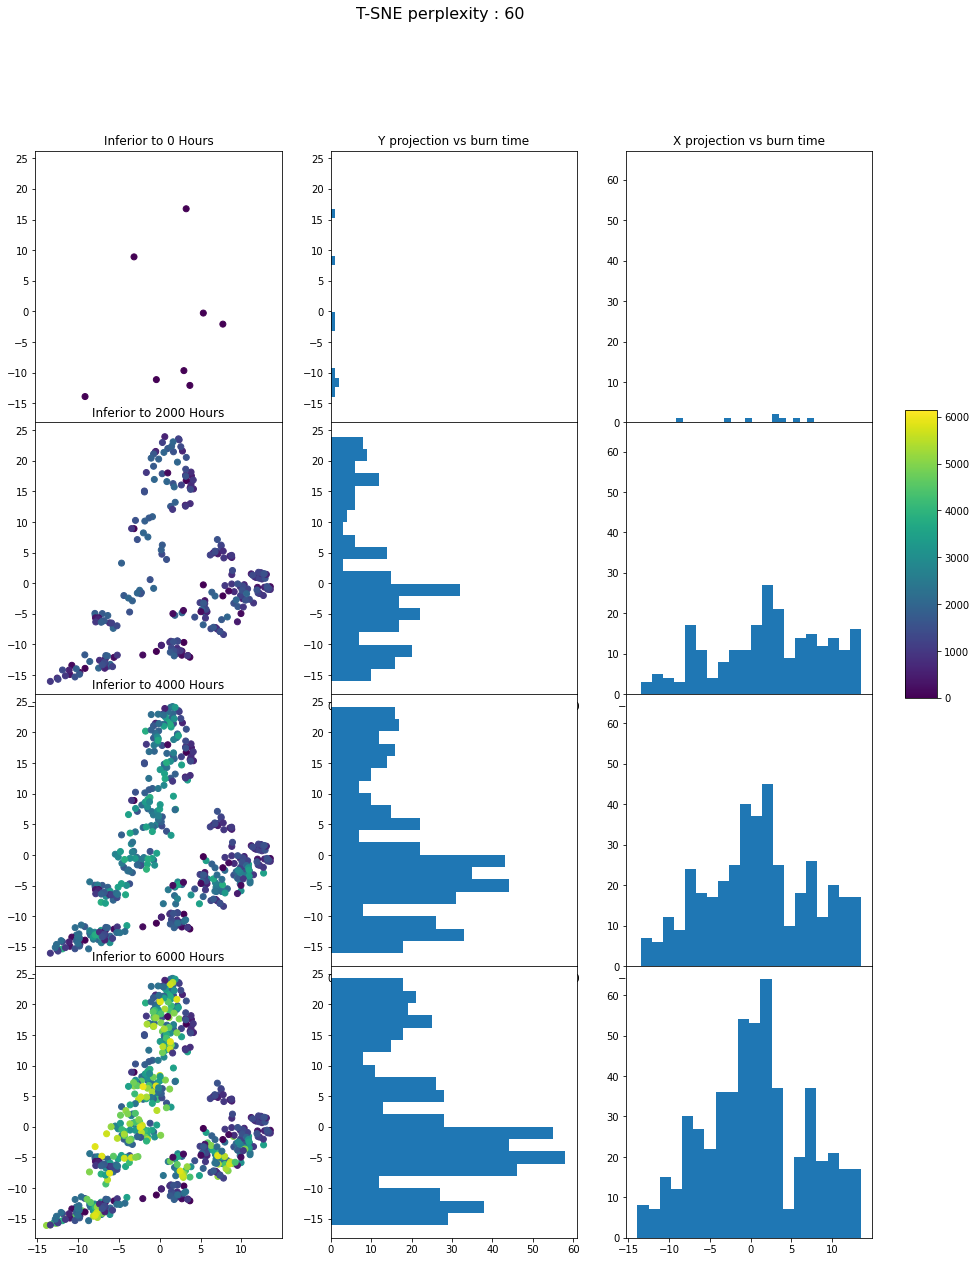

In [48]:
features = [('LinearHGcor','MaxNoiseAmp'),('LinearHGcor','MaxNoisePed'),('LinearHGcor','SlopeAmp'),('LinearHGcor','SlopeInteg'),
            ('LinearHGunc','MaxNoiseAmp'),('LinearHGunc','MaxNoisePed'),('LinearHGunc','SlopeAmp'),('LinearHGunc','SlopeInteg'),
            ('LinearLCHGcor','MaxNoiseAmp'),('LinearLCHGcor','MaxNoisePed'),('LinearLCHGcor','SlopeAmp'),('LinearLCHGcor','SlopeInteg'),
            ('LinearLGcor','MaxNoiseAmp'),('LinearLGcor','MaxNoisePed'),('LinearLGcor','SlopeAmp'),('LinearLGcor','SlopeInteg'),
            ('LinearLGunc','MaxNoiseAmp'),('LinearLGunc','MaxNoisePed'),('LinearLGunc','SlopeAmp'),('LinearLGunc','SlopeInteg'),
            ('LinearSCLGunc','MaxNoiseAmp'),('LinearSCLGunc','MaxNoisePed'),('LinearSCLGunc','SlopeAmp'),('LinearSCLGunc','SlopeInteg')]
# Extract the relevant features and convert them to a NumPy array
features = Fast2[features].values
# Define the burning time values as a NumPy array
burning_times = FENICS2[('Board','burnTime')].values
ids = FENICS2[('Board','id')].values

perplexities = [5,10,15,20,25,30,35,40,45,50,55,60]
for perplexity in perplexities :
    FATL.FenTSNE(features, burning_times,perplexity=perplexity,random_state=42,n_iter=20000,thresholds=[0,2000,4000,6000],superior=False)
  


<Figure size 1080x1080 with 0 Axes>

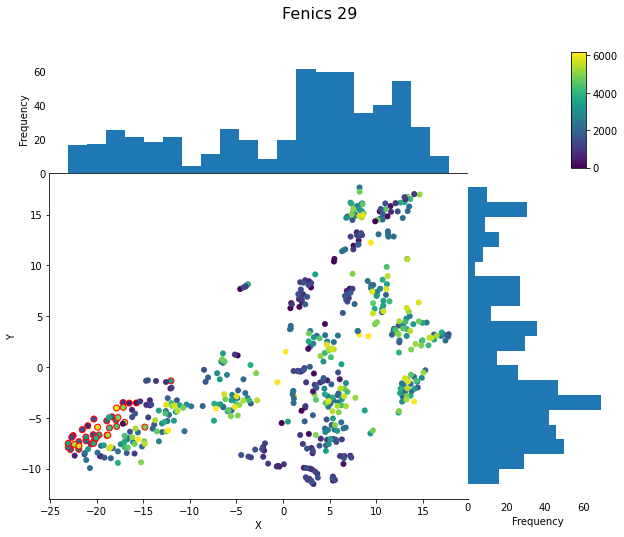

<Figure size 1080x1080 with 0 Axes>

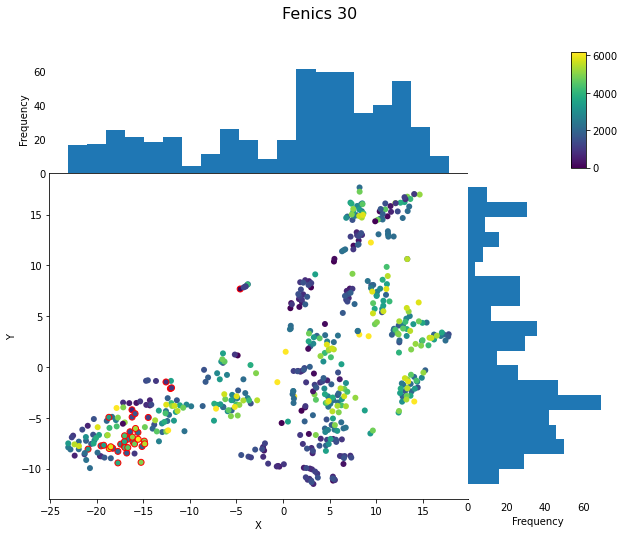

<Figure size 1080x1080 with 0 Axes>

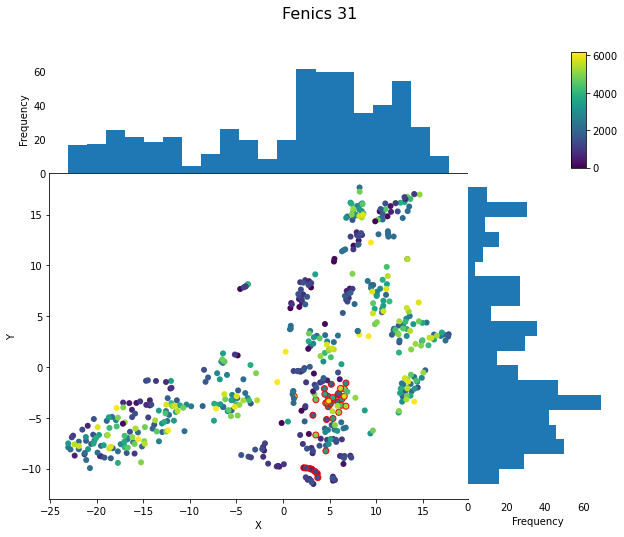

<Figure size 1080x1080 with 0 Axes>

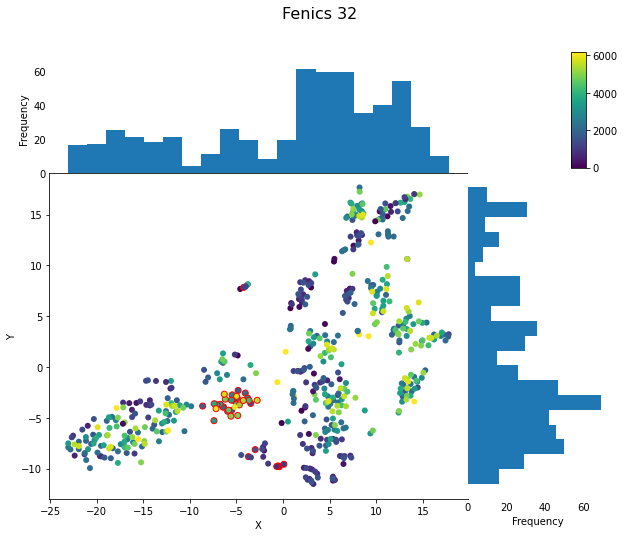

<Figure size 1080x1080 with 0 Axes>

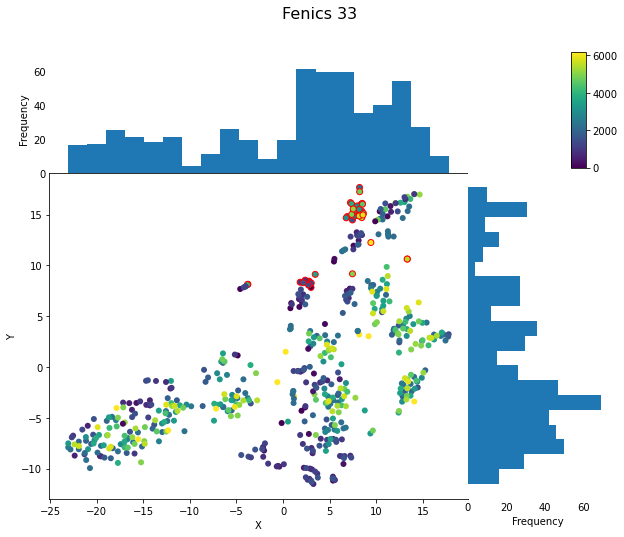

<Figure size 1080x1080 with 0 Axes>

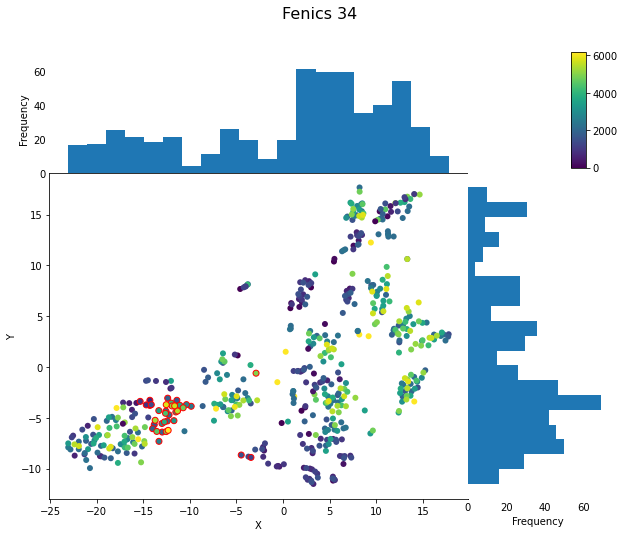

<Figure size 1080x1080 with 0 Axes>

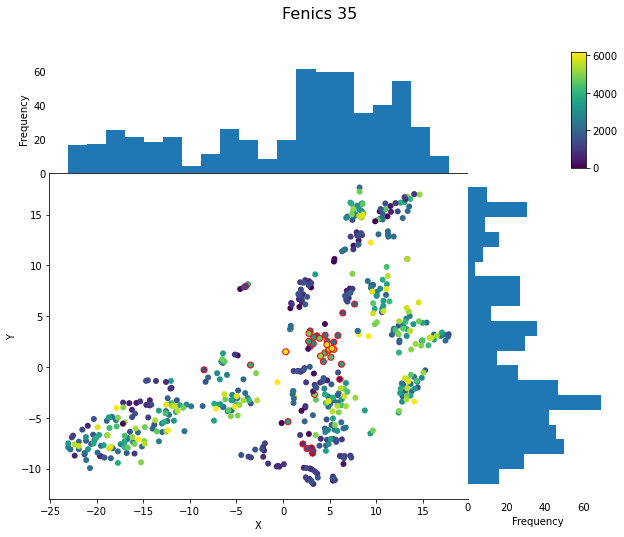

<Figure size 1080x1080 with 0 Axes>

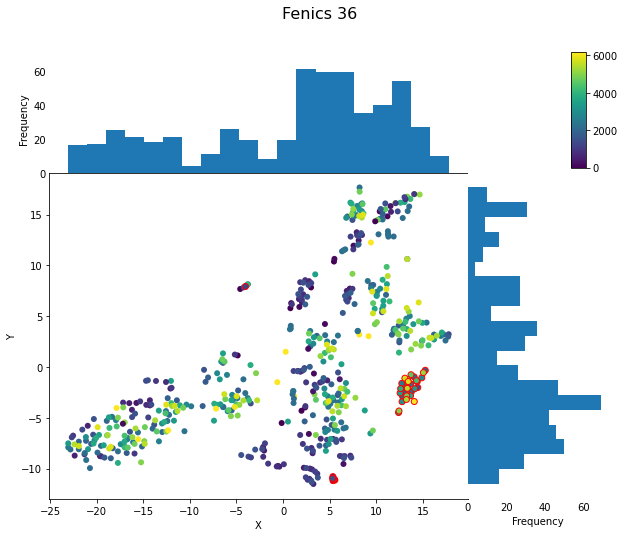

<Figure size 1080x1080 with 0 Axes>

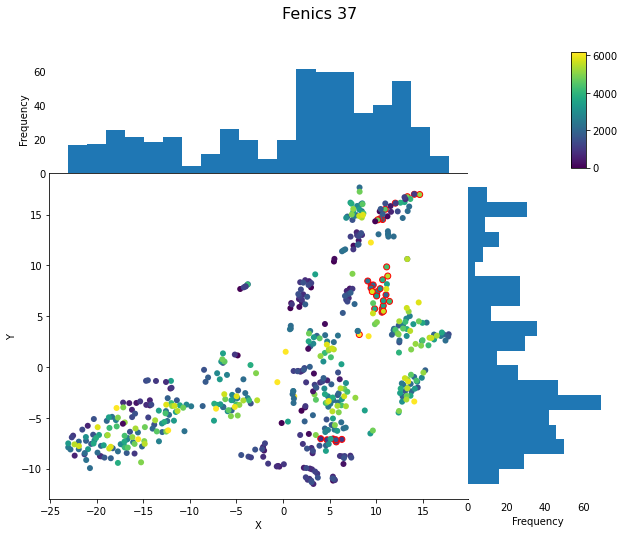

<Figure size 1080x1080 with 0 Axes>

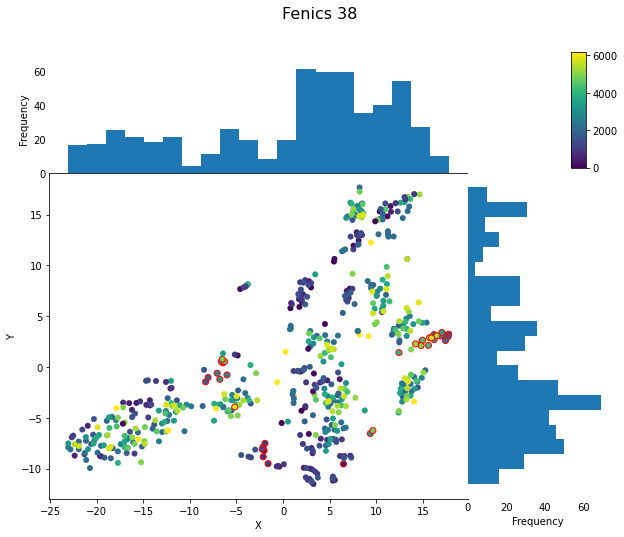

<Figure size 1080x1080 with 0 Axes>

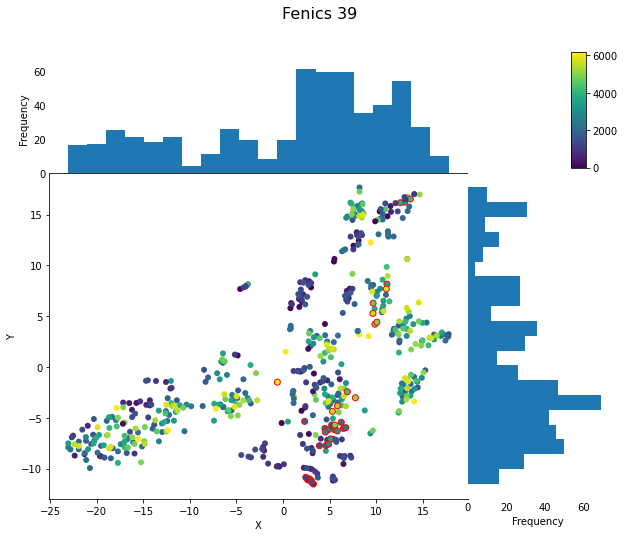

<Figure size 1080x1080 with 0 Axes>

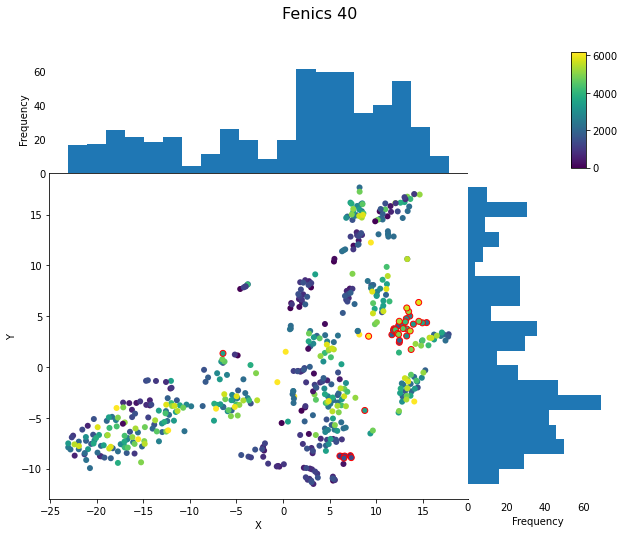

<Figure size 1080x1080 with 0 Axes>

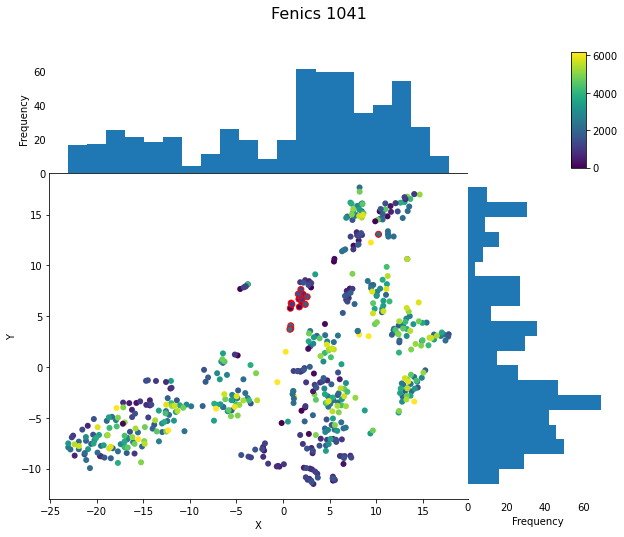

<Figure size 1080x1080 with 0 Axes>

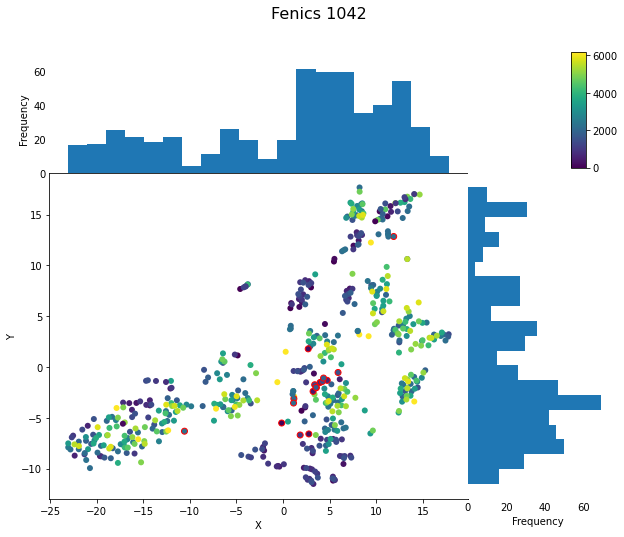

<Figure size 1080x1080 with 0 Axes>

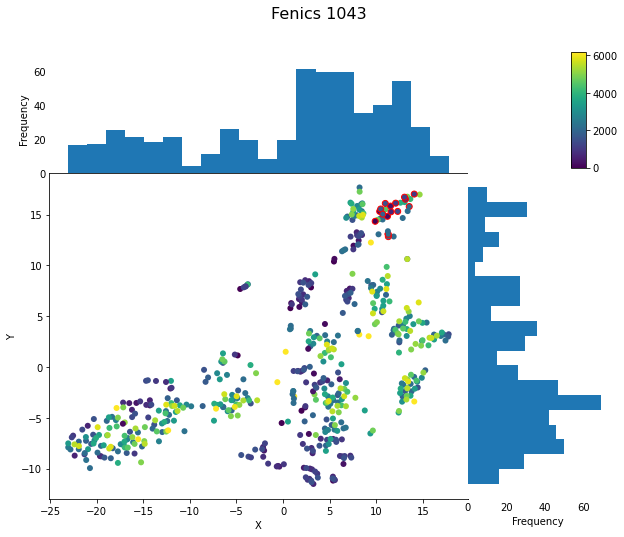

<Figure size 1080x1080 with 0 Axes>

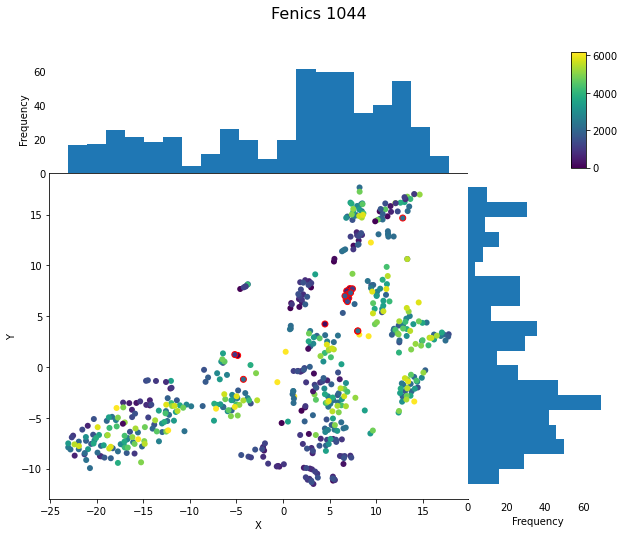

<Figure size 1080x1080 with 0 Axes>

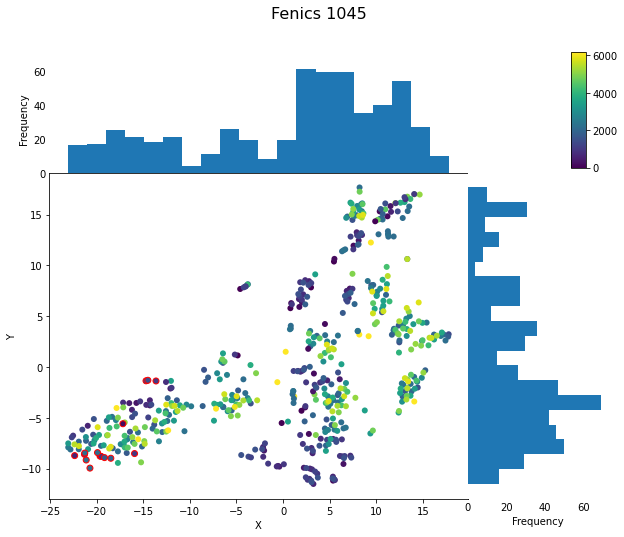

<Figure size 1080x1080 with 0 Axes>

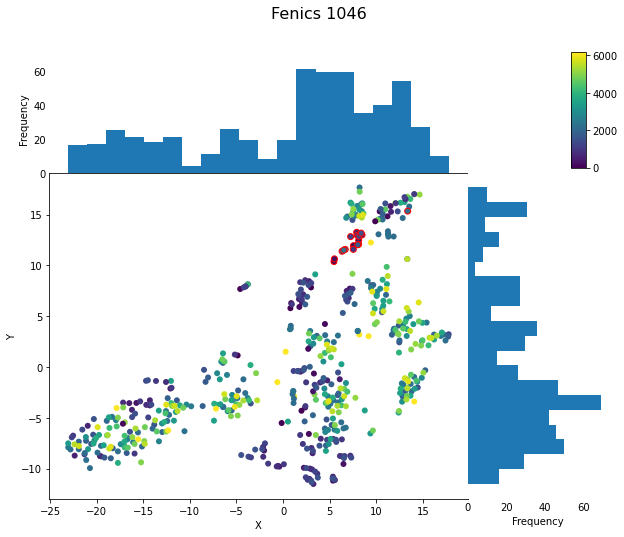

<Figure size 1080x1080 with 0 Axes>

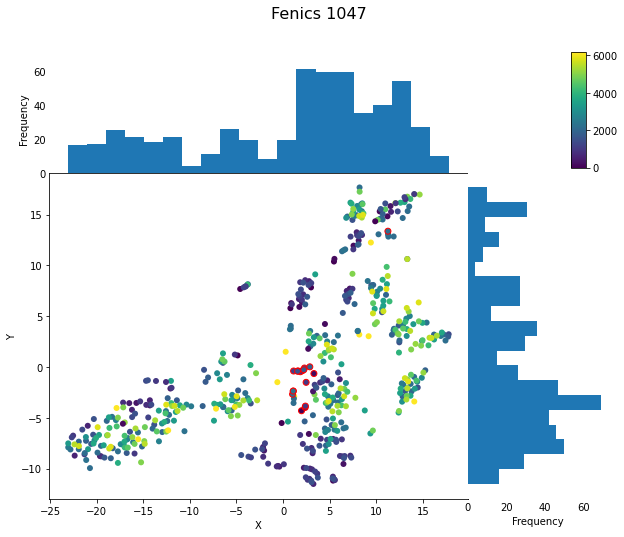

In [24]:
features = [('LinearHGcor','MaxNoiseAmp'),('LinearHGcor','MaxNoisePed'),('LinearHGcor','SlopeAmp'),('LinearHGcor','SlopeInteg'),
            ('LinearHGunc','MaxNoiseAmp'),('LinearHGunc','MaxNoisePed'),('LinearHGunc','SlopeAmp'),('LinearHGunc','SlopeInteg'),
            ('LinearLCHGcor','MaxNoiseAmp'),('LinearLCHGcor','MaxNoisePed'),('LinearLCHGcor','SlopeAmp'),('LinearLCHGcor','SlopeInteg'),
            ('LinearLGcor','MaxNoiseAmp'),('LinearLGcor','MaxNoisePed'),('LinearLGcor','SlopeAmp'),('LinearLGcor','SlopeInteg'),
            ('LinearLGunc','MaxNoiseAmp'),('LinearLGunc','MaxNoisePed'),('LinearLGunc','SlopeAmp'),('LinearLGunc','SlopeInteg'),
            ('LinearSCLGunc','MaxNoiseAmp'),('LinearSCLGunc','MaxNoisePed'),('LinearSCLGunc','SlopeAmp'),('LinearSCLGunc','SlopeInteg')]
# Extract the relevant features and convert them to a NumPy array
features = Fast2[features].values
# Define the burning time values as a NumPy array
burning_times = FENICS2[('Board','burnTime')].values
ids = FENICS2[('Board','id')].values

ids = FENICS2[('Board','id')].values
for id_filter in filter_id :
    edge_colors = []
    for id in ids:
        if id == id_filter:
            edge_colors.append('red')
        else :
            edge_colors.append('none')
    FATL.FenTSNE(Fast2, burning_times,perplexity=60,edge_colors=edge_colors,random_state=80,n_iter=20000,superior=False,title=f'Fenics {id_filter}')

<Figure size 1080x1080 with 0 Axes>

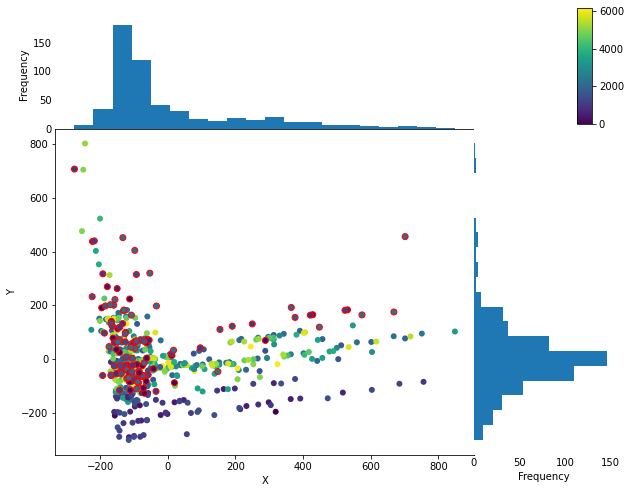

In [98]:
FATL.FenPCA(features, burning_times, ids,random_state=20)   

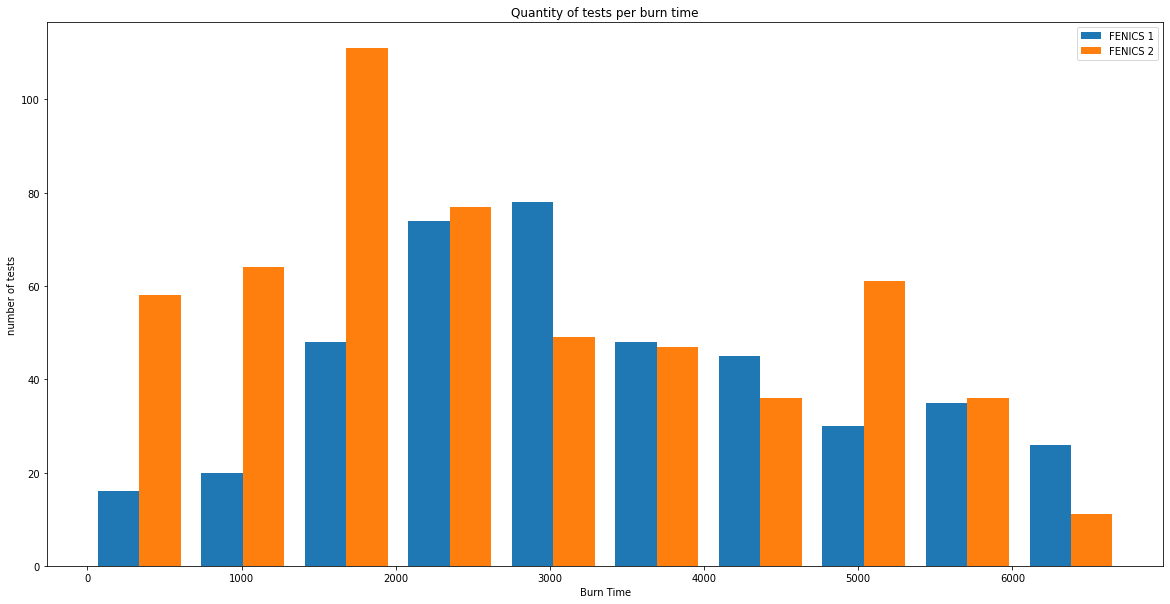

In [28]:
plt.figure(figsize = (20,10))
plt.hist([FENICS.Board.burnTime, FENICS2.Board.burnTime], bins=10, label=['FENICS 1', 'FENICS 2'])
plt.legend()
plt.xlabel('Burn Time')
plt.ylabel('number of tests')
plt.title('Quantity of tests per burn time')
plt.show()

In [43]:
FATL.FenCorr(FENICS2,Fast2,('LinearLGcor','SlopeAmp'),('LinearSCLGunc','SlopeAmp'),
                                            [29,30,31,32,33,34,35,36,37,38,39,40,1041,1042,1043,1044,1045,1046,1047], LR=False, sigma=2,burns = True,path =f'/users/divers/atlas/sisaid/home2/presentation/fen2')
FATL.FenCorr(FENICS,Fast,('LinearLGcor','SlopeAmp'),('LinearSCLGunc','SlopeAmp'),
                                            [15,14,13,12,10,9,8,7,6,5,4], LR=False, sigma=2,burns = True,path =f'/users/divers/atlas/sisaid/home2/presentation/fen1')

In [42]:
Fast.columns

MultiIndex([(  'LinearHGcor',          'SlopeAmp'),
            (  'LinearHGcor',        'SlopeInteg'),
            (  'LinearHGcor',        'LowGoodLin'),
            (  'LinearHGcor',   'LowGoodNoisePed'),
            (  'LinearHGcor', 'LowGoodNoiseInteg'),
            (  'LinearHGcor',       'MaxNoisePed'),
            (  'LinearHGcor',       'MaxNoiseAmp'),
            (  'LinearHGcor',      'ShapeQuality'),
            (  'LinearHGunc',          'SlopeAmp'),
            (  'LinearHGunc',        'SlopeInteg'),
            (  'LinearHGunc',        'LowGoodLin'),
            (  'LinearHGunc',   'LowGoodNoisePed'),
            (  'LinearHGunc', 'LowGoodNoiseInteg'),
            (  'LinearHGunc',       'MaxNoisePed'),
            (  'LinearHGunc',       'MaxNoiseAmp'),
            (  'LinearHGunc',      'ShapeQuality'),
            ('LinearLCHGcor',          'SlopeAmp'),
            ('LinearLCHGcor',        'SlopeInteg'),
            ('LinearLCHGcor',        'LowGoodLin'),
            